# Importing Packages

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
sns.set() # Setting seaborn as default style even if use only matplotlib
sns.set_palette("Set2") # Globally seting charts pallete
import statsmodels.api as sm
import statsmodels as sms
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2
from scipy.stats import shapiro
from statsmodels.compat import lzip
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
pd.set_option('display.max_columns', None) # show all columns from a pandas dataframe

The Color Palette for Data Visualization from Seaborn is set to be "Set2" as shown below:

In [4]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

### IBOV TICKERS

In [5]:
# source: https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm
ibov_tickers_list = ['ABEV3.SA',
'ALPA4.SA',
'AMER3.SA',
'ARZZ3.SA',
'ASAI3.SA',
'AZUL4.SA',
'B3SA3.SA',
'BBAS3.SA',
'BBDC3.SA',
'BBDC4.SA',
'BBSE3.SA',
'BEEF3.SA',
'BPAC11.SA',
'BPAN4.SA',
'BRAP4.SA',
'BRFS3.SA',
'BRKM5.SA',
'BRML3.SA',
'CASH3.SA',
'CCRO3.SA',
'CIEL3.SA',
'CMIG4.SA',
'CMIN3.SA',
'COGN3.SA',
'CPFE3.SA',
'CPLE6.SA',
'CRFB3.SA',
'CSAN3.SA',
'CSNA3.SA',
'CVCB3.SA',
'CYRE3.SA',
'DXCO3.SA',
'ECOR3.SA',
'EGIE3.SA',
'ELET3.SA',
'ELET6.SA',
'EMBR3.SA',
'ENBR3.SA',
'ENEV3.SA',
'ENGI11.SA',
'EQTL3.SA',
'EZTC3.SA',
'FLRY3.SA',
'GGBR4.SA',
'GOAU4.SA',
'GOLL4.SA',
'HAPV3.SA',
'HYPE3.SA',
'IGTI11.SA',
'ITSA4.SA',
'ITUB4.SA',
'JBSS3.SA',
'KLBN11.SA',
'LREN3.SA',
'LWSA3.SA',
'MGLU3.SA',
'MRFG3.SA',
'MRVE3.SA',
'MULT3.SA',
'NTCO3.SA',
'PCAR3.SA',
'PETR3.SA',
'PETR4.SA',
'PETZ3.SA',
'PRIO3.SA',
'QUAL3.SA',
'RADL3.SA',
'RAIL3.SA',
'RAIZ4.SA',
'RDOR3.SA',
'RENT3.SA',
'RRRP3.SA',
'SANB11.SA',
'SBSP3.SA',
'SLCE3.SA',
'SMTO3.SA',
'SOMA3.SA',
'SUZB3.SA',
'TAEE11.SA',
'TIMS3.SA',
'TOTS3.SA',
'UGPA3.SA',
'USIM5.SA',
'VALE3.SA',
'VBBR3.SA',
'VIIA3.SA',
'VIVT3.SA',
'WEGE3.SA',
'YDUQ3.SA']

# Reading Data from .csv

In [6]:
df_model_raw = pd.read_excel('/content/drive/MyDrive/Mestrado - UFG/Dissertação/Model/ivan_mello_big_data_final_parsed_data_for_tests.xlsx',
                             sheet_name="h1_to_h4")

In [7]:
df_model_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   identifier_ric                                    234 non-null    object 
 1   company_name                                      234 non-null    object 
 2   country_of_exchange                               234 non-null    object 
 3   trbc_economic_sector_name                         234 non-null    object 
 4   organization_website                              234 non-null    object 
 5   organization_founded_year                         234 non-null    int64  
 6   organization_email_domain                         234 non-null    object 
 7   organization_founded_month                        234 non-null    int64  
 8   organization_founded_day                          234 non-null    int64  
 9   organization_status_c

In [8]:
set(df_model_raw['mcap']!=0)

{True}

In [9]:
set(df_model_raw['total_assets']!=0)

{True}

In [10]:
set(df_model_raw['pl_equity']!=0)

{True}

# Creating some boolean columns for exploratory analysis

In [11]:
# Identifying companies from ibov or not
df_model_raw['is_ibov_bool'] = np.where(df_model_raw['identifier_ric'].isin(ibov_tickers_list),
                                   # is ibov company
                                   1,
                                   # not a ibov company
                                   0)

df_model_raw['is_ibov_str'] = np.where(df_model_raw['identifier_ric'].isin(ibov_tickers_list),
                                   # is ibov company
                                   "YES, IT'S AN IBOV COMPANY",
                                   # not a ibov company
                                   "NO, IT'S NOT AN IBOV COMPANY")

In [12]:
# identifying companies with apps
df_model_raw['has_app_bool'] = np.where(df_model_raw['play_store_app_id_qty']==1,
                                   # has an app in Play Store
                                   1,
                                   # does not have an app in Play Store
                                   0)

df_model_raw['has_app_str'] = np.where(df_model_raw['play_store_app_id_qty']==1,
                                   # has an app in Play Store
                                   "YES, COMPANY HAS AN APP IN PLAY STORE",
                                   # does not have an app in Play Store
                                   "NO, COMPANY DOES NOT HAVE AN APP IN PLAY STORE")

# Pre-processing: creating new transformed columns like np.log from downloads, calculating Tobin's Q, etc...

In [13]:
# calculating turnover log
df_model_raw['natural_log_turnover'] = np.log(df_model_raw['turnover'])

In [14]:
# calculating total_debts to total_assets ratio and it's natural log
df_model_raw['total_debts_to_total_assets_ratio'] = (df_model_raw['total_debts']/df_model_raw['total_assets'])
df_model_raw['total_debts_to_total_assets_ratio_natural_log'] = np.log(df_model_raw['total_debts_to_total_assets_ratio'])

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [15]:
# calculating firm age
df_model_raw['firm_age'] = df_model_raw['year'].astype(float) - df_model_raw['organization_founded_year']

In [16]:
# calculating Tobin's Q and then it's natural log
df_model_raw['tobin_q'] = ((df_model_raw['total_assets'] + df_model_raw['mcap'] - df_model_raw['pl_equity'])/df_model_raw['total_assets'])
df_model_raw['tobin_q_natural_log'] = np.log(df_model_raw['tobin_q'])

In [17]:
# creating a column that adjusts total employees data
## 1) refinitiv 'employees_as_csr_reported'
## 2) refinitiv 'employees_fulltime'
## 3) linkedin total employees
df_model_raw['total_employees_adjusted'] = np.where(df_model_raw['employees_as_csr_reported'].isna()==True,
                                                    df_model_raw['employees_fulltime'],
                                                    df_model_raw['employees_as_csr_reported'])
df_model_raw['total_employees_adjusted'] = np.where(df_model_raw['total_employees_adjusted'].isna()==True,
                                                    df_model_raw['total_employees_linkedin'],
                                                    df_model_raw['total_employees_adjusted'])

# now big_data employees / total_employees_adjusted (veracity)
df_model_raw['data_perc_employees'] = df_model_raw['qty_of_data_related_employees'].fillna(0) / df_model_raw['total_employees_adjusted'].fillna(0)
df_model_raw['data_perc_employees'] = df_model_raw['data_perc_employees'].fillna(0)

#calculating natural
df_model_raw['data_perc_employees_natural_log'] =    np.where( df_model_raw['data_perc_employees']!=0,
                                                                    np.log(df_model_raw['data_perc_employees']),
                                                                    0
                                                                    )
df_model_raw['data_perc_employees_natural_log'] = df_model_raw['data_perc_employees_natural_log'].fillna(0)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [18]:
# calculating Natural Log of Downloads (volume) - when company does not inform downloads, keep 0 and do not calculate np.log()
df_model_raw['play_store_sum_downloads_natural_log'] =    np.where( df_model_raw['play_store_sum_downloads']!=0,
                                                                    np.log(df_model_raw['play_store_sum_downloads']),
                                                                    0
                                                                    )
df_model_raw['play_store_sum_downloads_natural_log'] = df_model_raw['play_store_sum_downloads_natural_log'].fillna(0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [19]:
# calculating Natural Log of Types of Data Collected (variety) - when company does not inform variety, keep 0 and do not calculate np.log()
df_model_raw['play_store_sum_different_types_of_data_collected_natural_log'] =    np.where( df_model_raw['play_store_sum_different_types_of_data_collected']!=0,
                                                                    np.log(df_model_raw['play_store_sum_different_types_of_data_collected']),
                                                                    0
                                                                    )
df_model_raw['play_store_sum_different_types_of_data_collected_natural_log'] = df_model_raw['play_store_sum_different_types_of_data_collected_natural_log'].fillna(0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [20]:
# calculating Natural Log of update freshness in days (velocity) - when company does not inform velocity, keep 0 and do not calculate np.log()
df_model_raw['play_store_update_freshness_in_days_natural_log'] =    np.where( df_model_raw['play_store_update_freshness_in_days']!=0,
                                                                    np.log(df_model_raw['play_store_update_freshness_in_days']),
                                                                    0
                                                                    )
df_model_raw['play_store_update_freshness_in_days_natural_log'] = df_model_raw['play_store_update_freshness_in_days_natural_log'].fillna(0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
df_model_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 49 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   identifier_ric                                                234 non-null    object 
 1   company_name                                                  234 non-null    object 
 2   country_of_exchange                                           234 non-null    object 
 3   trbc_economic_sector_name                                     234 non-null    object 
 4   organization_website                                          234 non-null    object 
 5   organization_founded_year                                     234 non-null    int64  
 6   organization_email_domain                                     234 non-null    object 
 7   organization_founded_month                                    234 non-n

Now I'll filter my dataframe to keep only rows where my dependent variable (DV) - tobin_q_natural_log - is not 0

In [22]:
df_model_raw_filtered_has_tobin_q = df_model_raw.query("tobin_q!=0")

In [23]:
# Renaming columns
df_tobinq_vs_bigdata = df_model_raw_filtered_has_tobin_q[[
    # CATEGORICAL VARIABLES
    'identifier_ric',
    'company_name',
    'is_ibov_bool',
    'is_ibov_str',
    'has_app_bool',
    'has_app_str',
    'trbc_economic_sector_name',

    # DV
    'tobin_q',
    'tobin_q_natural_log',

    # CONTROL VARIABLES TURNOVER_NL + BETA + D_TO_A_RATIO + FIRM_AGE
    'turnover',
    'natural_log_turnover',
    'beta',
    'total_debts_to_total_assets_ratio',
    'total_debts_to_total_assets_ratio_natural_log',
    'firm_age',



    # Big Data IV's
    'data_perc_employees',
    'data_perc_employees_natural_log',

    'play_store_sum_downloads',
    'play_store_sum_downloads_natural_log',

    'play_store_sum_different_types_of_data_collected',
    'play_store_sum_different_types_of_data_collected_natural_log',

    'play_store_update_freshness_in_days',
    'play_store_update_freshness_in_days_natural_log'


]].copy()
df_tobinq_vs_bigdata.columns = [
                                #Renaming CATEGORICAL VARIABLES
                                'TICKER','NAME','IS_IBOV_BOOL', 'IS_IBOV_STR','HAS_APP_BOOL','HAS_APP_STR','TRBC_ECONOMIC_SECTOR',

                                #Renaming DV
                                'TOBINQ','TOBINQ_NL',

                                #Renaming CONTROL VARIABLES
                                'TURNOVER',
                                'TURNOVER_NL',
                                'BETA',
                                'D_TO_A_RATIO',
                                'D_TO_A_RATIO_NL',
                                'FIRM_AGE',

                                #Renaming BIG DATA IV's
                                'VERACITY',
                                'VERACITY_NL',

                                'VOLUME',
                                'VOLUME_NL',

                                'VARIETY',
                                'VARIETY_NL',

                                'VELOCITY',
                                'VELOCITY_NL'
                                ]

# Further exploratory analysis on Dependent Variable (DV) which is Tobin's Q Natural Log vs. Clusters/Categorical Variables

Now let's build one single figure with all plots to transfer to the .word version

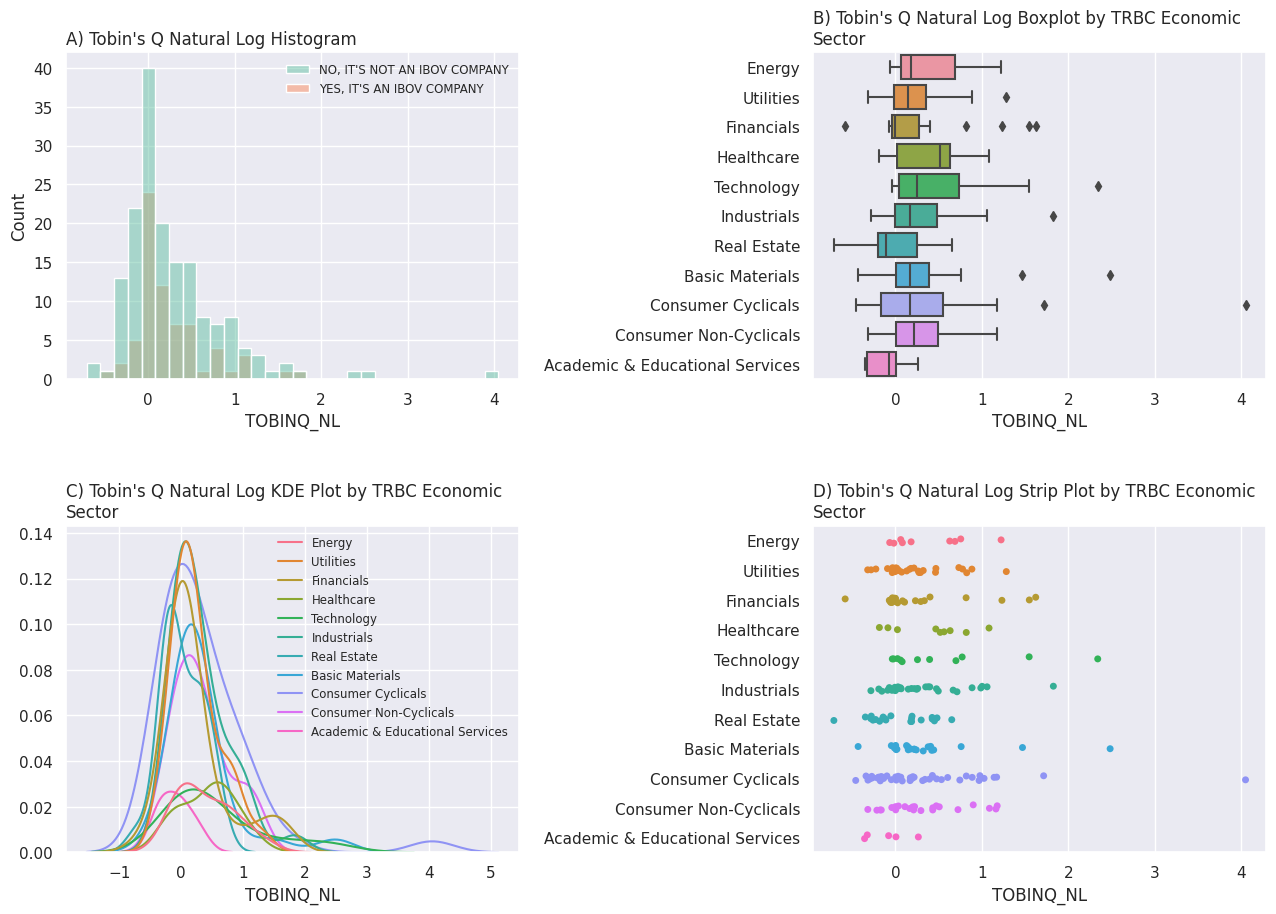

In [24]:
# the complete figure will have a 15 to 10 size and 2 rows and 2 columns of charts
fig, axes = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(wspace=0.65,
                    hspace=0.45,
                    left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9)


# first chart - Histogram
a = sns.histplot(ax = axes[0,0],data=df_tobinq_vs_bigdata, x="TOBINQ_NL", hue="IS_IBOV_STR")
sns.move_legend(a, "upper right", frameon=False, fontsize="8.5", title="")
axes[0,0].set_title("A) Tobin's Q Natural Log Histogram", loc='left')

# second chart - Boxplot
sns.boxplot(ax = axes[0,1], data=df_tobinq_vs_bigdata, x='TOBINQ_NL', y="TRBC_ECONOMIC_SECTOR")
axes[0,1].set_title("B) Tobin's Q Natural Log Boxplot by TRBC Economic \nSector", loc='left')
axes[0,1].set(ylabel=None)

# third chart - KDE Plot
g = sns.kdeplot(ax = axes[1,0], data=df_tobinq_vs_bigdata, x='TOBINQ_NL', hue="TRBC_ECONOMIC_SECTOR")
sns.move_legend(g, "upper right", frameon=False, fontsize="8.5", title="")
axes[1,0].set_title("C) Tobin's Q Natural Log KDE Plot by TRBC Economic \nSector", loc='left')
axes[1,0].set(ylabel=None)


# fourth chart - Strip Plot
sns.stripplot(ax = axes[1,1], data=df_tobinq_vs_bigdata, x='TOBINQ_NL', y="TRBC_ECONOMIC_SECTOR", hue="TRBC_ECONOMIC_SECTOR", legend=False)
axes[1,1].set_title("D) Tobin's Q Natural Log Strip Plot by TRBC Economic \nSector", loc='left')
axes[1,1].set(ylabel=None)


plt.savefig('Tobin Q vs. Categorical and Clusters Variables.png'
            #, transparent=True
            )

In [25]:
df_tobinq_vs_bigdata['IS_IBOV_STR'].unique()

array(["NO, IT'S NOT AN IBOV COMPANY", "YES, IT'S AN IBOV COMPANY"],
      dtype=object)

In [26]:
# creating a map dict to generate charts in PT BR too
IS_IBOV_STR_PTBR_dict = {
    "NO, IT'S NOT AN IBOV COMPANY":"não integra IBOV",
    "YES, IT'S AN IBOV COMPANY":"integra IBOV"
}

In [27]:
df_tobinq_vs_bigdata['IS_IBOV_STR_PTBR'] = df_tobinq_vs_bigdata['IS_IBOV_STR'].map(IS_IBOV_STR_PTBR_dict)

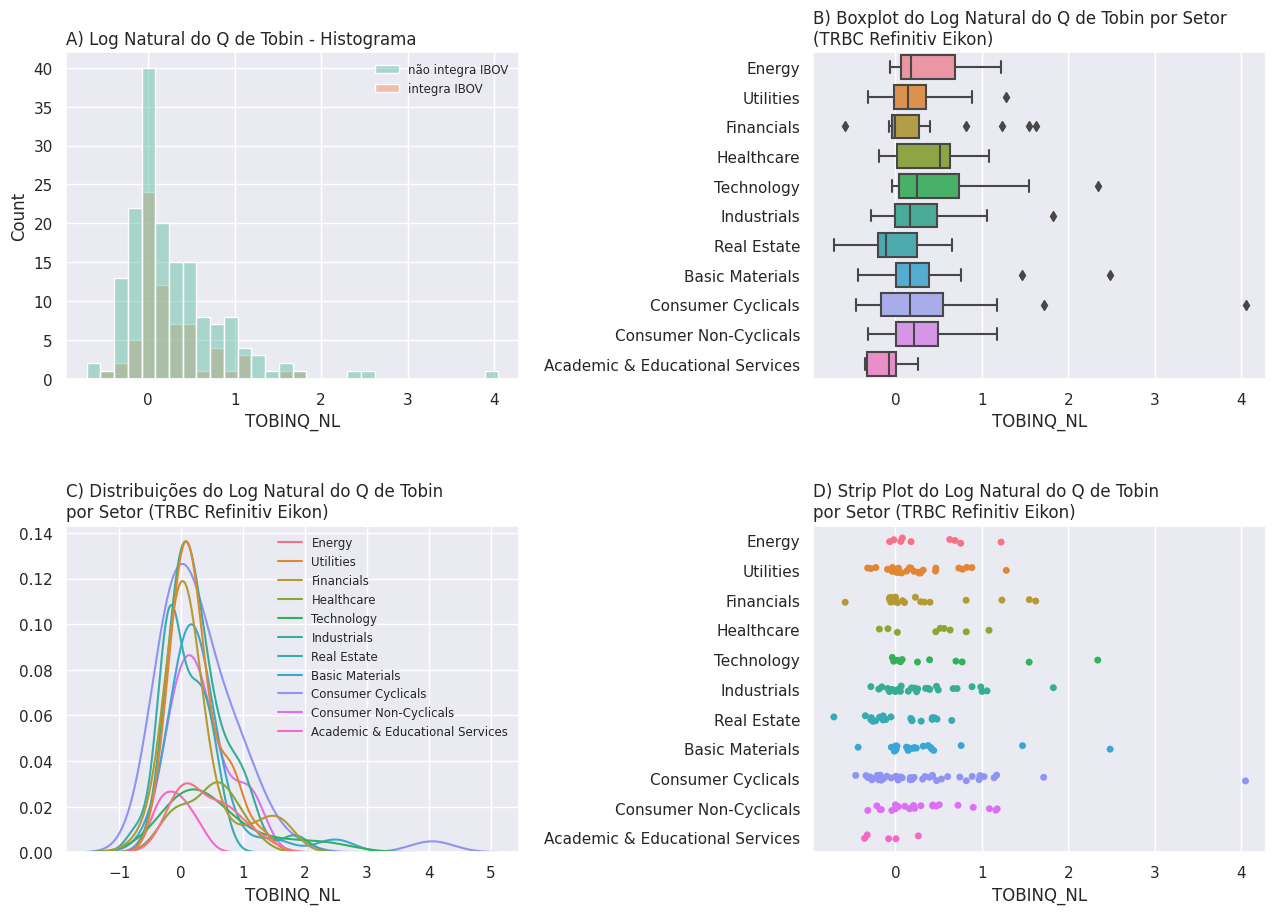

In [28]:
# the complete figure will have a 15 to 10 size and 2 rows and 2 columns of charts
fig, axes = plt.subplots(2,2, figsize=(15,10))
plt.subplots_adjust(wspace=0.65,
                    hspace=0.45,
                    left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9)


# first chart - Histogram
a = sns.histplot(ax = axes[0,0],data=df_tobinq_vs_bigdata, x="TOBINQ_NL", hue="IS_IBOV_STR_PTBR")
sns.move_legend(a, "upper right", frameon=False, fontsize="8.5", title="")
axes[0,0].set_title("A) Log Natural do Q de Tobin - Histograma", loc='left')

# second chart - Boxplot
sns.boxplot(ax = axes[0,1], data=df_tobinq_vs_bigdata, x='TOBINQ_NL', y="TRBC_ECONOMIC_SECTOR")
axes[0,1].set_title("B) Boxplot do Log Natural do Q de Tobin por Setor\n(TRBC Refinitiv Eikon)", loc='left')
axes[0,1].set(ylabel=None)

# third chart - KDE Plot
g = sns.kdeplot(ax = axes[1,0], data=df_tobinq_vs_bigdata, x='TOBINQ_NL', hue="TRBC_ECONOMIC_SECTOR")
sns.move_legend(g, "upper right", frameon=False, fontsize="8.5", title="")
axes[1,0].set_title("C) Distribuições do Log Natural do Q de Tobin \npor Setor (TRBC Refinitiv Eikon)", loc='left')
axes[1,0].set(ylabel=None)


# fourth chart - Strip Plot
sns.stripplot(ax = axes[1,1], data=df_tobinq_vs_bigdata, x='TOBINQ_NL', y="TRBC_ECONOMIC_SECTOR", hue="TRBC_ECONOMIC_SECTOR", legend=False)
axes[1,1].set_title("D) Strip Plot do Log Natural do Q de Tobin \npor Setor (TRBC Refinitiv Eikon) ", loc='left')
axes[1,1].set(ylabel=None)


plt.savefig('Tobin Q vs. Categorical and Clusters Variables - PTBR.png'
            #, transparent=True
            )

With the combined plot of 4 charts we can conclude that the DV Tobin's Q changes a lot by The Refinitiv Business Classification (TRBC) Economic Sector, indicating that a Multi-level model that can capture cluster effects might be a good statistical model to compare with simple OLS to test H1 to H4 hypothesis.

# Further exploratory analysis on Dependent Variable (DV) which is Tobin's Q Natural Log vs. Independent Variables which are Big Data proxies

In [29]:
df_tobinq_vs_bigdata.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'IS_IBOV_STR', 'HAS_APP_BOOL',
       'HAS_APP_STR', 'TRBC_ECONOMIC_SECTOR', 'TOBINQ', 'TOBINQ_NL',
       'TURNOVER', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO', 'D_TO_A_RATIO_NL',
       'FIRM_AGE', 'VERACITY', 'VERACITY_NL', 'VOLUME', 'VOLUME_NL', 'VARIETY',
       'VARIETY_NL', 'VELOCITY', 'VELOCITY_NL', 'IS_IBOV_STR_PTBR'],
      dtype='object')

In [30]:
df_tobinq_vs_bigdata_only = df_tobinq_vs_bigdata[[
                                                       'TICKER', 'NAME', 'IS_IBOV_BOOL', 'IS_IBOV_STR', 'HAS_APP_BOOL',
                                                        'HAS_APP_STR', 'TRBC_ECONOMIC_SECTOR', 'TOBINQ', 'TOBINQ_NL',
                                                        'VERACITY', 'VERACITY_NL', 'VOLUME', 'VOLUME_NL', 'VARIETY',
                                                        'VARIETY_NL', 'VELOCITY', 'VELOCITY_NL'
                                                  ]].copy()

In [31]:
df_tobinq_vs_bigdata_only.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TICKER                234 non-null    object 
 1   NAME                  234 non-null    object 
 2   IS_IBOV_BOOL          234 non-null    int64  
 3   IS_IBOV_STR           234 non-null    object 
 4   HAS_APP_BOOL          234 non-null    int64  
 5   HAS_APP_STR           234 non-null    object 
 6   TRBC_ECONOMIC_SECTOR  234 non-null    object 
 7   TOBINQ                234 non-null    float64
 8   TOBINQ_NL             234 non-null    float64
 9   VERACITY              234 non-null    float64
 10  VERACITY_NL           234 non-null    float64
 11  VOLUME                234 non-null    int64  
 12  VOLUME_NL             234 non-null    float64
 13  VARIETY               234 non-null    int64  
 14  VARIETY_NL            234 non-null    float64
 15  VELOCITY              2

Generating a single figure by plotting DV Tobin's Q against all Big Data proxies and Big Data proxies against themselves.

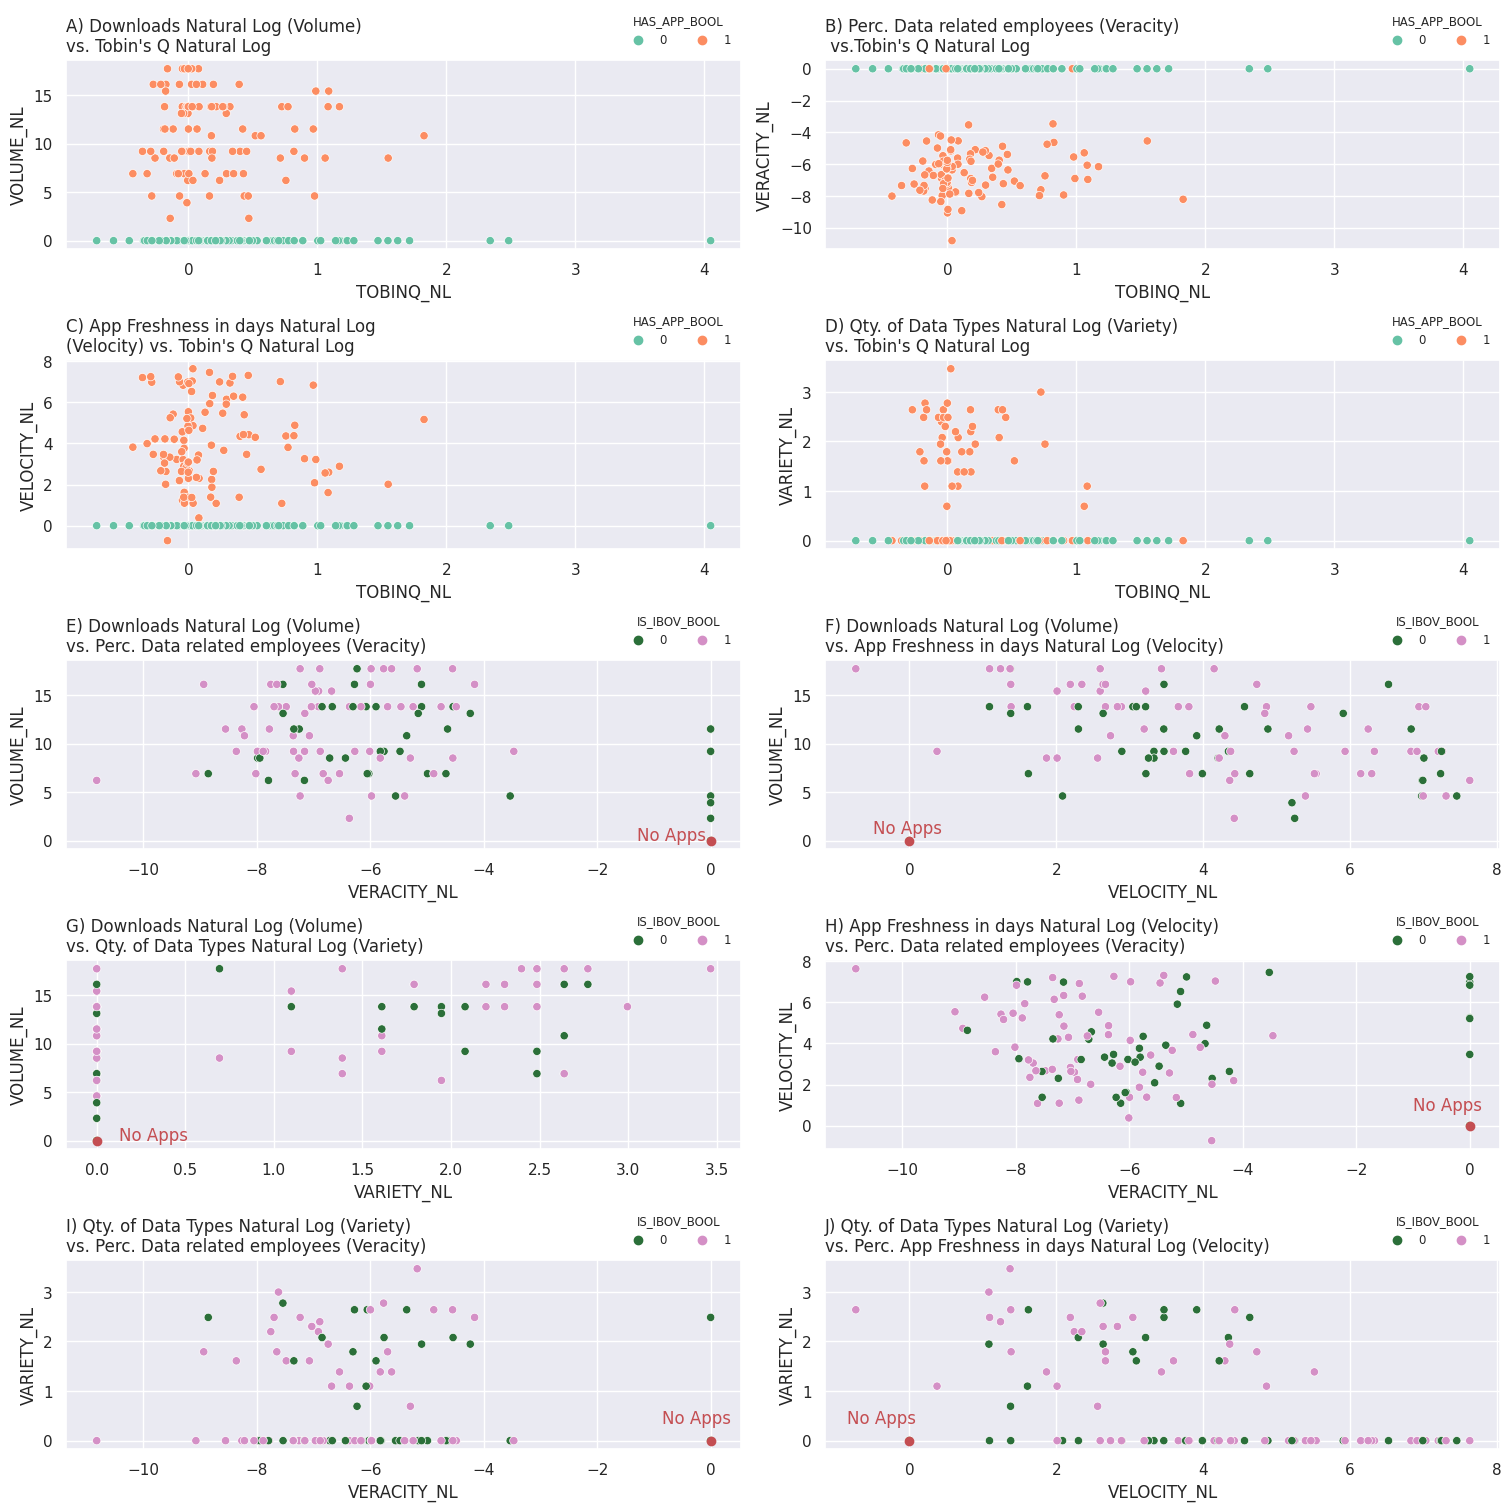

In [32]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(5,2, figsize=(15,15), constrained_layout=True)
'''lt.subplots_adjust(wspace=0.75,
                    hspace=0.85,
                    left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9)'''

# A) Big Data Volume vs. Tobin's Q Natural Log
a = sns.scatterplot(ax = axes[0,0], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VOLUME_NL", hue="HAS_APP_BOOL", palette="Set2")
sns.move_legend(a, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,0].set_title("A) Downloads Natural Log (Volume)\nvs. Tobin's Q Natural Log", loc='left',
                    #weight='bold'
                    )
axes[0,0].set(xlabel='TOBINQ_NL', ylabel='VOLUME_NL')



# B) Big Data Veracity vs. Tobin's Q Natural Log
b = sns.scatterplot(ax = axes[0,1], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VERACITY_NL", hue="HAS_APP_BOOL")
sns.move_legend(b, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,1].set_title("B) Perc. Data related employees (Veracity)\n vs.Tobin's Q Natural Log", loc='left')
axes[0,1].set(xlabel='TOBINQ_NL', ylabel='VERACITY_NL')


# C) Big Data Velocity vs. Tobin's Q Natural Log
c = sns.scatterplot(ax = axes[1,0], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VELOCITY_NL", hue="HAS_APP_BOOL")
sns.move_legend(c, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,0].set_title("C) App Freshness in days Natural Log\n(Velocity) vs. Tobin's Q Natural Log", loc='left')
axes[1,0].set(xlabel='TOBINQ_NL', ylabel='VELOCITY_NL')


# D) Big Data Variety vs. Tobin's Q Natural Log
d = sns.scatterplot(ax = axes[1,1], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VARIETY_NL", hue="HAS_APP_BOOL")
sns.move_legend(d, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,1].set_title("D) Qty. of Data Types Natural Log (Variety)\nvs. Tobin's Q Natural Log", loc='left')
axes[1,1].set(xlabel='TOBINQ_NL', ylabel='VARIETY_NL')


# E) Big Data Veracity vs. Big Data Volume
e = sns.scatterplot(ax = axes[2,0], data=df_tobinq_vs_bigdata_only, x='VERACITY_NL', y="VOLUME_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(e, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[2,0].set_title("E) Downloads Natural Log (Volume)\nvs. Perc. Data related employees (Veracity)", loc='left')
axes[2,0].set(xlabel='VERACITY_NL', ylabel='VOLUME_NL')
axes[2,0].annotate('No Apps', (-1.3,0), color='r' )
axes[2,0].scatter(x=0, y=0, color='r')


# F) Big Data Velocity vs. Big Data Volume
f = sns.scatterplot(ax = axes[2,1], data=df_tobinq_vs_bigdata_only, x='VELOCITY_NL', y="VOLUME_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(f, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[2,1].set_title("F) Downloads Natural Log (Volume)\nvs. App Freshness in days Natural Log (Velocity)", loc='left')
axes[2,1].set(xlabel='VELOCITY_NL', ylabel='VOLUME_NL')
axes[2,1].annotate('No Apps', (-0.5,0.75), color='r' )
axes[2,1].scatter(x=0, y=0, color='r')

# G) Big Data Variety vs. Big Data Volume
g = sns.scatterplot(ax = axes[3,0], data=df_tobinq_vs_bigdata_only, x='VARIETY_NL', y="VOLUME_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(g, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[3,0].set_title("G) Downloads Natural Log (Volume)\nvs. Qty. of Data Types Natural Log (Variety)", loc='left')
axes[3,0].set(xlabel='VARIETY_NL', ylabel='VOLUME_NL')
axes[3,0].annotate('No Apps', (0.125,0), color='r' )
axes[3,0].scatter(x=0, y=0, color='r')

# H) Big Data Veracity vs. Big Data Velocity
h = sns.scatterplot(ax = axes[3,1], data=df_tobinq_vs_bigdata_only, x='VERACITY_NL', y="VELOCITY_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(h, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[3,1].set_title("H) App Freshness in days Natural Log (Velocity)\nvs. Perc. Data related employees (Veracity)", loc='left')
axes[3,1].set(xlabel='VERACITY_NL', ylabel='VELOCITY_NL')
axes[3,1].annotate('No Apps', (-1,0.75), color='r' )
axes[3,1].scatter(x=0, y=0, color='r')

# I) Big Data Veracity vs. Big Data Variety
i = sns.scatterplot(ax = axes[4,0], data=df_tobinq_vs_bigdata_only, x='VERACITY_NL', y="VARIETY_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(i, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[4,0].set_title("I) Qty. of Data Types Natural Log (Variety)\nvs. Perc. Data related employees (Veracity)", loc='left')
axes[4,0].set(xlabel='VERACITY_NL', ylabel='VARIETY_NL')
axes[4,0].annotate('No Apps', (-0.85,0.35), color='r' )
axes[4,0].scatter(x=0, y=0, color='r')


# J) Big Data Velocity vs. Big Data Variety
j = sns.scatterplot(ax = axes[4,1], data=df_tobinq_vs_bigdata_only, x='VELOCITY_NL', y="VARIETY_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(j, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[4,1].set_title("J) Qty. of Data Types Natural Log (Variety)\nvs. Perc. App Freshness in days Natural Log (Velocity)", loc='left')
axes[4,1].set(xlabel='VELOCITY_NL', ylabel='VARIETY_NL')
axes[4,1].annotate('No Apps', (-0.85,0.35), color='r' )
axes[4,1].scatter(x=0, y=0, color='r')

plt.savefig('Scatter plots Tobin Q vs. Big Data and Big Data vs. Big Data.png'
            #, transparent=True
            )

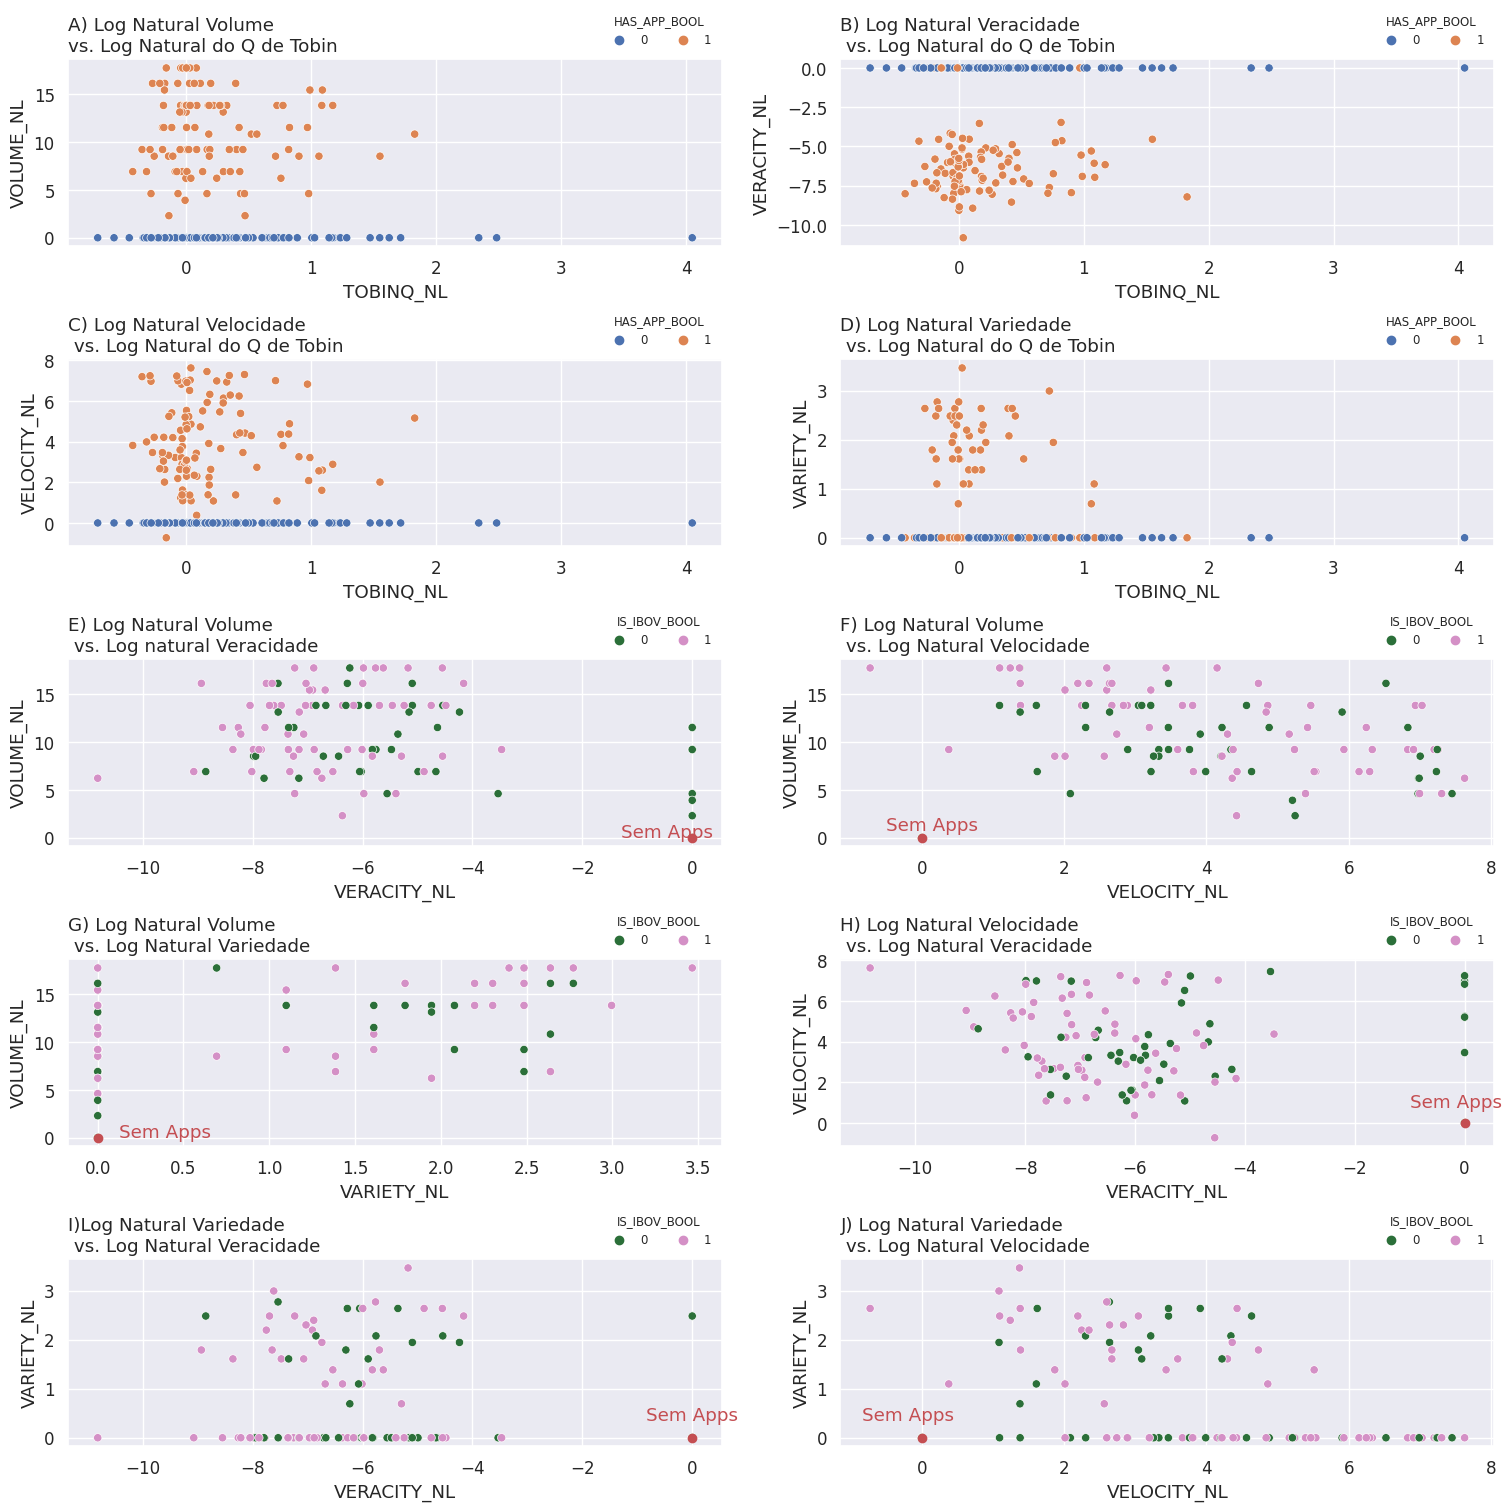

In [33]:
sns.set(font_scale=1.1)

# Generating a single chart with all of them together
fig, axes = plt.subplots(5,2, figsize=(15,15), constrained_layout=True)
'''lt.subplots_adjust(wspace=0.75,
                    hspace=0.85,
                    left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9)'''

# A) Big Data Volume vs. Tobin's Q Natural Log
a = sns.scatterplot(ax = axes[0,0], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VOLUME_NL", hue="HAS_APP_BOOL")
sns.move_legend(a, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,0].set_title("A) Log Natural Volume \nvs. Log Natural do Q de Tobin", loc='left',
                    #weight='bold'
                    )
axes[0,0].set(xlabel='TOBINQ_NL', ylabel='VOLUME_NL')



# B) Big Data Veracity vs. Tobin's Q Natural Log
b = sns.scatterplot(ax = axes[0,1], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VERACITY_NL", hue="HAS_APP_BOOL")
sns.move_legend(b, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,1].set_title("B) Log Natural Veracidade \n vs. Log Natural do Q de Tobin", loc='left')
axes[0,1].set(xlabel='TOBINQ_NL', ylabel='VERACITY_NL')


# C) Big Data Velocity vs. Tobin's Q Natural Log
c = sns.scatterplot(ax = axes[1,0], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VELOCITY_NL", hue="HAS_APP_BOOL")
sns.move_legend(c, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,0].set_title("C) Log Natural Velocidade \n vs. Log Natural do Q de Tobin", loc='left')
axes[1,0].set(xlabel='TOBINQ_NL', ylabel='VELOCITY_NL')


# D) Big Data Variety vs. Tobin's Q Natural Log
d = sns.scatterplot(ax = axes[1,1], data=df_tobinq_vs_bigdata_only, x='TOBINQ_NL', y="VARIETY_NL", hue="HAS_APP_BOOL")
sns.move_legend(d, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,1].set_title("D) Log Natural Variedade \n vs. Log Natural do Q de Tobin", loc='left')
axes[1,1].set(xlabel='TOBINQ_NL', ylabel='VARIETY_NL')


# E) Big Data Veracity vs. Big Data Volume
e = sns.scatterplot(ax = axes[2,0], data=df_tobinq_vs_bigdata_only, x='VERACITY_NL', y="VOLUME_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(e, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[2,0].set_title("E) Log Natural Volume \n vs. Log natural Veracidade", loc='left')
axes[2,0].set(xlabel='VERACITY_NL', ylabel='VOLUME_NL')
axes[2,0].annotate('Sem Apps', (-1.3,0), color='r' )
axes[2,0].scatter(x=0, y=0, color='r')


# F) Big Data Velocity vs. Big Data Volume
f = sns.scatterplot(ax = axes[2,1], data=df_tobinq_vs_bigdata_only, x='VELOCITY_NL', y="VOLUME_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(f, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[2,1].set_title("F) Log Natural Volume\n vs. Log Natural Velocidade", loc='left')
axes[2,1].set(xlabel='VELOCITY_NL', ylabel='VOLUME_NL')
axes[2,1].annotate('Sem Apps', (-0.5,0.75), color='r' )
axes[2,1].scatter(x=0, y=0, color='r')

# G) Big Data Variety vs. Big Data Volume
g = sns.scatterplot(ax = axes[3,0], data=df_tobinq_vs_bigdata_only, x='VARIETY_NL', y="VOLUME_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(g, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[3,0].set_title("G) Log Natural Volume \n vs. Log Natural Variedade", loc='left')
axes[3,0].set(xlabel='VARIETY_NL', ylabel='VOLUME_NL')
axes[3,0].annotate('Sem Apps', (0.125,0), color='r' )
axes[3,0].scatter(x=0, y=0, color='r')

# H) Big Data Veracity vs. Big Data Velocity
h = sns.scatterplot(ax = axes[3,1], data=df_tobinq_vs_bigdata_only, x='VERACITY_NL', y="VELOCITY_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(h, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[3,1].set_title("H) Log Natural Velocidade \n vs. Log Natural Veracidade", loc='left')
axes[3,1].set(xlabel='VERACITY_NL', ylabel='VELOCITY_NL')
axes[3,1].annotate('Sem Apps', (-1,0.75), color='r' )
axes[3,1].scatter(x=0, y=0, color='r')

# I) Big Data Veracity vs. Big Data Variety
i = sns.scatterplot(ax = axes[4,0], data=df_tobinq_vs_bigdata_only, x='VERACITY_NL', y="VARIETY_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(i, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[4,0].set_title("I)Log Natural Variedade \n vs. Log Natural Veracidade", loc='left')
axes[4,0].set(xlabel='VERACITY_NL', ylabel='VARIETY_NL')
axes[4,0].annotate('Sem Apps', (-0.85,0.35), color='r' )
axes[4,0].scatter(x=0, y=0, color='r')


# J) Big Data Velocity vs. Big Data Variety
j = sns.scatterplot(ax = axes[4,1], data=df_tobinq_vs_bigdata_only, x='VELOCITY_NL', y="VARIETY_NL", hue="IS_IBOV_BOOL", palette = "cubehelix")
sns.move_legend(j, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[4,1].set_title("J) Log Natural Variedade \n vs. Log Natural Velocidade", loc='left')
axes[4,1].set(xlabel='VELOCITY_NL', ylabel='VARIETY_NL')
axes[4,1].annotate('Sem Apps', (-0.85,0.35), color='r' )
axes[4,1].scatter(x=0, y=0, color='r')

plt.savefig('Scatter plots Tobin Q vs. Big Data and Big Data vs. Big Data PTBR.png'
            #, transparent=True
            )

In [34]:
df_tobinq_vs_bigdata_only.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'IS_IBOV_STR', 'HAS_APP_BOOL',
       'HAS_APP_STR', 'TRBC_ECONOMIC_SECTOR', 'TOBINQ', 'TOBINQ_NL',
       'VERACITY', 'VERACITY_NL', 'VOLUME', 'VOLUME_NL', 'VARIETY',
       'VARIETY_NL', 'VELOCITY', 'VELOCITY_NL'],
      dtype='object')

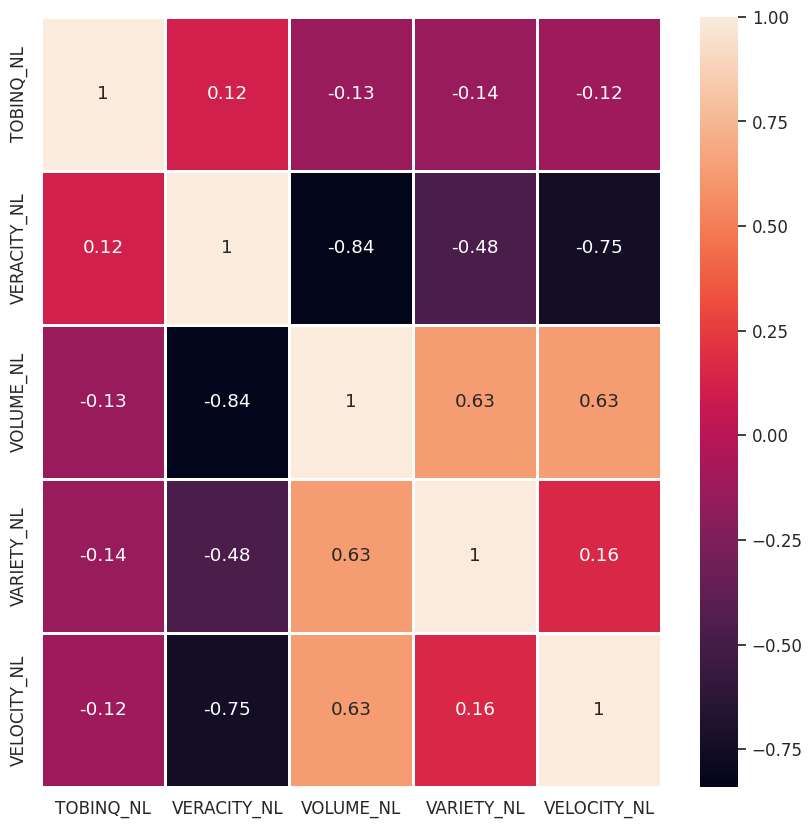

In [35]:
#Let's plot a correlation heatmap DV vs. IV variables
plt.subplots(figsize=(10,10))
sns.heatmap(df_tobinq_vs_bigdata_only[['TOBINQ_NL','VERACITY_NL','VOLUME_NL','VARIETY_NL','VELOCITY_NL']].corr(numeric_only=True).round(2), annot=True, linewidths=.9)
sns.set(font_scale=1.8)
#plt.title("Correlation Heatmap - Tobin's Q vs. Big Data Proxies")
plt.savefig("Correlation Heatmap - Tobin's Q vs. Big Data Proxies.png"
            #, transparent=True
            )

# Further exploratory analysis on Dependent Variable (DV) which is Tobin's Q Natural Log vs. Control variables

In [36]:
df_tobinq_vs_control_variables = df_tobinq_vs_bigdata[[
                                      'TICKER', 'NAME', 'IS_IBOV_BOOL', 'IS_IBOV_STR', 'HAS_APP_BOOL',
                                      'HAS_APP_STR', 'TRBC_ECONOMIC_SECTOR', 'TOBINQ', 'TOBINQ_NL',
                                      'TURNOVER', 'TURNOVER_NL', 'BETA','D_TO_A_RATIO_NL', 'FIRM_AGE'
]].copy()

In [37]:
df_tobinq_vs_control_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TICKER                234 non-null    object 
 1   NAME                  234 non-null    object 
 2   IS_IBOV_BOOL          234 non-null    int64  
 3   IS_IBOV_STR           234 non-null    object 
 4   HAS_APP_BOOL          234 non-null    int64  
 5   HAS_APP_STR           234 non-null    object 
 6   TRBC_ECONOMIC_SECTOR  234 non-null    object 
 7   TOBINQ                234 non-null    float64
 8   TOBINQ_NL             234 non-null    float64
 9   TURNOVER              234 non-null    float64
 10  TURNOVER_NL           234 non-null    float64
 11  BETA                  234 non-null    float64
 12  D_TO_A_RATIO_NL       234 non-null    float64
 13  FIRM_AGE              234 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 27.4+ KB


In [38]:
df_tobinq_vs_control_variables_for_corr = df_tobinq_vs_control_variables[[
    'TICKER', 'NAME','TRBC_ECONOMIC_SECTOR', 'TOBINQ_NL',
                                      'TURNOVER_NL', 'BETA','D_TO_A_RATIO_NL', 'FIRM_AGE'
]].copy()

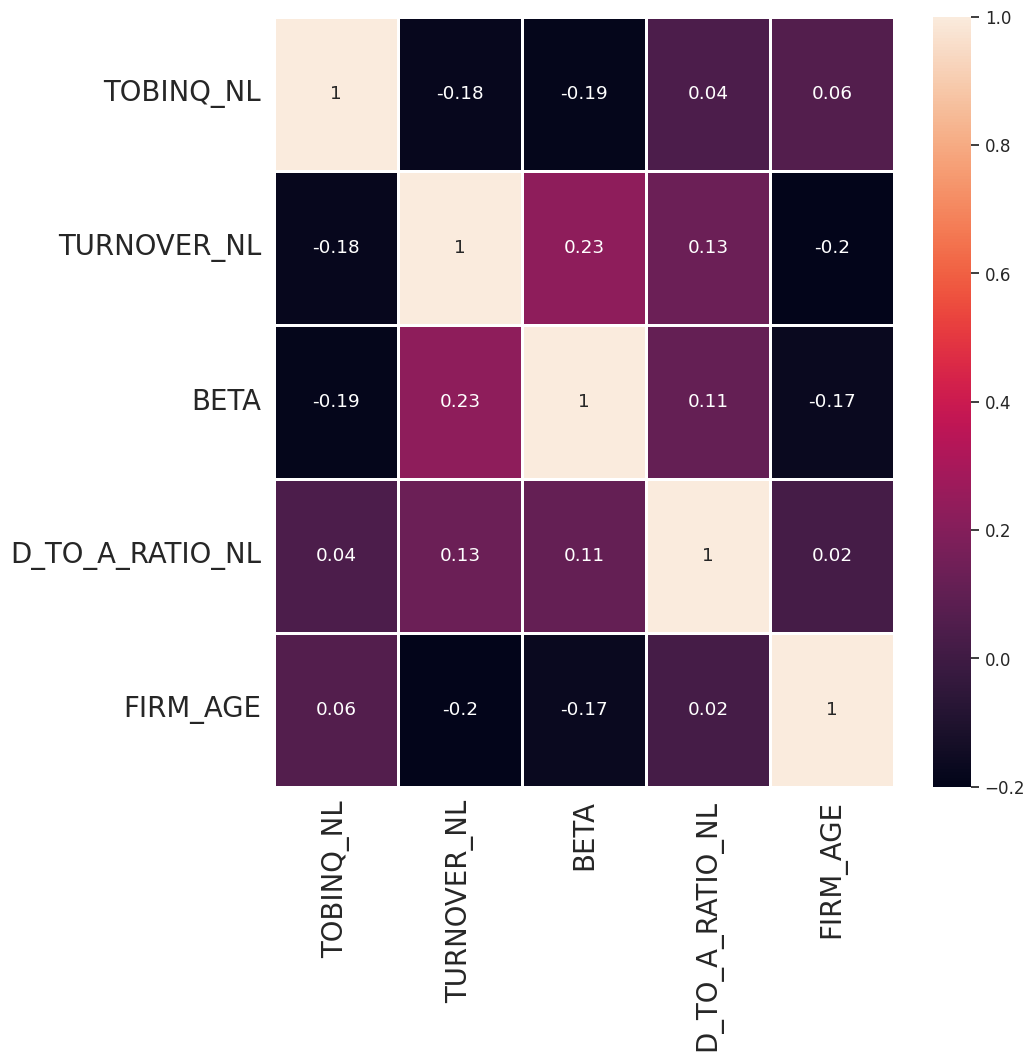

In [39]:
#Let's plot a correlation heatmap DV vs. Control variables
plt.subplots(figsize=(10,10))
sns.set(font_scale=1.1)
sns.heatmap(df_tobinq_vs_control_variables_for_corr.corr(numeric_only=True).round(2), annot=True, linewidths=.9)
#plt.title("Correlation Heatmap - Tobin's Q vs. Big Data Proxies")
plt.savefig("Correlation Heatmap - Tobin's Q vs. Control Variables.png"
            #, transparent=True
            )

In [40]:
df_tobinq_vs_control_variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TICKER                234 non-null    object 
 1   NAME                  234 non-null    object 
 2   IS_IBOV_BOOL          234 non-null    int64  
 3   IS_IBOV_STR           234 non-null    object 
 4   HAS_APP_BOOL          234 non-null    int64  
 5   HAS_APP_STR           234 non-null    object 
 6   TRBC_ECONOMIC_SECTOR  234 non-null    object 
 7   TOBINQ                234 non-null    float64
 8   TOBINQ_NL             234 non-null    float64
 9   TURNOVER              234 non-null    float64
 10  TURNOVER_NL           234 non-null    float64
 11  BETA                  234 non-null    float64
 12  D_TO_A_RATIO_NL       234 non-null    float64
 13  FIRM_AGE              234 non-null    float64
dtypes: float64(7), int64(2), object(5)
memory usage: 27.4+ KB


Generating a single figure by plotting DV Tobin's Q against all Control Variables.

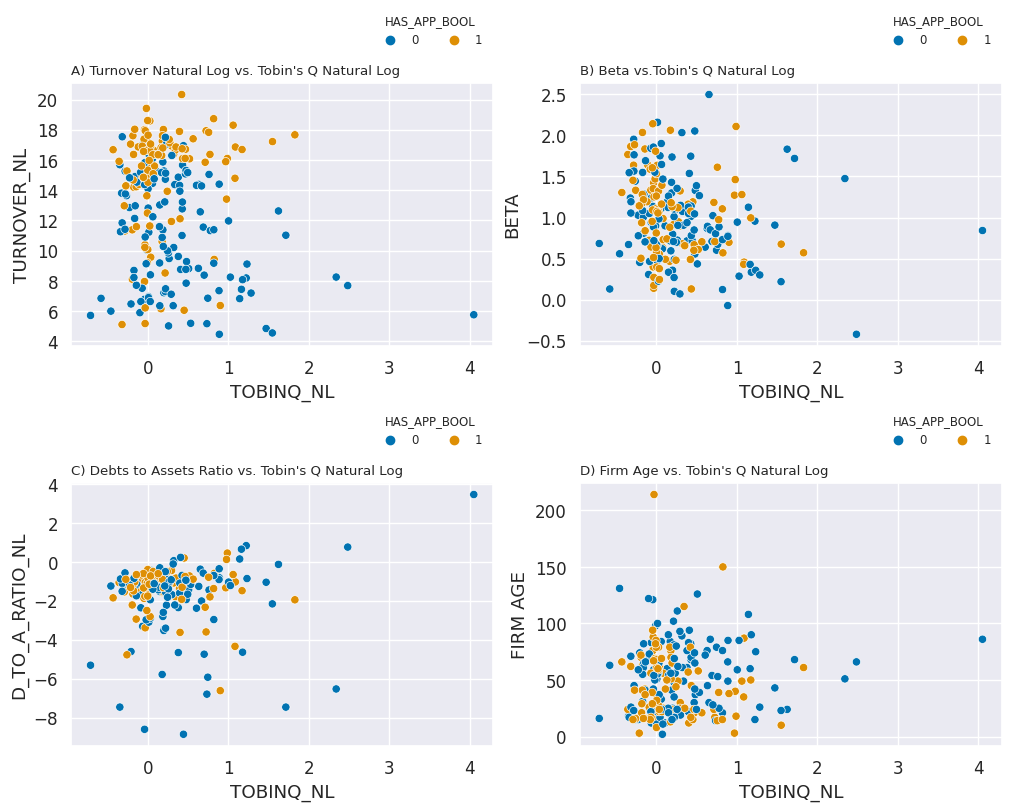

In [41]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)
'''lt.subplots_adjust(wspace=0.75,
                    hspace=0.85,
                    left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9)'''
sns.set(font_scale=0.8)
# A) Turnover Natural Log vs. Tobin's Q Natural Log
a = sns.scatterplot(ax = axes[0,0], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="TURNOVER_NL", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(a, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,0].set_title("A) Turnover Natural Log vs. Tobin's Q Natural Log", loc='left',
                    #weight='bold'
                    )
axes[0,0].set(xlabel='TOBINQ_NL', ylabel='TURNOVER_NL')



# B) Beta vs. Tobin's Q Natural Log
b = sns.scatterplot(ax = axes[0,1], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="BETA", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(b, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,1].set_title("B) Beta vs.Tobin's Q Natural Log", loc='left')
axes[0,1].set(xlabel='TOBINQ_NL', ylabel='BETA')


# C) Debts to Assets Ratio vs. Tobin's Q Natural Log
c = sns.scatterplot(ax = axes[1,0], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="D_TO_A_RATIO_NL", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(c, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,0].set_title("C) Debts to Assets Ratio vs. Tobin's Q Natural Log", loc='left')
axes[1,0].set(xlabel='TOBINQ_NL', ylabel='D_TO_A_RATIO_NL')


# D) Firm Age vs. Tobin's Q Natural Log
d = sns.scatterplot(ax = axes[1,1], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="FIRM_AGE", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(d, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,1].set_title("D) Firm Age vs. Tobin's Q Natural Log", loc='left')
axes[1,1].set(xlabel='TOBINQ_NL', ylabel='FIRM AGE')

plt.savefig('Scatter plots Tobin Q vs. Control Variables.png'
            #, transparent=True
            )

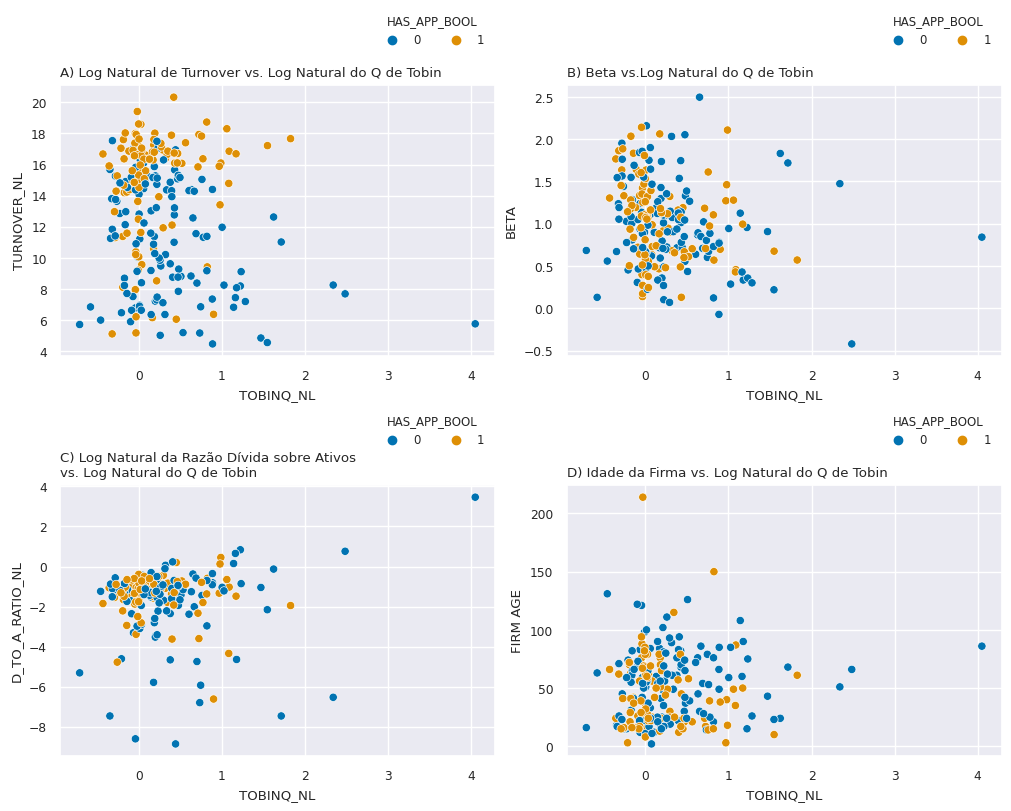

In [42]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)
'''lt.subplots_adjust(wspace=0.75,
                    hspace=0.85,
                    left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9)'''
sns.set(font_scale=0.8)
# A) Turnover Natural Log vs. Tobin's Q Natural Log
a = sns.scatterplot(ax = axes[0,0], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="TURNOVER_NL", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(a, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,0].set_title("A) Log Natural de Turnover vs. Log Natural do Q de Tobin", loc='left',
                    #weight='bold'
                    )
axes[0,0].set(xlabel='TOBINQ_NL', ylabel='TURNOVER_NL')



# B) Beta vs. Tobin's Q Natural Log
b = sns.scatterplot(ax = axes[0,1], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="BETA", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(b, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[0,1].set_title("B) Beta vs.Log Natural do Q de Tobin", loc='left')
axes[0,1].set(xlabel='TOBINQ_NL', ylabel='BETA')


# C) Debts to Assets Ratio vs. Tobin's Q Natural Log
c = sns.scatterplot(ax = axes[1,0], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="D_TO_A_RATIO_NL", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(c, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,0].set_title("C) Log Natural da Razão Dívida sobre Ativos \nvs. Log Natural do Q de Tobin", loc='left')
axes[1,0].set(xlabel='TOBINQ_NL', ylabel='D_TO_A_RATIO_NL')


# D) Firm Age vs. Tobin's Q Natural Log
d = sns.scatterplot(ax = axes[1,1], data=df_tobinq_vs_control_variables, x='TOBINQ_NL', y="FIRM_AGE", hue="HAS_APP_BOOL", palette="colorblind")
sns.move_legend(d, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(1,1.3), ncol=2, title_fontsize='8.5')
axes[1,1].set_title("D) Idade da Firma vs. Log Natural do Q de Tobin", loc='left')
axes[1,1].set(xlabel='TOBINQ_NL', ylabel='FIRM AGE')

plt.savefig('Scatter plots Tobin Q vs. Control Variables PTBR.png'
            #, transparent=True
            )

# Some discussion about what I could see from the exploratory data analysis

Firstly, let's remember the Hypothesis I will need to check:


*   **H1->** The greater the volume, the smaller the impact of Big Data on firm performance
*   **H2->** The variety of Big Data available positively impacts firm performance
* **H3->** The veracity of Big Data positively impacts firm performance
* **H4->** The speed of Big Data updating (velocity)  positively impacts firm performance
* **H5->** Firms that implemented Big Data first (early adopters) performed better
* **H6->** In TRBC Economic Sectors where the use of Big Data is greater, the impact on performance is smaller

## My Dependent Variable: Tobin's Q Natural Log

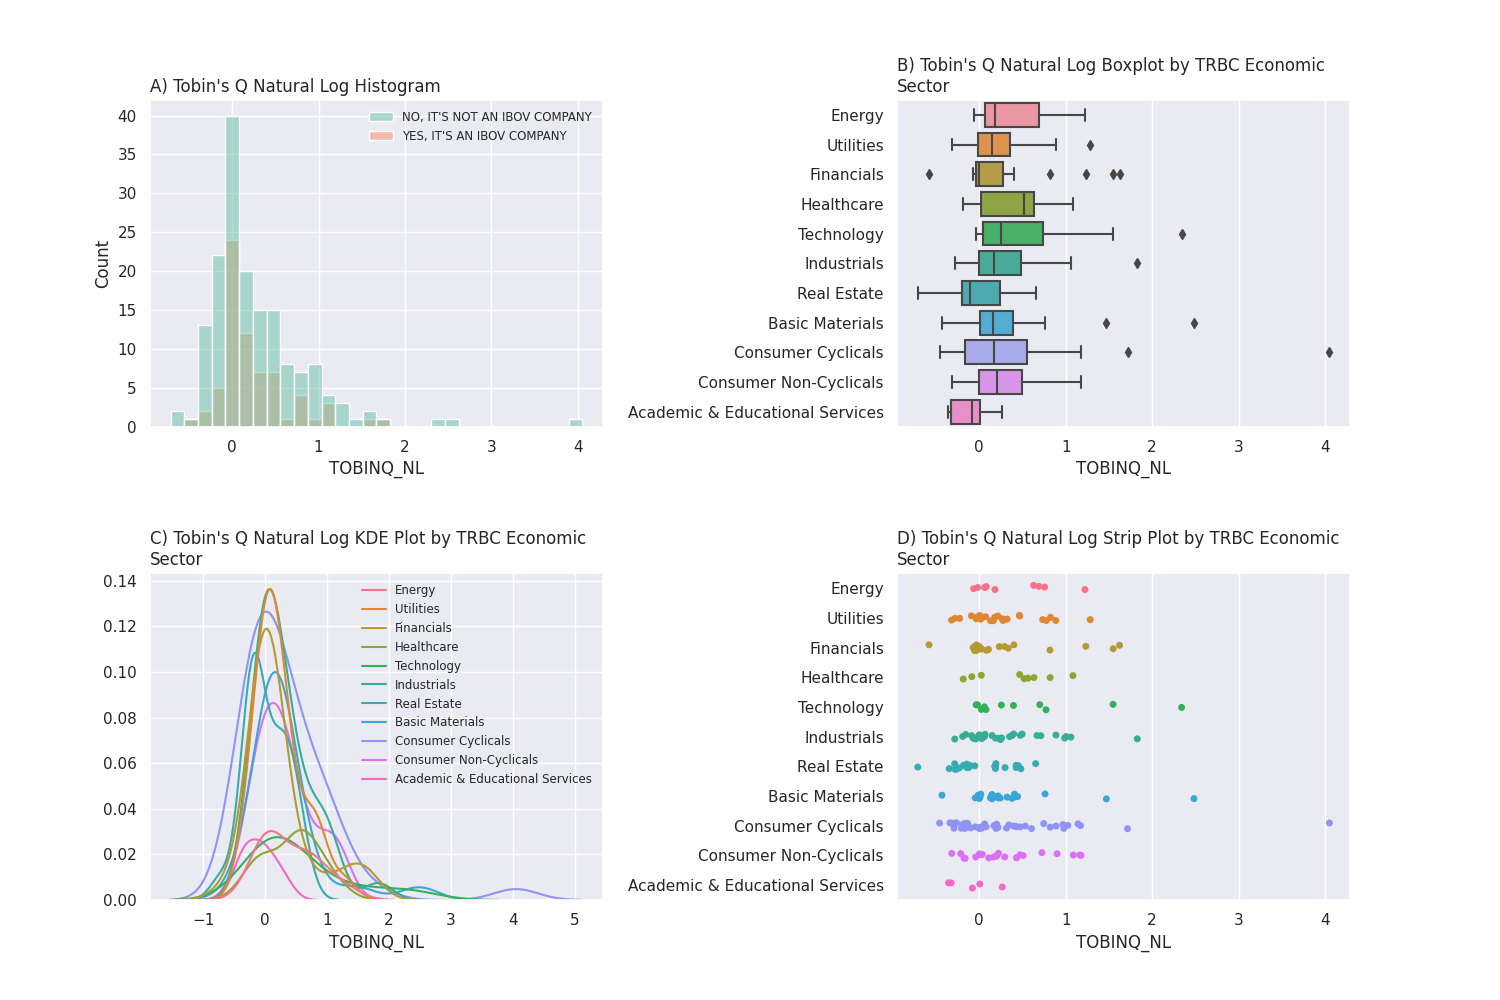

Tobin's Q, as expected, seems to be dependent data. This means that observations within the same Cluster seems to follow specific patterns.<br>

Those clusters might be:<br>

1.   Companies that integrates IBOV index vs. Companies that don't (Subplot A)
2.   Companies that integrates the same TRBC Economic Sector (Subplots B to D)
3. Also, the data distribution varies a lot by TRBC Economic Sector, for example (Subplot C)<br>

Another thing to keep in mind is about the Financials TRBC Economic Sector. From the Subplot B it's clear that this specific cluster has specific dynamics in terms of the data. I will not exclude companies from Financials TRBC Economic Sector, but if needed is totally possible to exclude and run the models again.







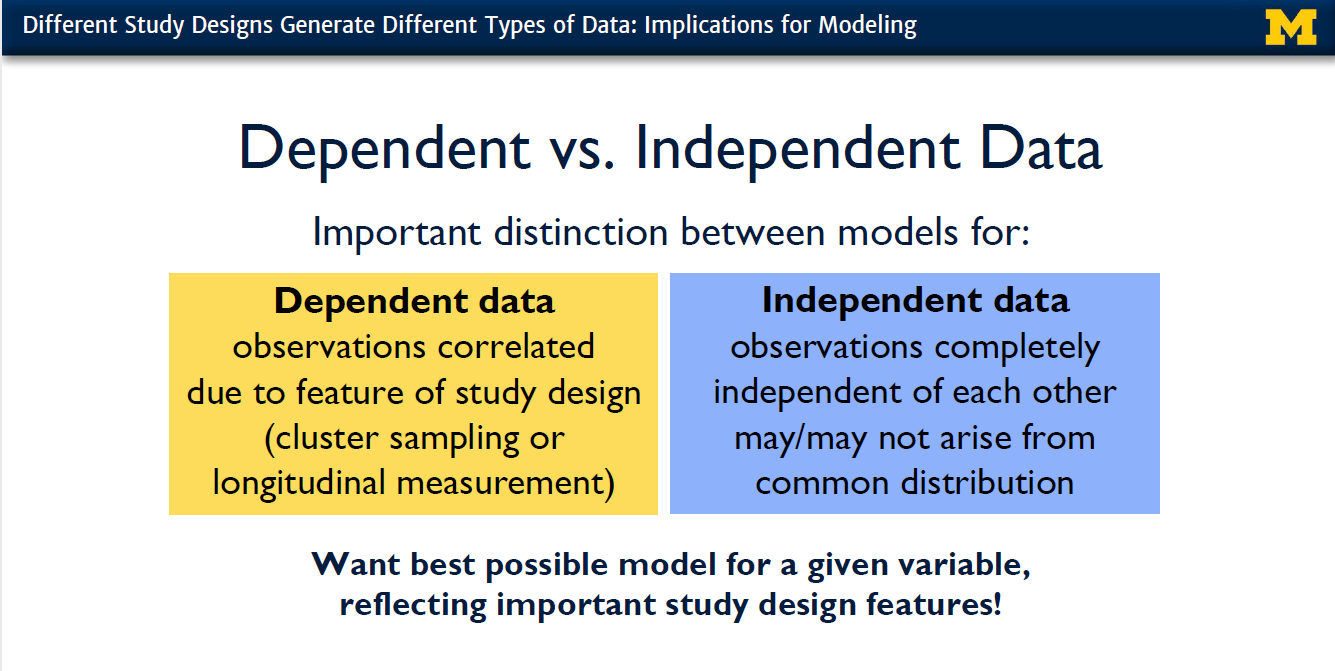

Source: [https://www.coursera.org/learn/fitting-statistical-models-data-python](https://www.coursera.org/learn/fitting-statistical-models-data-python)

Also it is important to define that this research aims capturing relationship between variables rather than forecasting future outcomes.

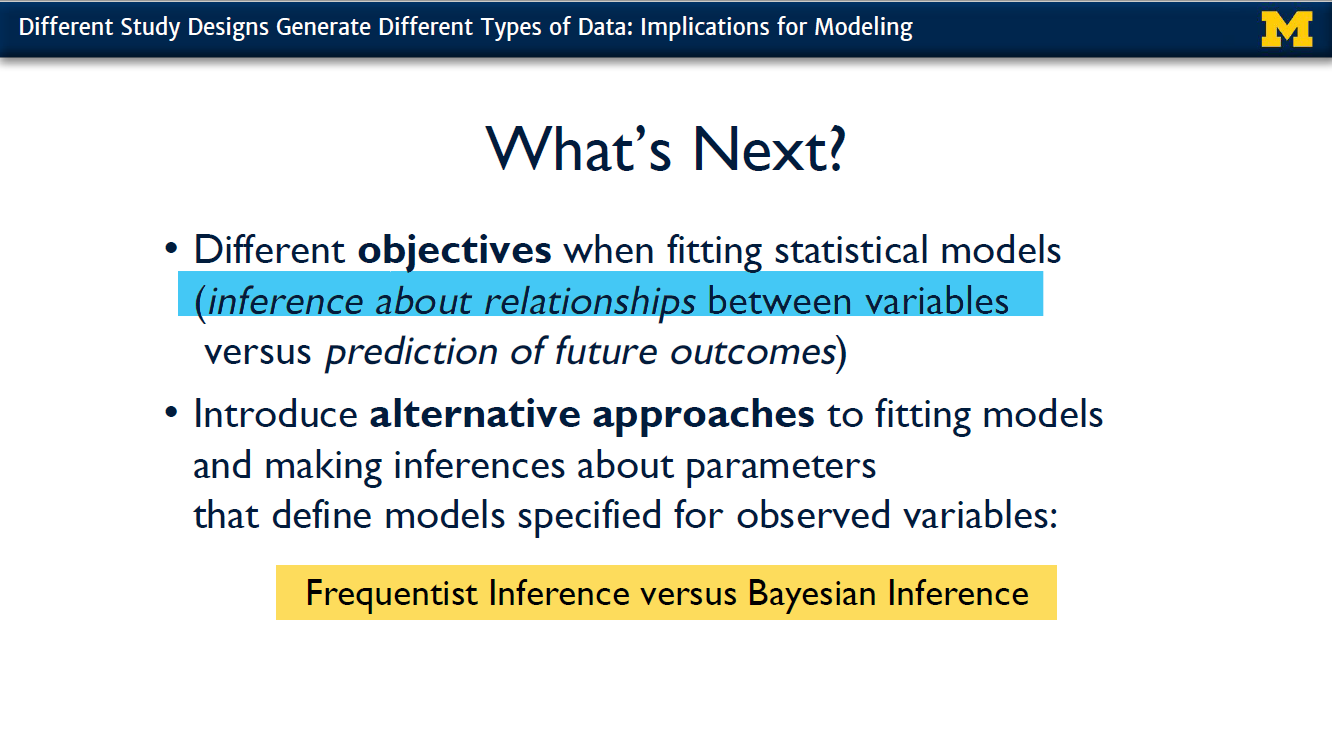

Source: [https://www.coursera.org/learn/fitting-statistical-models-data-python](https://www.coursera.org/learn/fitting-statistical-models-data-python)

# What is the logic of the next sections, in terms of plotting the models?

### I need to account for a huge amount of outliers in each of the variables inserted into the model. Control, Independent and Dependent variables, all of them, has a LOT of outliers.<br>

### With this in mind, **I've built a logical set of scenarios** to evaluate which transformation is good or not for the best model fit to the collected data. The aim of this logic is to choose the exact combination of transformations and model type (OLS - Ordinary Least Squares or RLM - Robust Linear Model with M-estimator being Trimmed Mean) **avoiding p-hacking practices - forcing statistical significance by combining a HUGE amount of statistical transformation.**<br>

### Find below the scenarios and the descriptions:<br>

#### **Scenario 1: variables without any type of transformation**<br>
-> Model A: OLS<br>
-> Model B: RLM (M-estimator == Trimmed Mean -> handle outliers better than OLS)<br>
-> Always comparing A x B<br><br>

#### **Scenario 2: variables with outliers removed, but no natural log**<br>
-> Model A: OLS<br>
-> Model B: RLM (M-estimator == Trimmed Mean -> handle outliers better than OLS)<br>
-> Always comparing A x B<br><br>

#### **Scenario 3: No Outliers + Big Data Volume as Natural Log + Variety transformed from continous to boolean - 0 not present, 1 present - (deal with a huge amount of outliers without removing from the model)**<br>
-> Model A: OLS<br>
-> Model B: RLM (M-estimator == Trimmed Mean -> handle outliers better than OLS)<br>
-> Always comparing A x B<br>

#### **Scenario 4: all transformations from Scenario 3 + Tobin's Q Natural Log + Turnover Natural Log (deal with right skewed distribution)**<br>
-> Model A: OLS<br>
-> Model B: RLM (M-estimator == Trimmed Mean -> handle outliers better than OLS)<br>
-> Always comparing A x B<br>

#### **Scenario 4.1: all transformations from Scenario 4 + removing Turnover Natural Log (due to high VIF observed in scenario 4)**<br>
-> Model A: OLS<br>
-> Model B: RLM (M-estimator == Trimmed Mean -> handle outliers better than OLS)<br>
-> Always comparing A x B<br>

#### **In each Scenario x Model:**<br>
-> Run the model<br>
-> Run the Shapiro-Wilk test (residual normality)<br>
-> Run the Breusch-Pagan test (heteroscedasticity present?)<br>
-> Plot the graphs always Model A OLS vs. Model B RLM:<br>
* Residuals vs. Fitted Values<br>
* QQ Plot<br>
* Residuals distribution<br>
* VIF Table

In [43]:
def model_formula(all_variables_in_the_model):

  '''
  This function returns a model_formula, as str, to use in statsmodels from a list of variables where the
  FIRST one MUST be the dependent variable

  ex.:
  INPUT: all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL','BETA', 'D_TO_A_RATIO', 'FIRM_AGE']
  OUTPUT: TOBINQ_NL ~ TURNOVER_NL + BETA + D_TO_A_RATIO + FIRM_AGE

  where TOBINQ_NL is the dependent variable and the others after the tilde are the independent variables
  '''

  model_formula = ""
  for variable in all_variables_in_the_model:
    # testing if variable is the first one to add a tilde into the model_formula
    if variable == all_variables_in_the_model[0]:
      model_formula = variable + " ~ "
    # testing if variable is the seconde one to only add a space, not a "+" sign
    elif variable == all_variables_in_the_model[1]:
      model_formula = model_formula + variable
    else:
      model_formula = model_formula + " + " + variable
  return model_formula

In [44]:
# example of model_formula tailored function working
model_formula(all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL','BETA', 'D_TO_A_RATIO', 'FIRM_AGE'])

'TOBINQ_NL ~ TURNOVER_NL + BETA + D_TO_A_RATIO + FIRM_AGE'

In [45]:
def export_images_side_by_side(list_of_two_images, output_file_name):

  import sys
  from PIL import Image

  images = [Image.open(x) for x in list_of_two_images]
  widths, heights = zip(*(i.size for i in images))

  total_width = sum(widths)
  max_height = max(heights)

  new_im = Image.new('RGB', (total_width, max_height))

  x_offset = 0
  for im in images:
    new_im.paste(im, (x_offset,0))
    x_offset += im.size[0]

  new_im.save('{}.png'.format(str(output_file_name)))

In [46]:
# I will create a tailored function that will deliver everything I need, to avoid writing a LOT of code

def run_scenario(df_with_data, all_variables_in_the_model, dependent_variable, independent_variables, scenario_specification):

  # Generating the model_formula to use on both OLS and RLM models
  print("[LOG] Generating model_formula...")
  model_formula(all_variables_in_the_model)

  # MODEL A - OLS
  print("[LOG] Building Model A - OLS specification...")
  model_specification_ols = sm.OLS.from_formula(    model_formula(all_variables_in_the_model),
                                                    data=df_with_data[all_variables_in_the_model]

                                                )
  print("[LOG] Building Model A - OLS .fit()...")
  model_fit_ols = model_specification_ols.fit()

  print("[LOG] Building Model A - OLS main table layout...")
  model_A_main_table = pd.DataFrame({
                                      'model_a_coeficients': round(model_fit_ols.params,4),
                                      'model_a_pvalues': round(model_fit_ols.pvalues,4)
                                    }
                                    )
  model_A_main_table = model_A_main_table.reset_index()

  # MODEL B - RLM
  print("[LOG] Building Model B - RLM specification...")
  model_specification_rlm = sm.RLM.from_formula(model_formula(all_variables_in_the_model),
                                                data=df_with_data[all_variables_in_the_model],
                                                M=sm.robust.norms.TrimmedMean() # defining the M-estimator for the RLM as trimmed mean
                                                )
  print("[LOG] Building Model B - RLM .fit()...")
  model_fit_rlm = model_specification_rlm.fit()

  print("[LOG] Building Model B - RLM main table layout...")
  model_B_main_table = pd.DataFrame({
                                      'model_b_coeficients': round(model_fit_rlm.params,4),
                                      'model_b_pvalues': round(model_fit_rlm.pvalues,4)
                                    }
                                    )
  model_B_main_table = model_B_main_table.reset_index()

  # Exporting a .txt file demonstrating |Model A - OLS vs. Model B - RLM | summaries for the specific Scenario
  print("[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...")
  with open('{}.txt'.format(str(scenario_specification).upper()), 'w') as fh:
    fh.write(str(scenario_specification) + '\n\n\n')
    fh.write(str("Model A - OLS ---------------------------------------------------------------------------------------") + '\n\n\n')
    fh.write(model_fit_ols.summary().as_text())
    fh.write(str("\n\n\nModel B - RLM ---------------------------------------------------------------------------------------") + '\n\n\n')
    fh.write(model_fit_rlm.summary().as_text())



  # Calculating Shapiro-Wilk normality test accounting for the residuals normality on both models
  print("[LOG] Calculating Shapiro-Wilk test for residuals normality...")
  model_shapiro_wilk_ols = shapiro(model_fit_ols.resid)
  model_shapiro_wilk_rlm = shapiro(model_fit_rlm.resid)

  # Calculating Breusch-Pagan test accounting for the presence of heteroskedacity in the residuals on both models
  # MODEL A - OLS
  print("[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...")
  X = df_with_data[independent_variables]
  X = sm.add_constant(X)

  model_breusch_pagan_ols_step1 = het_breuschpagan(model_fit_ols.resid, X)
  model_breusch_pagan_ols = model_breusch_pagan_ols_step1[1]

  # MODEL B - RLM
  X = df_with_data[independent_variables]
  X = sm.add_constant(X)

  model_breusch_pagan_rlm_step1 = het_breuschpagan(model_fit_rlm.resid, X, robust=True)
  model_breusch_pagan_rlm = model_breusch_pagan_rlm_step1[1]

  # -------------- Setting font_scale for Seaborn plots
  sns.set(font_scale=1.1)

  # -------------------------------------------EXPORTING MODEL A - OLS CHARTS -----------------------------------------------------------------
  print("[LOG] Exporting Model A - OLS charts...")
  # Building and Exporting as .png charts for the Model A - OLS
  model_results_to_plot = model_fit_ols
  model_shapiro_wilk_results = model_shapiro_wilk_ols
  model_breuschpagan_results = model_breusch_pagan_ols

  # Generating a single chart with all of them together
  fig, axes = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)
  fig.delaxes(axes[1,1])



  # A) Residuals vs. Fitted Values
  a = sns.scatterplot(ax = axes[0,0], x = model_results_to_plot.fittedvalues, y = model_results_to_plot.resid)
  axes[0,0].set_xlabel("Valores Ajustados")
  axes[0,0].set_ylabel("Resíduos")
  axes[0,0].set_title("A) Resíduos vs. Valores Ajustados", loc='left',
                      #weight='bold'
                      )


  # B) QQ Plot
  b = sm.qqplot(model_results_to_plot.resid, line='45', ax = axes[0,1], fit=True);
  axes[0,1].set_title("B) QQ Plot", loc='left',
                      #weight='bold'
                      )


  # C) QQ Plot
  c = sns.histplot(model_results_to_plot.resid, kde=True, ax = axes[1,0])
  axes[1,0].set_title("C) Dsitribuição dos Resíduos", loc='left',
                      #weight='bold'
                      )


  plt.gcf().text(0.55, 0.3, '''
  Shapiro-Wilk:
  *test statistic {:0.4}
  *p-value {:0.4e}

  Breusch-Pagan:
  *p-value {:0.4e}'''.format(
                    model_shapiro_wilk_results.statistic,
                    model_shapiro_wilk_results.pvalue,
                    model_breuschpagan_results
                ))

  plt.suptitle("{} Cenário A usando MQO".format(str(scenario_specification).upper()))

  plt.savefig("{} Model A using OLS.png".format(str(scenario_specification).upper())
              #, transparent=True
              )
  plt.close()
  # -------------------------------------------EXPORTING MODEL B - RLM CHARTS -----------------------------------------------------------------
  print("[LOG] Exporting Model B - RLM charts...")
  # Building and Exporting as .png charts for the Model B - RLM
  model_results_to_plot = model_fit_rlm
  model_shapiro_wilk_results = model_shapiro_wilk_rlm
  model_breuschpagan_results = model_breusch_pagan_rlm

  # Generating a single chart with all of them together
  fig, axes = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)
  fig.delaxes(axes[1,1])



  # A) Residuals vs. Fitted Values
  a = sns.scatterplot(ax = axes[0,0], x = model_results_to_plot.fittedvalues, y = model_results_to_plot.resid)
  axes[0,0].set_xlabel("Valores Ajustados")
  axes[0,0].set_ylabel("Resíduos")
  axes[0,0].set_title("A) Resíduos vs. Valores Ajustados", loc='left',
                      #weight='bold'
                      )


  # B) QQ Plot
  b = sm.qqplot(model_results_to_plot.resid, line='45', ax = axes[0,1], fit=True);
  axes[0,1].set_title("B) QQ Plot", loc='left',
                      #weight='bold'
                      )


  # C) QQ Plot
  c = sns.histplot(model_results_to_plot.resid, kde=True, ax = axes[1,0])
  axes[1,0].set_title("C) Distribuição dos Resíduos", loc='left',
                      #weight='bold'
                      )


  plt.gcf().text(0.55, 0.3, '''
  Shapiro-Wilk:
  *test statistic {:0.4}
  *p-value {:0.4e}

  Breusch-Pagan:
  *p-value {:0.4e}'''.format(
                    model_shapiro_wilk_results.statistic,
                    model_shapiro_wilk_results.pvalue,
                    model_breuschpagan_results
                ))

  plt.suptitle("{} Cenário B usando Regressão Linear Robusta".format(str(scenario_specification).upper()))

  plt.savefig("{} Model B using RLM with M-estimator as Trimmed Mean.png".format(str(scenario_specification).upper())
              #, transparent=True
              )
  plt.close()
  #calling export images side by side
  print("[LOG] Exporting Model A - OLS vs. Model B - RLM charts...")
  export_images_side_by_side(["{} Model A using OLS.png".format(str(scenario_specification).upper()),
                              "{} Model B using RLM with M-estimator as Trimmed Mean.png".format(str(scenario_specification).upper())],
                              "{} Model A OLS vs. Model B RLM Charts Comparison".format(str(scenario_specification).upper())
                              )

  print("[LOG] Exporting VIF for the independent variables to verify multicollinearity...")
  # Calculating VIF
  X = df_with_data[independent_variables]

  vif_info = pd.DataFrame()
  vif_info['VIF'] = [variance_inflation_factor(X.to_numpy(dtype=float, na_value=0), i) for i in range(X.shape[1])]
  vif_info['Variable_name'] = X.columns
  vif_info.sort_values('VIF', ascending=False)
  vif_info.loc['VIF_mean'] = vif_info.mean()
  vif_info.to_excel("{} VIF Analysis.xlsx".format(str(scenario_specification).upper()), index=False)

  # Exporting a .csv file demonstrating main tables from Model A and B side by side
  print("[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...")
  # MODEL A
  #model_A_main_table.to_excel("{} Model A Main Table.xlsx".format(str(scenario_specification).upper()))
  model_A_main_table['model_a_coeficients'] = model_A_main_table['model_a_coeficients'].astype(str)
  model_A_main_table['model_a_pvalues'] = model_A_main_table['model_a_pvalues'].astype(str)
  model_A_main_table.loc[len(model_A_main_table.index)] = ['No. Observations', str(model_fit_ols.nobs), str(model_fit_ols.nobs)]
  model_A_main_table.loc[len(model_A_main_table.index)] = ['Rsquared', str('{:.4f}'.format(model_fit_ols.rsquared)), str('{:.4f}'.format(model_fit_ols.rsquared))]
  model_A_main_table.loc[len(model_A_main_table.index)] = ['Breusch-Pagan', str('{:.10f}'.format(model_breusch_pagan_ols)),str('{:.10f}'.format(model_breusch_pagan_ols))]
  model_A_main_table.loc[len(model_A_main_table.index)] = ['Shapiro-Wilk p-value', str('{:.10f}'.format(model_shapiro_wilk_ols.pvalue)),str('{:.10f}'.format(model_shapiro_wilk_ols.pvalue))]
  model_A_main_table.loc[len(model_A_main_table.index)] = ['Model Type', 'OLS','OLS']

  # MODEL B
  #model_B_main_table.to_excel("{} Model B Main Table.xlsx".format(str(scenario_specification).upper()))
  model_B_main_table['model_b_coeficients'] = model_B_main_table['model_b_coeficients'].astype(str)
  model_B_main_table['model_b_pvalues'] = model_B_main_table['model_b_pvalues'].astype(str)
  model_B_main_table.loc[len(model_B_main_table.index)] = ['No. Observations', str(model_fit_rlm.nobs), str(model_fit_rlm.nobs)]
  model_B_main_table.loc[len(model_B_main_table.index)] = ['Rsquared', "n/a", "n/a"]
  model_B_main_table.loc[len(model_B_main_table.index)] = ['Breusch-Pagan', str('{:.10f}'.format(model_breusch_pagan_rlm)),str('{:.10f}'.format(model_breusch_pagan_rlm))]
  model_B_main_table.loc[len(model_B_main_table.index)] = ['Shapiro-Wilk p-value', str('{:.10f}'.format(model_shapiro_wilk_rlm.pvalue)),str('{:.10f}'.format(model_shapiro_wilk_rlm.pvalue))]
  model_B_main_table.loc[len(model_B_main_table.index)] = ['Model Type', 'RLM','RLM']

  # COMBINED
  scenario_main_table_combined = pd.concat([model_A_main_table,model_B_main_table], axis=1)
  scenario_main_table_combined.columns = ['result_description','model_a_coeficients', 'model_a_pvalues', 'ignore',
       'model_b_coeficients', 'model_b_pvalues']
  scenario_main_table_combined['scenario_description'] = scenario_specification.upper()
  scenario_main_table_combined[[
      'scenario_description','result_description','model_a_coeficients', 'model_a_pvalues','model_b_coeficients', 'model_b_pvalues'
  ]].to_excel("{} Main Table Combined.xlsx".format(str(scenario_specification).upper()), index=False)

  #print("[LOG] All methods from OLS results: \n" + str(dir(model_fit_ols)))
  #print("[LOG] All methods from RLM results: \n" + str(dir(model_fit_rlm)))

# Plotting the models (H1 to H4)

*   **H1->** The greater the volume, the smaller the impact of Big Data on firm performance
*   **H2->** The variety of Big Data available positively impacts firm performance
* **H3->** The veracity of Big Data positively impacts firm performance
* **H4->** The speed of Big Data updating (velocity)  positively impacts firm performance

## Preparing scenarios dataframes

The most raw dataframe is obtained by the next code line.

In [47]:
df_model_raw_filtered_has_tobin_q = df_model_raw.query("tobin_q!=0")

In [48]:
df_model_raw_filtered_has_tobin_q.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 49 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   identifier_ric                                                234 non-null    object 
 1   company_name                                                  234 non-null    object 
 2   country_of_exchange                                           234 non-null    object 
 3   trbc_economic_sector_name                                     234 non-null    object 
 4   organization_website                                          234 non-null    object 
 5   organization_founded_year                                     234 non-null    int64  
 6   organization_email_domain                                     234 non-null    object 
 7   organization_founded_month                                    234 non-n

In [49]:
# Renaming columns
df_tobinq_vs_bigdata = df_model_raw_filtered_has_tobin_q[[
    # CATEGORICAL VARIABLES
    'identifier_ric',
    'company_name',
    'is_ibov_bool',
    'is_ibov_str',
    'has_app_bool',
    'has_app_str',
    'trbc_economic_sector_name',

    # DV
    'tobin_q',
    'tobin_q_natural_log',

    # CONTROL VARIABLES TURNOVER_NL + BETA + D_TO_A_RATIO + FIRM_AGE
    'turnover',
    'natural_log_turnover',
    'beta',
    'total_debts_to_total_assets_ratio',
    'firm_age',



    # Big Data IV's
    'data_perc_employees',
    'data_perc_employees_natural_log',

    'play_store_sum_downloads',
    'play_store_sum_downloads_natural_log',

    'play_store_sum_different_types_of_data_collected',
    'play_store_sum_different_types_of_data_collected_natural_log',

    'play_store_update_freshness_in_days',
    'play_store_update_freshness_in_days_natural_log'


]].copy()
df_tobinq_vs_bigdata.columns = [
                                #Renaming CATEGORICAL VARIABLES
                                'TICKER','NAME','IS_IBOV_BOOL', 'IS_IBOV_STR','HAS_APP_BOOL','HAS_APP_STR','TRBC_ECONOMIC_SECTOR',

                                #Renaming DV
                                'TOBINQ','TOBINQ_NL',

                                #Renaming CONTROL VARIABLES
                                'TURNOVER',
                                'TURNOVER_NL',
                                'BETA',
                                'D_TO_A_RATIO',
                                'FIRM_AGE',

                                #Renaming BIG DATA IV's
                                'VERACITY',
                                'VERACITY_NL',

                                'VOLUME',
                                'VOLUME_NL',

                                'VARIETY',
                                'VARIETY_NL',

                                'VELOCITY',
                                'VELOCITY_NL'
                                ]

### Scenario 1: variables without any type of transformation

In [50]:
df_scenario1 = df_tobinq_vs_bigdata[[
                                    'TICKER','NAME','IS_IBOV_BOOL','TRBC_ECONOMIC_SECTOR','HAS_APP_BOOL',
                                    'TOBINQ',
                                    'TOBINQ_NL',
                                    'TURNOVER',
                                    'BETA',
                                    'D_TO_A_RATIO',
                                    'FIRM_AGE',
                                    'VERACITY',
                                    'VOLUME',
                                    'VARIETY',
                                    'VELOCITY'
                                ]].copy()

### Scenario 2: variables without any type of transformation, without outliers

In [51]:
def identify_outliers(df, column):
    '''
          the identify_outliers function takes a pandas DataFrame (df) and a column name (column) as input.
          Inside the function, we calculate the first quartile (q1), the third quartile (q3), and the IQR.
          We then define the lower bound and upper bound for outliers as 1.5 times the IQR below Q1 and above Q3, respectively.
          Finally, we use these bounds to filter and return the outliers from the DataFrame.
          Then we return a df without the data points that were outliers.

    '''
    # Calculate the quartiles and IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Identify the outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)].sort_values(by=[column])

    # keeping indexes into the variable tobinq_outliers_index
    outliers_index = outliers.index.to_list()

    # dataframe without column outliers
    df_without_ouliers = df.loc[~df.index.isin(outliers_index)]

    return df_without_ouliers

In [52]:
# The Scenario 2 starts the same way as Scenario 1
df_scenario2 = df_scenario1.copy()

In [53]:
df_scenario2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 234 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TICKER                234 non-null    object 
 1   NAME                  234 non-null    object 
 2   IS_IBOV_BOOL          234 non-null    int64  
 3   TRBC_ECONOMIC_SECTOR  234 non-null    object 
 4   HAS_APP_BOOL          234 non-null    int64  
 5   TOBINQ                234 non-null    float64
 6   TOBINQ_NL             234 non-null    float64
 7   TURNOVER              234 non-null    float64
 8   BETA                  234 non-null    float64
 9   D_TO_A_RATIO          234 non-null    float64
 10  FIRM_AGE              234 non-null    float64
 11  VERACITY              234 non-null    float64
 12  VOLUME                234 non-null    int64  
 13  VARIETY               234 non-null    int64  
 14  VELOCITY              234 non-null    float64
dtypes: float64(8), int64(4)

#### Boxplots during Outliers treatment

I will generate a 3x3 subplot for the 9 variables in a recursive way.

In [54]:
list_of_variables_to_generate_boxplot = [ 'TOBINQ',
                                          'TURNOVER',
                                          'BETA',
                                          'D_TO_A_RATIO',
                                          'FIRM_AGE',
                                          'VERACITY',
                                          'VOLUME',
                                          'VARIETY',
                                          'VELOCITY'
                                          ]

In [55]:
# creating the list of axes
axes_list = []
for row in (range(0,3)):
  for column in (range(0,3)):
    axes_list.append(  (row,column)  )

print(axes_list)
print(len(axes_list))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]
9


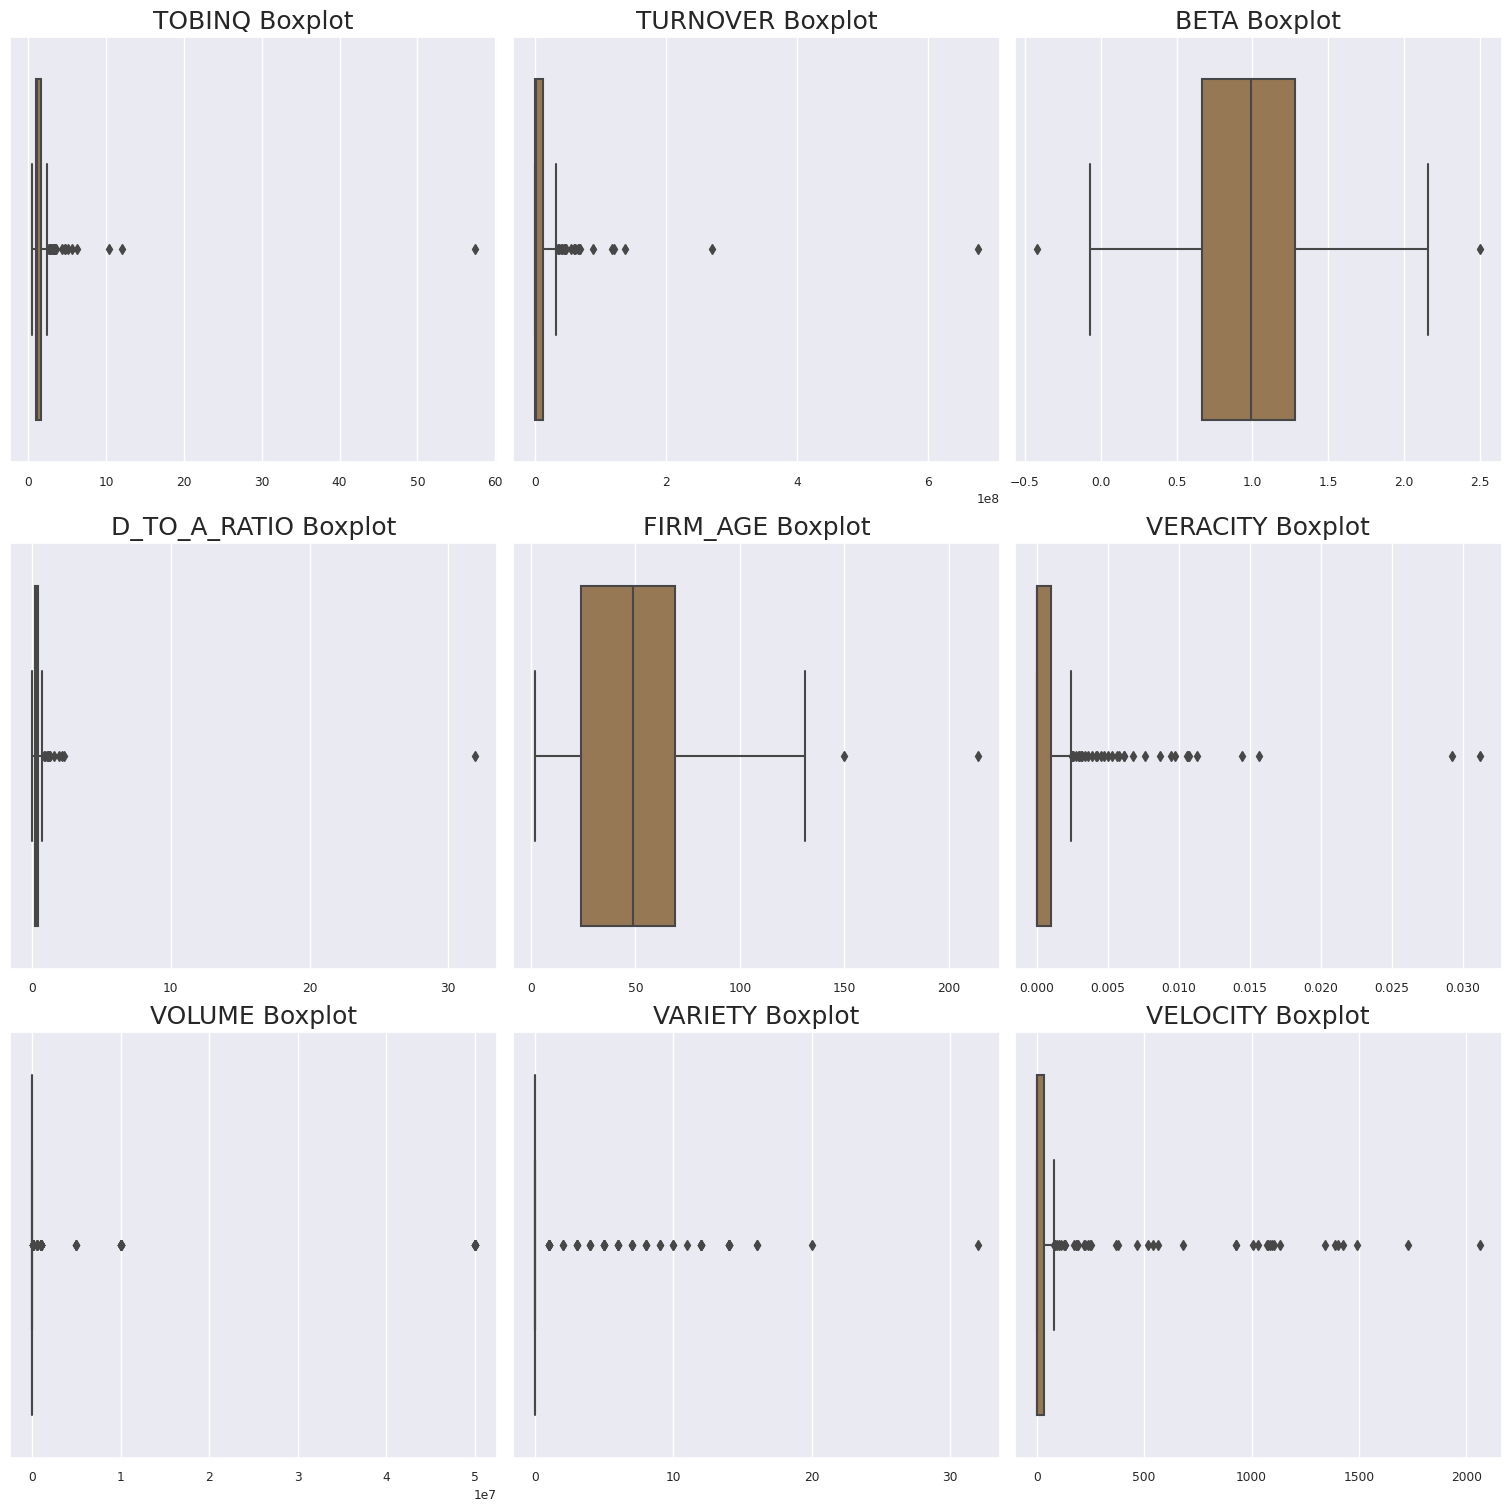

In [56]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(3,3, figsize=(15,15), constrained_layout=True)
sns.set(font_scale=1.5)
# iterating from 0 to 8, 9 elements
for variable in range(0,9):
  variable_name = list_of_variables_to_generate_boxplot[variable]
  axes_row = axes_list[variable][0]
  axes_column = axes_list[variable][1]
  sns.boxplot(ax = axes[axes_row,axes_column], data=df_scenario2, x=variable_name, palette="cubehelix")
  axes[axes_row,axes_column].set_title("{} Boxplot".format(variable_name), loc='center')
  axes[axes_row,axes_column].set(ylabel=None)
  axes[axes_row,axes_column].set(xlabel=None)

#plt.suptitle("\n\nScenario 2: All variables, no treatment, before outlier removal\n\n\n\n\n", fontweight='bold')
plt.savefig('Scenario 2_before outlier removal.png'
            #, transparent=True
            )

In [57]:
# Now we will remove the outliers for each column listed in "columns_to_remove_outliers" list
columns_to_remove_outliers = ['TOBINQ',
                              'TURNOVER',
                              'BETA',
                              'D_TO_A_RATIO',
                              'FIRM_AGE']

df_for_outlier_removal = df_scenario2.copy()
for column in columns_to_remove_outliers:
  df_for_outlier_removal = identify_outliers(df_for_outlier_removal, column).copy()

df_scenario2_final = df_for_outlier_removal.copy()

In [58]:
df_scenario2_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TICKER                184 non-null    object 
 1   NAME                  184 non-null    object 
 2   IS_IBOV_BOOL          184 non-null    int64  
 3   TRBC_ECONOMIC_SECTOR  184 non-null    object 
 4   HAS_APP_BOOL          184 non-null    int64  
 5   TOBINQ                184 non-null    float64
 6   TOBINQ_NL             184 non-null    float64
 7   TURNOVER              184 non-null    float64
 8   BETA                  184 non-null    float64
 9   D_TO_A_RATIO          184 non-null    float64
 10  FIRM_AGE              184 non-null    float64
 11  VERACITY              184 non-null    float64
 12  VOLUME                184 non-null    int64  
 13  VARIETY               184 non-null    int64  
 14  VELOCITY              184 non-null    float64
dtypes: float64(8), int64(4)

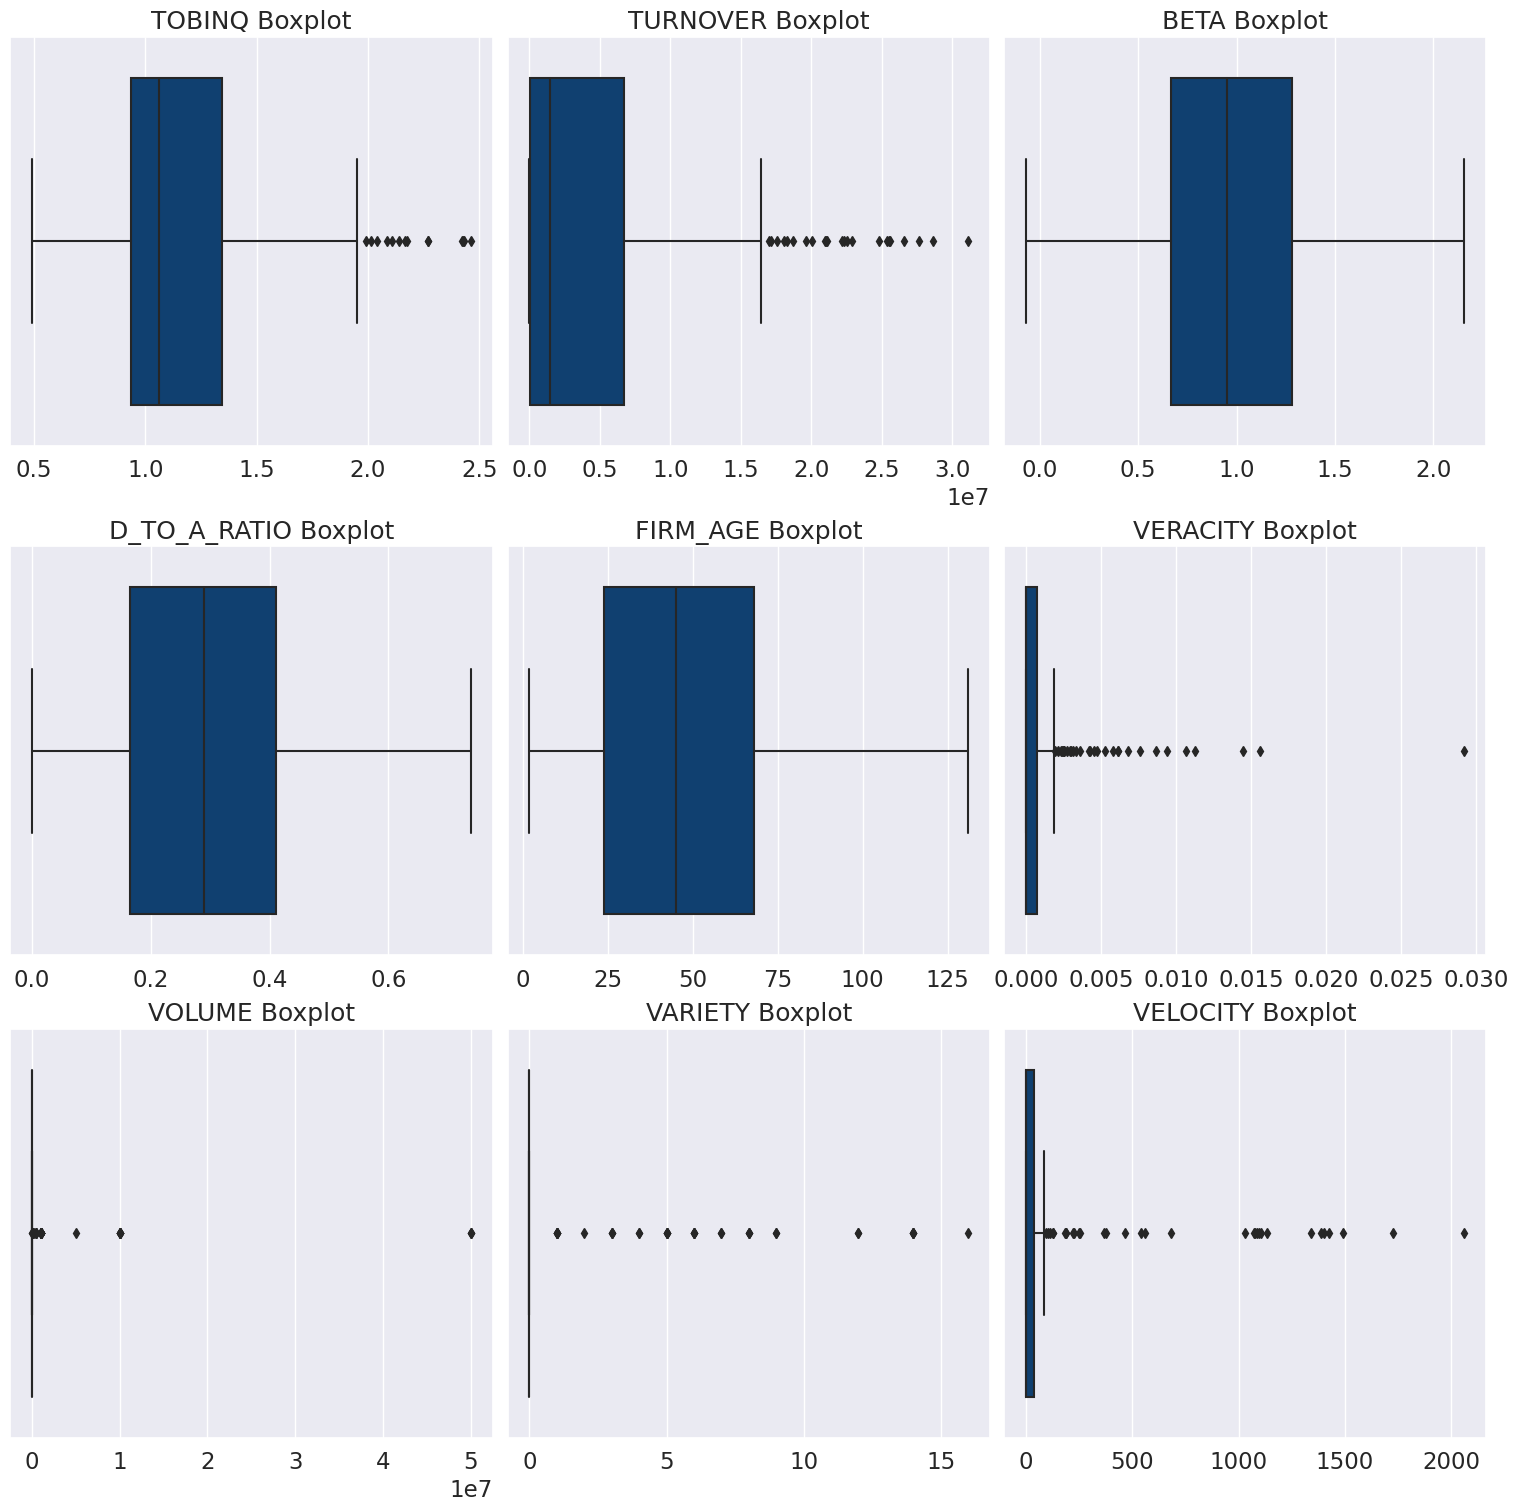

In [59]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(3,3, figsize=(15,15), constrained_layout=True)
sns.set(font_scale=1.5)
# iterating from 0 to 8, 9 elements
for variable in range(0,9):
  variable_name = list_of_variables_to_generate_boxplot[variable]
  axes_row = axes_list[variable][0]
  axes_column = axes_list[variable][1]
  sns.boxplot(ax = axes[axes_row,axes_column], data=df_scenario2_final, x=variable_name, palette='ocean')
  axes[axes_row,axes_column].set_title("{} Boxplot".format(variable_name), loc='center')
  axes[axes_row,axes_column].set(ylabel=None)
  axes[axes_row,axes_column].set(xlabel=None)

#plt.suptitle("\n\nScenario 2: All variables, no treatment, after outlier removal (DV's + Control Variables) \n\n\n\n\n", fontweight='bold')
plt.savefig('Scenario 2_after outlier removal.png'
            #, transparent=True
            )

In [60]:
# exporting variables boxplot side by side, before and after treatment
export_images_side_by_side(["/content/Scenario 2_before outlier removal.png",
                              "/content/Scenario 2_after outlier removal.png"],
                              "Scenario 2 outliers removal results"
                              )

In [61]:
print("For the Scenario 2, variables without any transformation, but after outliers removal I started with {} observations and ended up with {}.".format(
    str(df_scenario2.shape[0]),
    str(df_scenario2_final.shape[0])
))

For the Scenario 2, variables without any transformation, but after outliers removal I started with 234 observations and ended up with 184.


In [62]:
pd.crosstab(df_scenario2_final.TRBC_ECONOMIC_SECTOR, df_scenario2_final.HAS_APP_BOOL,
            margins=True).reset_index(drop=False)

HAS_APP_BOOL             TRBC_ECONOMIC_SECTOR    0   1  All
0             Academic & Educational Services    2   3    5
1                             Basic Materials   11   6   17
2                          Consumer Cyclicals   25   6   31
3                      Consumer Non-Cyclicals    9   9   18
4                                      Energy    3   2    5
5                                  Financials    6  13   19
6                                  Healthcare    5   1    6
7                                 Industrials   19   9   28
8                                 Real Estate   11  10   21
9                                  Technology    5   4    9
10                                  Utilities   12  13   25
11                                        All  108  76  184

In [63]:
pd.crosstab(df_scenario2_final.TRBC_ECONOMIC_SECTOR, df_scenario2_final.HAS_APP_BOOL,
            margins=True).reset_index(drop=False).to_excel("scenario2_after_outliers_removal.xlsx", index=False)

In [64]:
pd.crosstab(df_scenario2_final.TRBC_ECONOMIC_SECTOR, df_scenario2_final.HAS_APP_BOOL,
            margins=True,
            normalize=True).reset_index(drop=False)

HAS_APP_BOOL             TRBC_ECONOMIC_SECTOR         0         1       All
0             Academic & Educational Services  0.010870  0.016304  0.027174
1                             Basic Materials  0.059783  0.032609  0.092391
2                          Consumer Cyclicals  0.135870  0.032609  0.168478
3                      Consumer Non-Cyclicals  0.048913  0.048913  0.097826
4                                      Energy  0.016304  0.010870  0.027174
5                                  Financials  0.032609  0.070652  0.103261
6                                  Healthcare  0.027174  0.005435  0.032609
7                                 Industrials  0.103261  0.048913  0.152174
8                                 Real Estate  0.059783  0.054348  0.114130
9                                  Technology  0.027174  0.021739  0.048913
10                                  Utilities  0.065217  0.070652  0.135870
11                                        All  0.586957  0.413043  1.000000

In [65]:
pd.crosstab(df_scenario2_final.TRBC_ECONOMIC_SECTOR, df_scenario2_final.HAS_APP_BOOL,
            margins=True,
            normalize=True).reset_index(drop=False).to_excel("scenario2_after_outliers_removal_with_margins.xlsx", index=False)

For the scenario 2 dataframe I ended up with 184 observations, where 76 companies or 41% has an app in Play Store. I do not removed outliers from the Independent Variables because if I do, they will became 0 for every observation.

### Scenario 3: Scenario 2 + Independent Variables with only natural log in terms of transformation (deal with skewed right tail distribution)

In [66]:
df_scenario3 = df_scenario2_final.copy()

In [67]:
df_scenario3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 233
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TICKER                184 non-null    object 
 1   NAME                  184 non-null    object 
 2   IS_IBOV_BOOL          184 non-null    int64  
 3   TRBC_ECONOMIC_SECTOR  184 non-null    object 
 4   HAS_APP_BOOL          184 non-null    int64  
 5   TOBINQ                184 non-null    float64
 6   TOBINQ_NL             184 non-null    float64
 7   TURNOVER              184 non-null    float64
 8   BETA                  184 non-null    float64
 9   D_TO_A_RATIO          184 non-null    float64
 10  FIRM_AGE              184 non-null    float64
 11  VERACITY              184 non-null    float64
 12  VOLUME                184 non-null    int64  
 13  VARIETY               184 non-null    int64  
 14  VELOCITY              184 non-null    float64
dtypes: float64(8), int64(4)

In [68]:
df_scenario3['VOLUME_NL'] = np.where(  (df_scenario3['VOLUME']!=0) == True,
                                    np.log(df_scenario3['VOLUME']),
                                    0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [69]:
df_scenario3['VERACITY_NL'] = np.where(  (df_scenario3['VERACITY']!=0) == True,
                                    np.log(df_scenario3['VERACITY']),
                                    0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [70]:
df_scenario3['VARIETY_NL'] = np.where(  (df_scenario3['VARIETY']!=0) == True,
                                    np.log(df_scenario3['VARIETY']),
                                    0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [71]:
df_scenario3['VELOCITY_NL'] = np.where(  (df_scenario3['VELOCITY']!=0) == True,
                                    np.log(df_scenario3['VELOCITY']),
                                    0)

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [72]:
df_scenario3.describe()

IS_IBOV_BOOL  HAS_APP_BOOL      TOBINQ   TOBINQ_NL      TURNOVER  \
count    184.000000    184.000000  184.000000  184.000000  1.840000e+02   
mean       0.239130      0.413043    1.191405    0.124692  5.145345e+06   
std        0.427716      0.493724    0.405233    0.310984  7.705517e+06   
min        0.000000      0.000000    0.491326   -0.710648  8.702232e+01   
25%        0.000000      0.000000    0.936331   -0.065787  1.483125e+04   
50%        0.000000      0.000000    1.061328    0.059521  1.490132e+06   
75%        0.000000      1.000000    1.345183    0.296529  6.723256e+06   
max        1.000000      1.000000    2.461621    0.900820  3.111149e+07   

             BETA  D_TO_A_RATIO    FIRM_AGE    VERACITY        VOLUME  \
count  184.000000    184.000000  184.000000  184.000000  1.840000e+02   
mean     0.988930      0.285146   48.005435    0.001208  1.319337e+06   
std      0.468864      0.174458   27.833521    0.003220  6.578977e+06   
min     -0.072211      0.000000    2.000000    0.000000  0.000000e+00   
25%      0.666995      0.165016   24.000000    0.000000  0.000000e+00   
50%      0.949534      0.289900   45.000000    0.000000  0.000000e+00   
75%      1.282311      0.410009   68.000000    0.000778  1.000000e+04   
max      2.159436      0.738203  131.000000    0.029221  5.000000e+07   

          VARIETY     VELOCITY   VOLUME_NL  VERACITY_NL  VARIETY_NL  \
count  184.000000   184.000000  184.000000   184.000000  184.000000   
mean     1.228261   135.106691    4.345884    -2.524665    0.297821   
std      3.171262   362.940073    5.785879     3.298263    0.722450   
min      0.000000     0.000000    0.000000   -10.819778    0.000000   
25%      0.000000     0.000000    0.000000    -5.989971    0.000000   
50%      0.000000     0.000000    0.000000     0.000000    0.000000   
75%      0.000000    37.100599    9.210340     0.000000    0.000000   
max     16.000000  2060.977755   17.727534     0.000000    2.772589   

       VELOCITY_NL  
count   184.000000  
mean      1.797403  
std       2.464494  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       3.613224  
max       7.630936

In [73]:
df_scenario3.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL'],
      dtype='object')

In [74]:
list_of_variables_to_generate_boxplot = [
    'TOBINQ_NL', 'TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE',
    'VERACITY_NL','VOLUME_NL','VARIETY_NL','VELOCITY_NL'
]

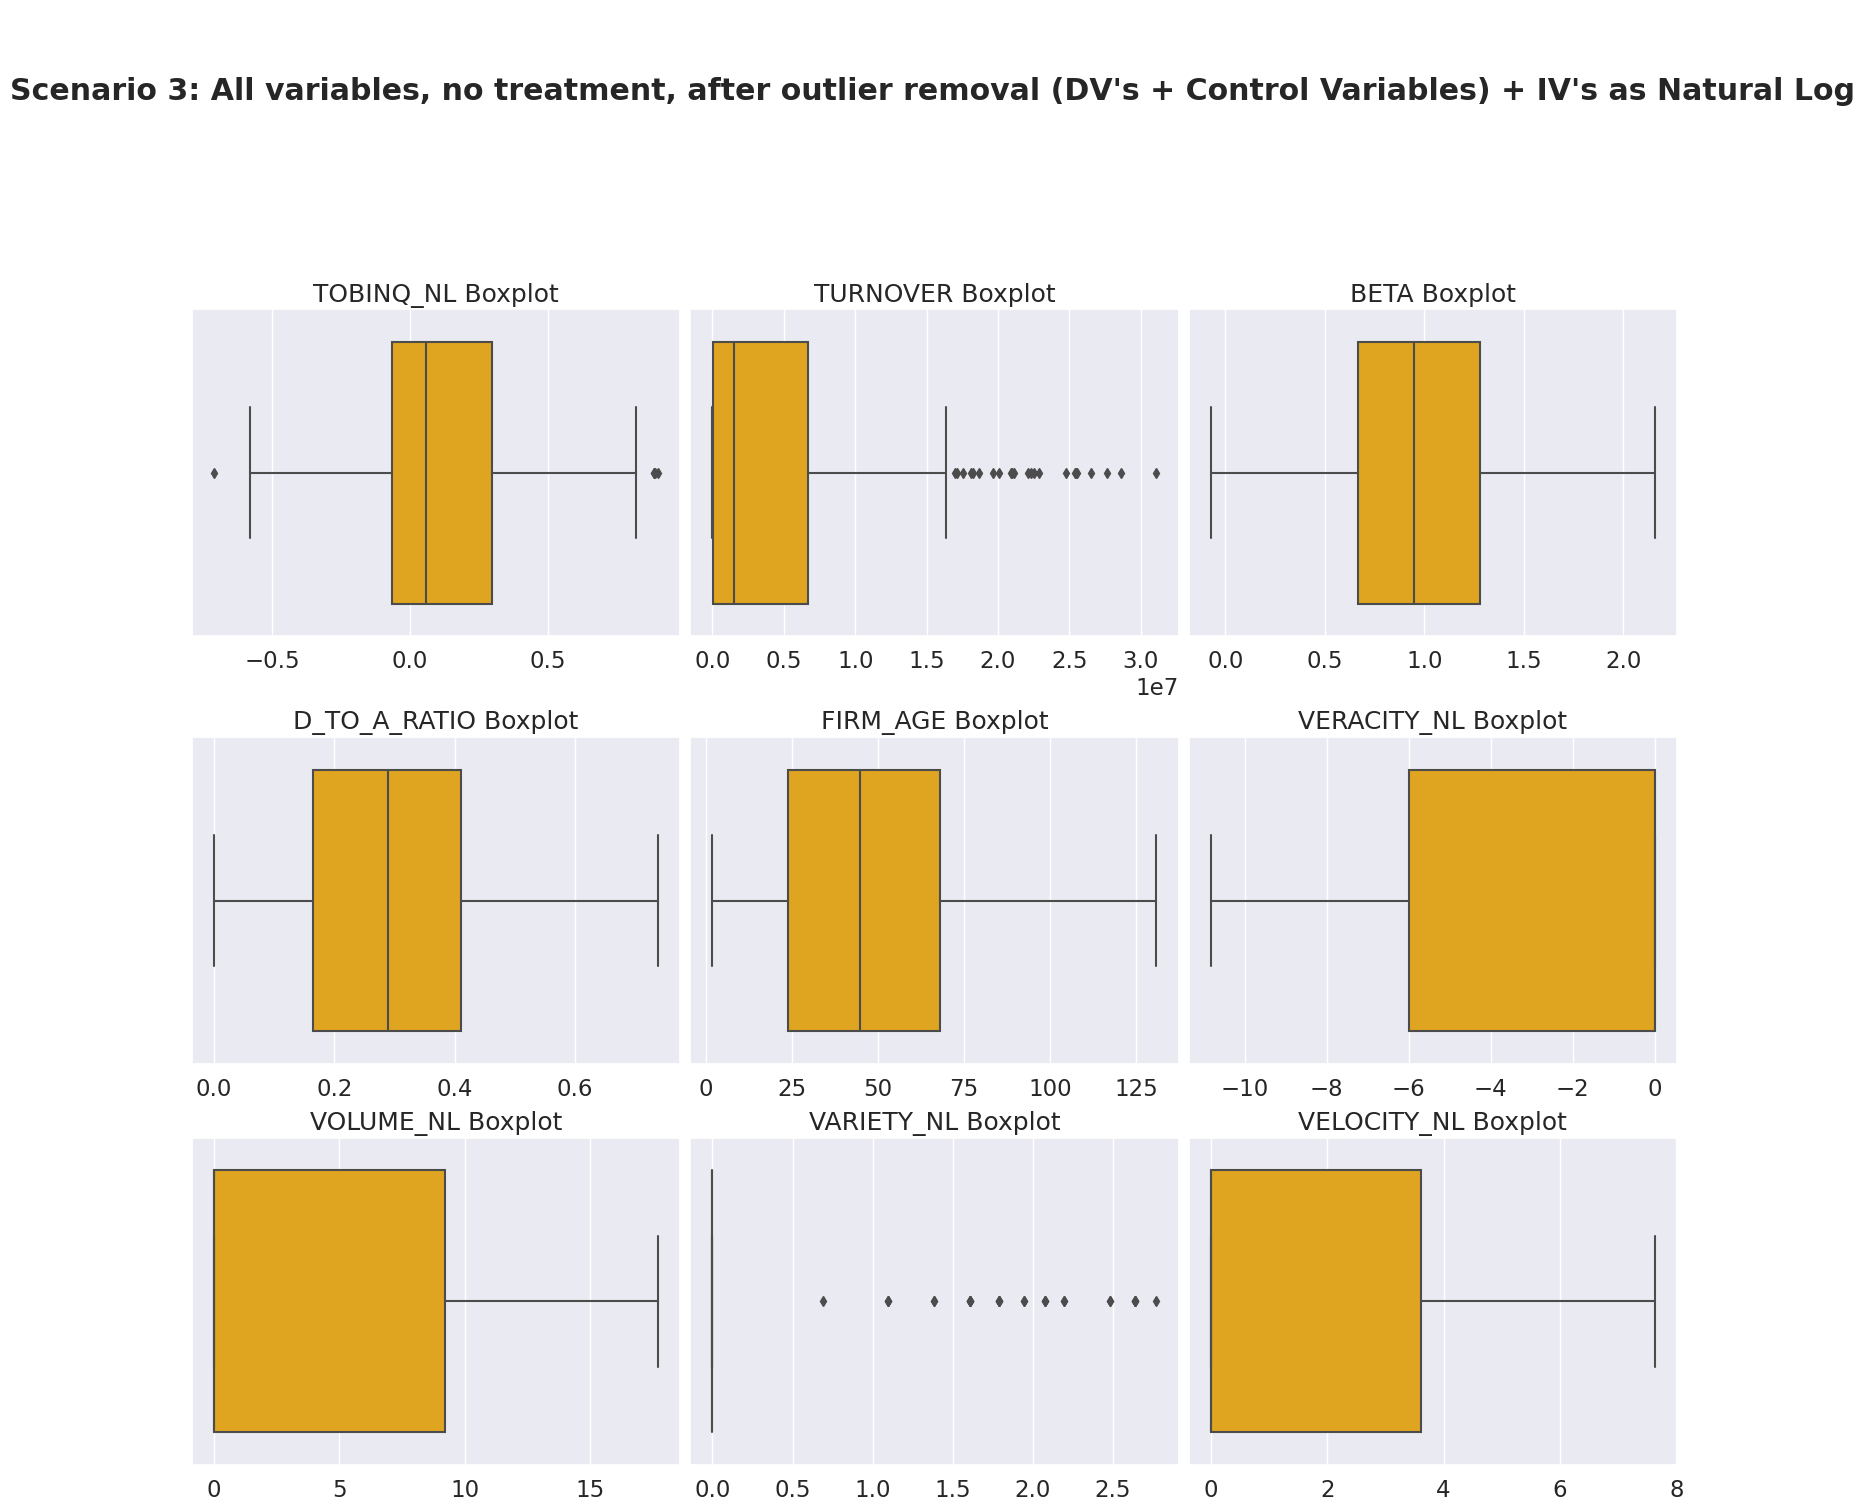

In [75]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(3,3, figsize=(15,15), constrained_layout=True)

# iterating from 0 to 8, 9 elements
for variable in range(0,9):
  variable_name = list_of_variables_to_generate_boxplot[variable]
  axes_row = axes_list[variable][0]
  axes_column = axes_list[variable][1]
  sns.boxplot(ax = axes[axes_row,axes_column], data=df_scenario3, x=variable_name, palette='prism_r')
  axes[axes_row,axes_column].set_title("{} Boxplot".format(variable_name), loc='center')
  axes[axes_row,axes_column].set(ylabel=None)
  axes[axes_row,axes_column].set(xlabel=None)

plt.suptitle("\n\nScenario 3: All variables, no treatment, after outlier removal (DV's + Control Variables) + IV's as Natural Log \n\n\n\n\n", fontweight='bold')
plt.savefig('Scenario 3_after IV natural log transformation.png'
            #, transparent=True
            )

#### Variety boxplot shows a lot of outliers, let's change the way we are considering this variable into the model...

Variety Big Data proxy is measured by the different sources of data collected by companies while the costumer is using the app. GPS, access to e-mails, access to pictures, etc...<br><br>

It happens that, with the GDPL advances here in Brazil, companies opted to not collected a huge amount of different types of data. And in some cases, the company has an app but do not inform in details the different types of data they are collecting from the customer.<br><br>

With this in mind, and to avoid not considering VARIETY as a Big Data Proxy, I will convert this continous variable into a boolean variable. And it will function like the example below:<br>


*   0 - company do not inform or do not store data from users
*   1 - company collects more than 1 type of data and informed details about this



In [76]:
df_scenario3['VARIETY_BOOL'] = np.where(
                                          (df_scenario3['VARIETY']!=0)==True,
                                          1,
                                          0
                                    )

In [77]:
df_scenario3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 184 entries, 0 to 233
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TICKER                184 non-null    object 
 1   NAME                  184 non-null    object 
 2   IS_IBOV_BOOL          184 non-null    int64  
 3   TRBC_ECONOMIC_SECTOR  184 non-null    object 
 4   HAS_APP_BOOL          184 non-null    int64  
 5   TOBINQ                184 non-null    float64
 6   TOBINQ_NL             184 non-null    float64
 7   TURNOVER              184 non-null    float64
 8   BETA                  184 non-null    float64
 9   D_TO_A_RATIO          184 non-null    float64
 10  FIRM_AGE              184 non-null    float64
 11  VERACITY              184 non-null    float64
 12  VOLUME                184 non-null    int64  
 13  VARIETY               184 non-null    int64  
 14  VELOCITY              184 non-null    float64
 15  VOLUME_NL             1

In [78]:
list_of_variables_to_generate_boxplot = [
    'TOBINQ_NL', 'TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE',
    'VERACITY_NL','VOLUME_NL','VARIETY_BOOL','VELOCITY_NL'
]

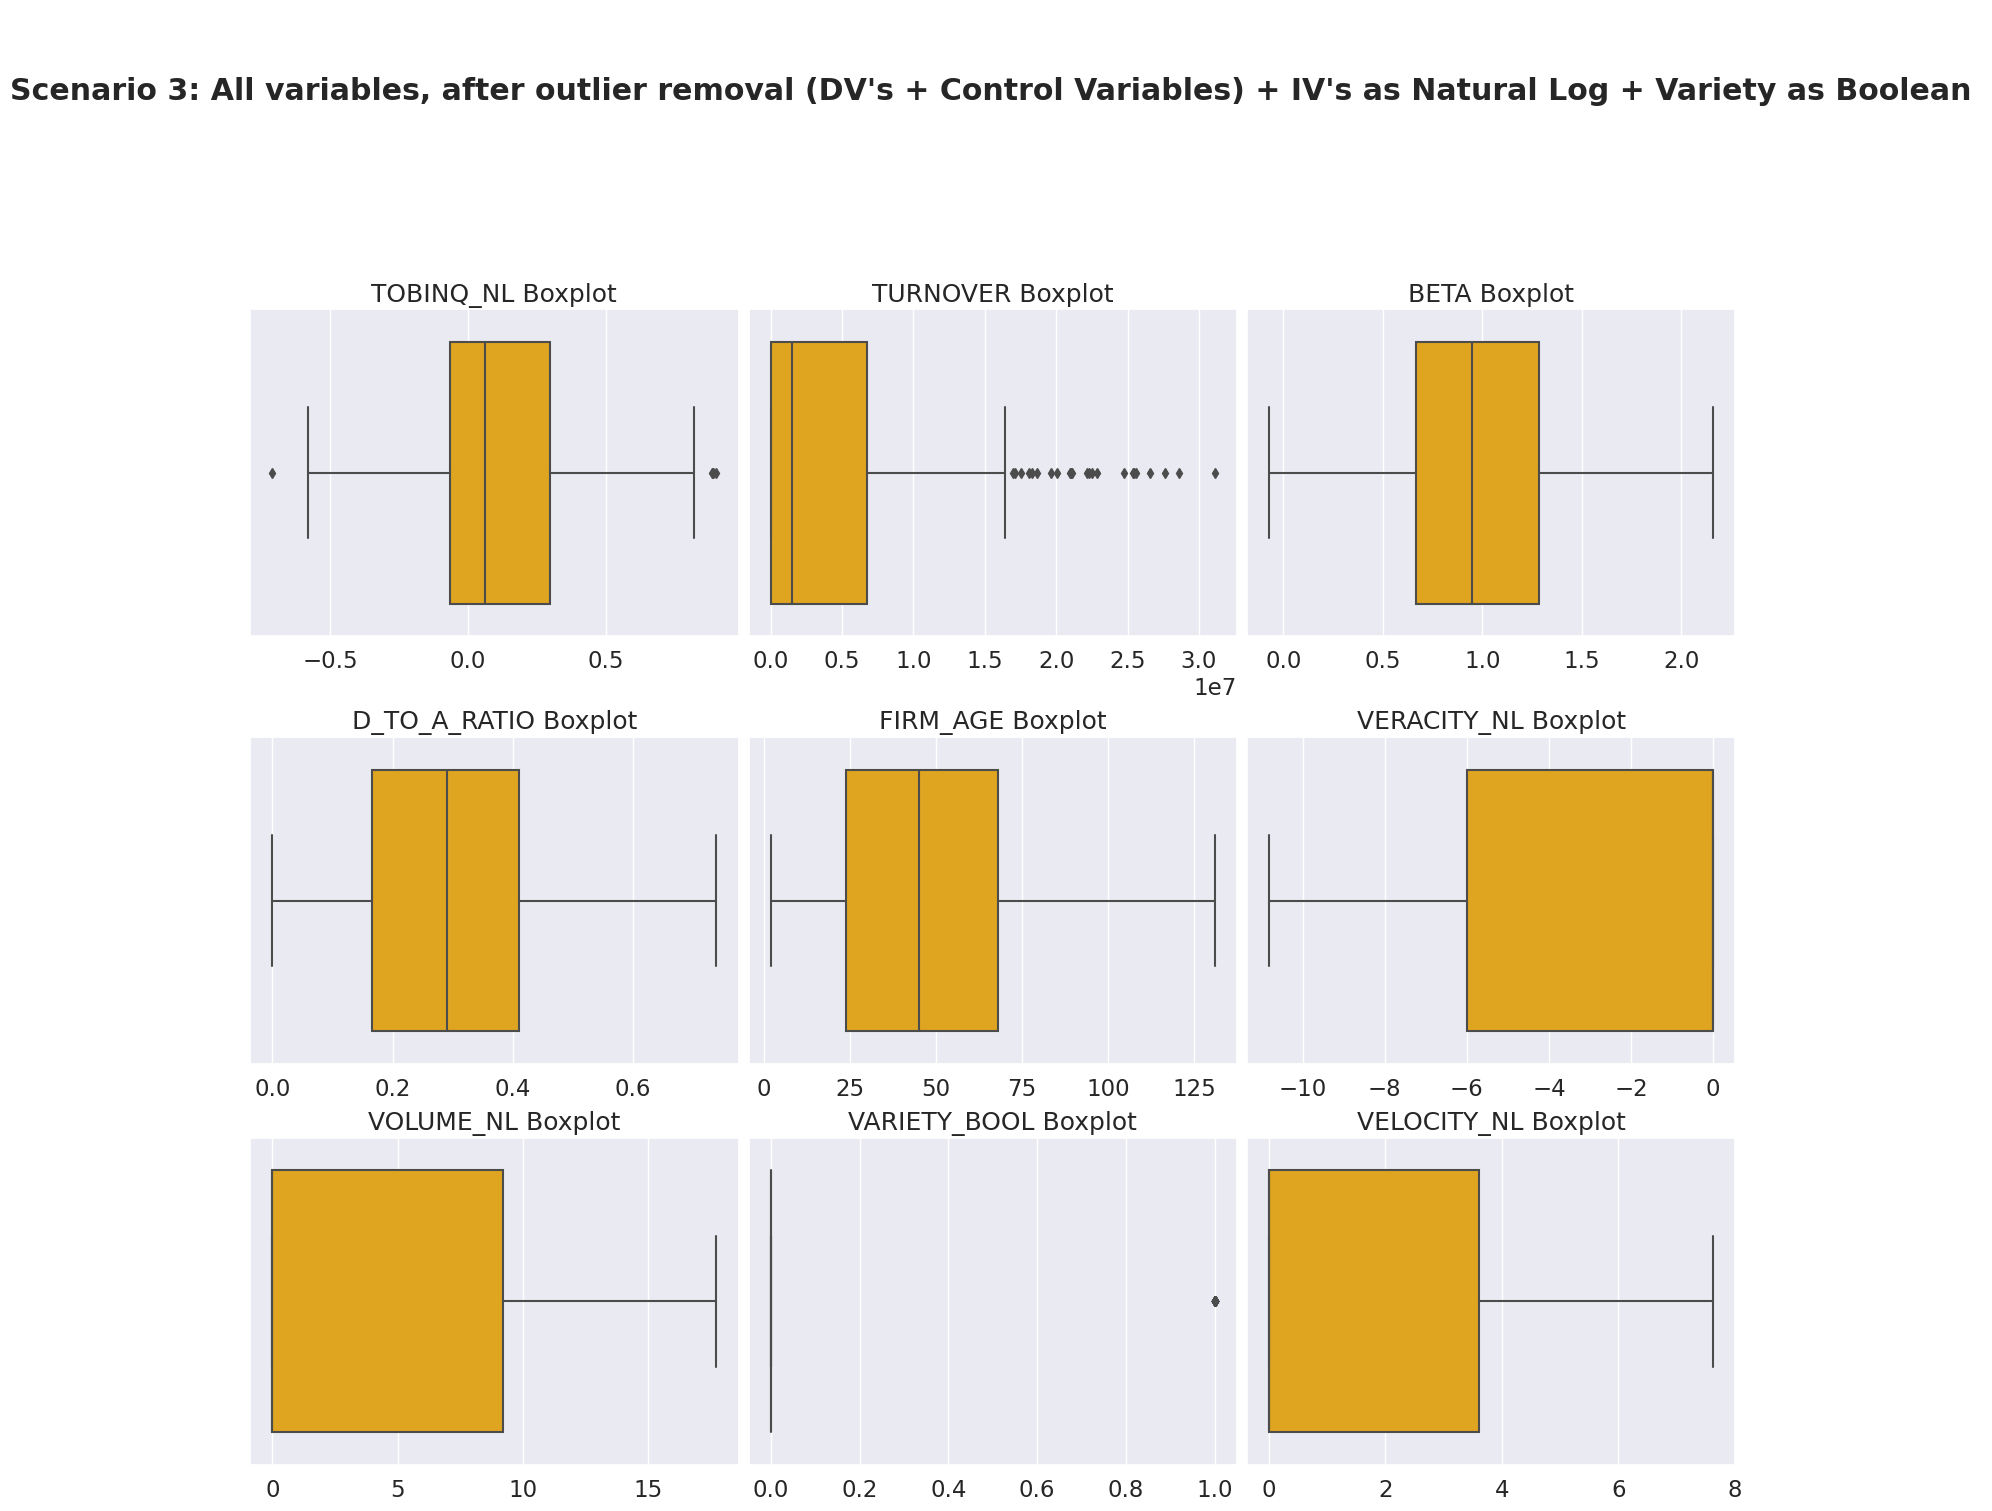

In [79]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(3,3, figsize=(15,15), constrained_layout=True)

# iterating from 0 to 8, 9 elements
for variable in range(0,9):
  variable_name = list_of_variables_to_generate_boxplot[variable]
  axes_row = axes_list[variable][0]
  axes_column = axes_list[variable][1]
  sns.boxplot(ax = axes[axes_row,axes_column], data=df_scenario3, x=variable_name, palette='prism_r')
  axes[axes_row,axes_column].set_title("{} Boxplot".format(variable_name), loc='center')
  axes[axes_row,axes_column].set(ylabel=None)
  axes[axes_row,axes_column].set(xlabel=None)

plt.suptitle("\n\nScenario 3: All variables, after outlier removal (DV's + Control Variables) + IV's as Natural Log + Variety as Boolean \n\n\n\n\n", fontweight='bold')
plt.savefig('Scenario 3_after IV natural log transformation.png'
            #, transparent=True
            )

In [80]:
# exporting variables boxplot side by side, before and after treatment
export_images_side_by_side(["/content/Scenario 2_after outlier removal.png",
                              "/content/Scenario 3_after IV natural log transformation.png"],
                              "Scenario 3 outliers removal + IV's log transformation results"
                              )

Ploting the comparison between Scenario 2 and Scenario 3 after the transformations

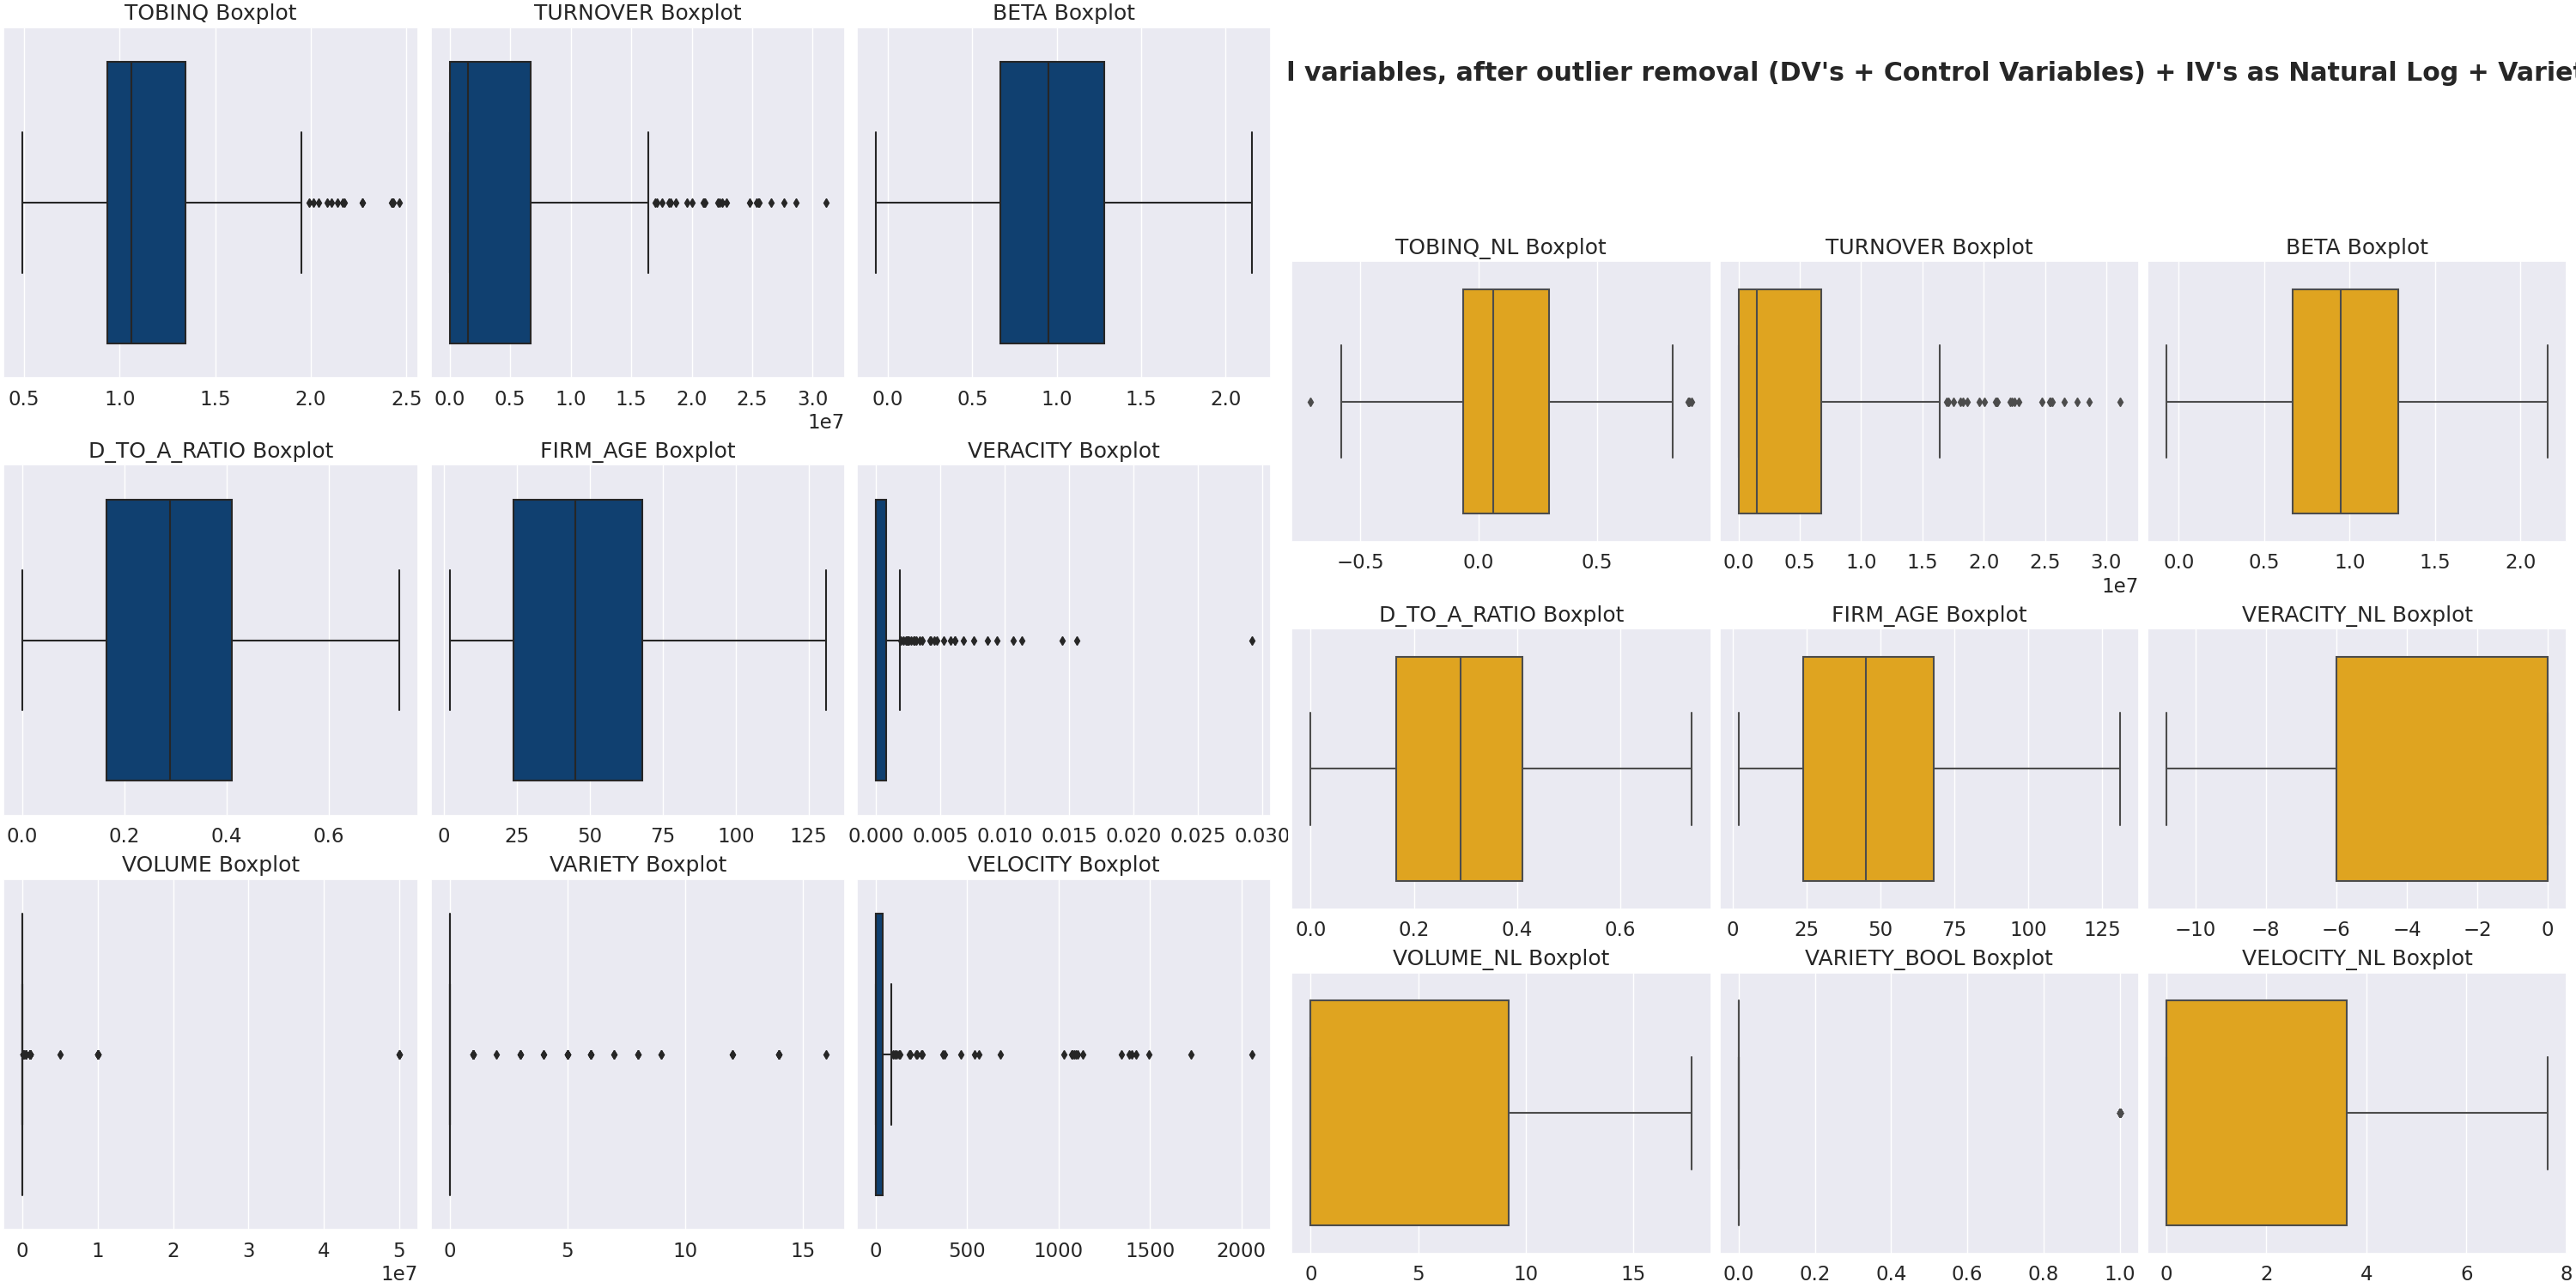

In [81]:
from IPython.display import Image
Image("/content/Scenario 3 outliers removal + IV's log transformation results.png")

### Scenario 4: Scenario 3 + Tobin's Q and Turnover as Natural Log (deal with skewed right tail distribution)

In [82]:
df_scenario4 = df_scenario3.copy()

In [83]:
df_scenario4['TOBINQ_NL'] = np.log(df_scenario4['TOBINQ'])

In [84]:
df_scenario4['TURNOVER_NL'] = np.log(df_scenario4['TURNOVER'])

In [85]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [86]:
list_of_variables_to_generate_boxplot = [
    'TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE',
    'VERACITY_NL','VOLUME_NL','VARIETY_BOOL','VELOCITY_NL'
]

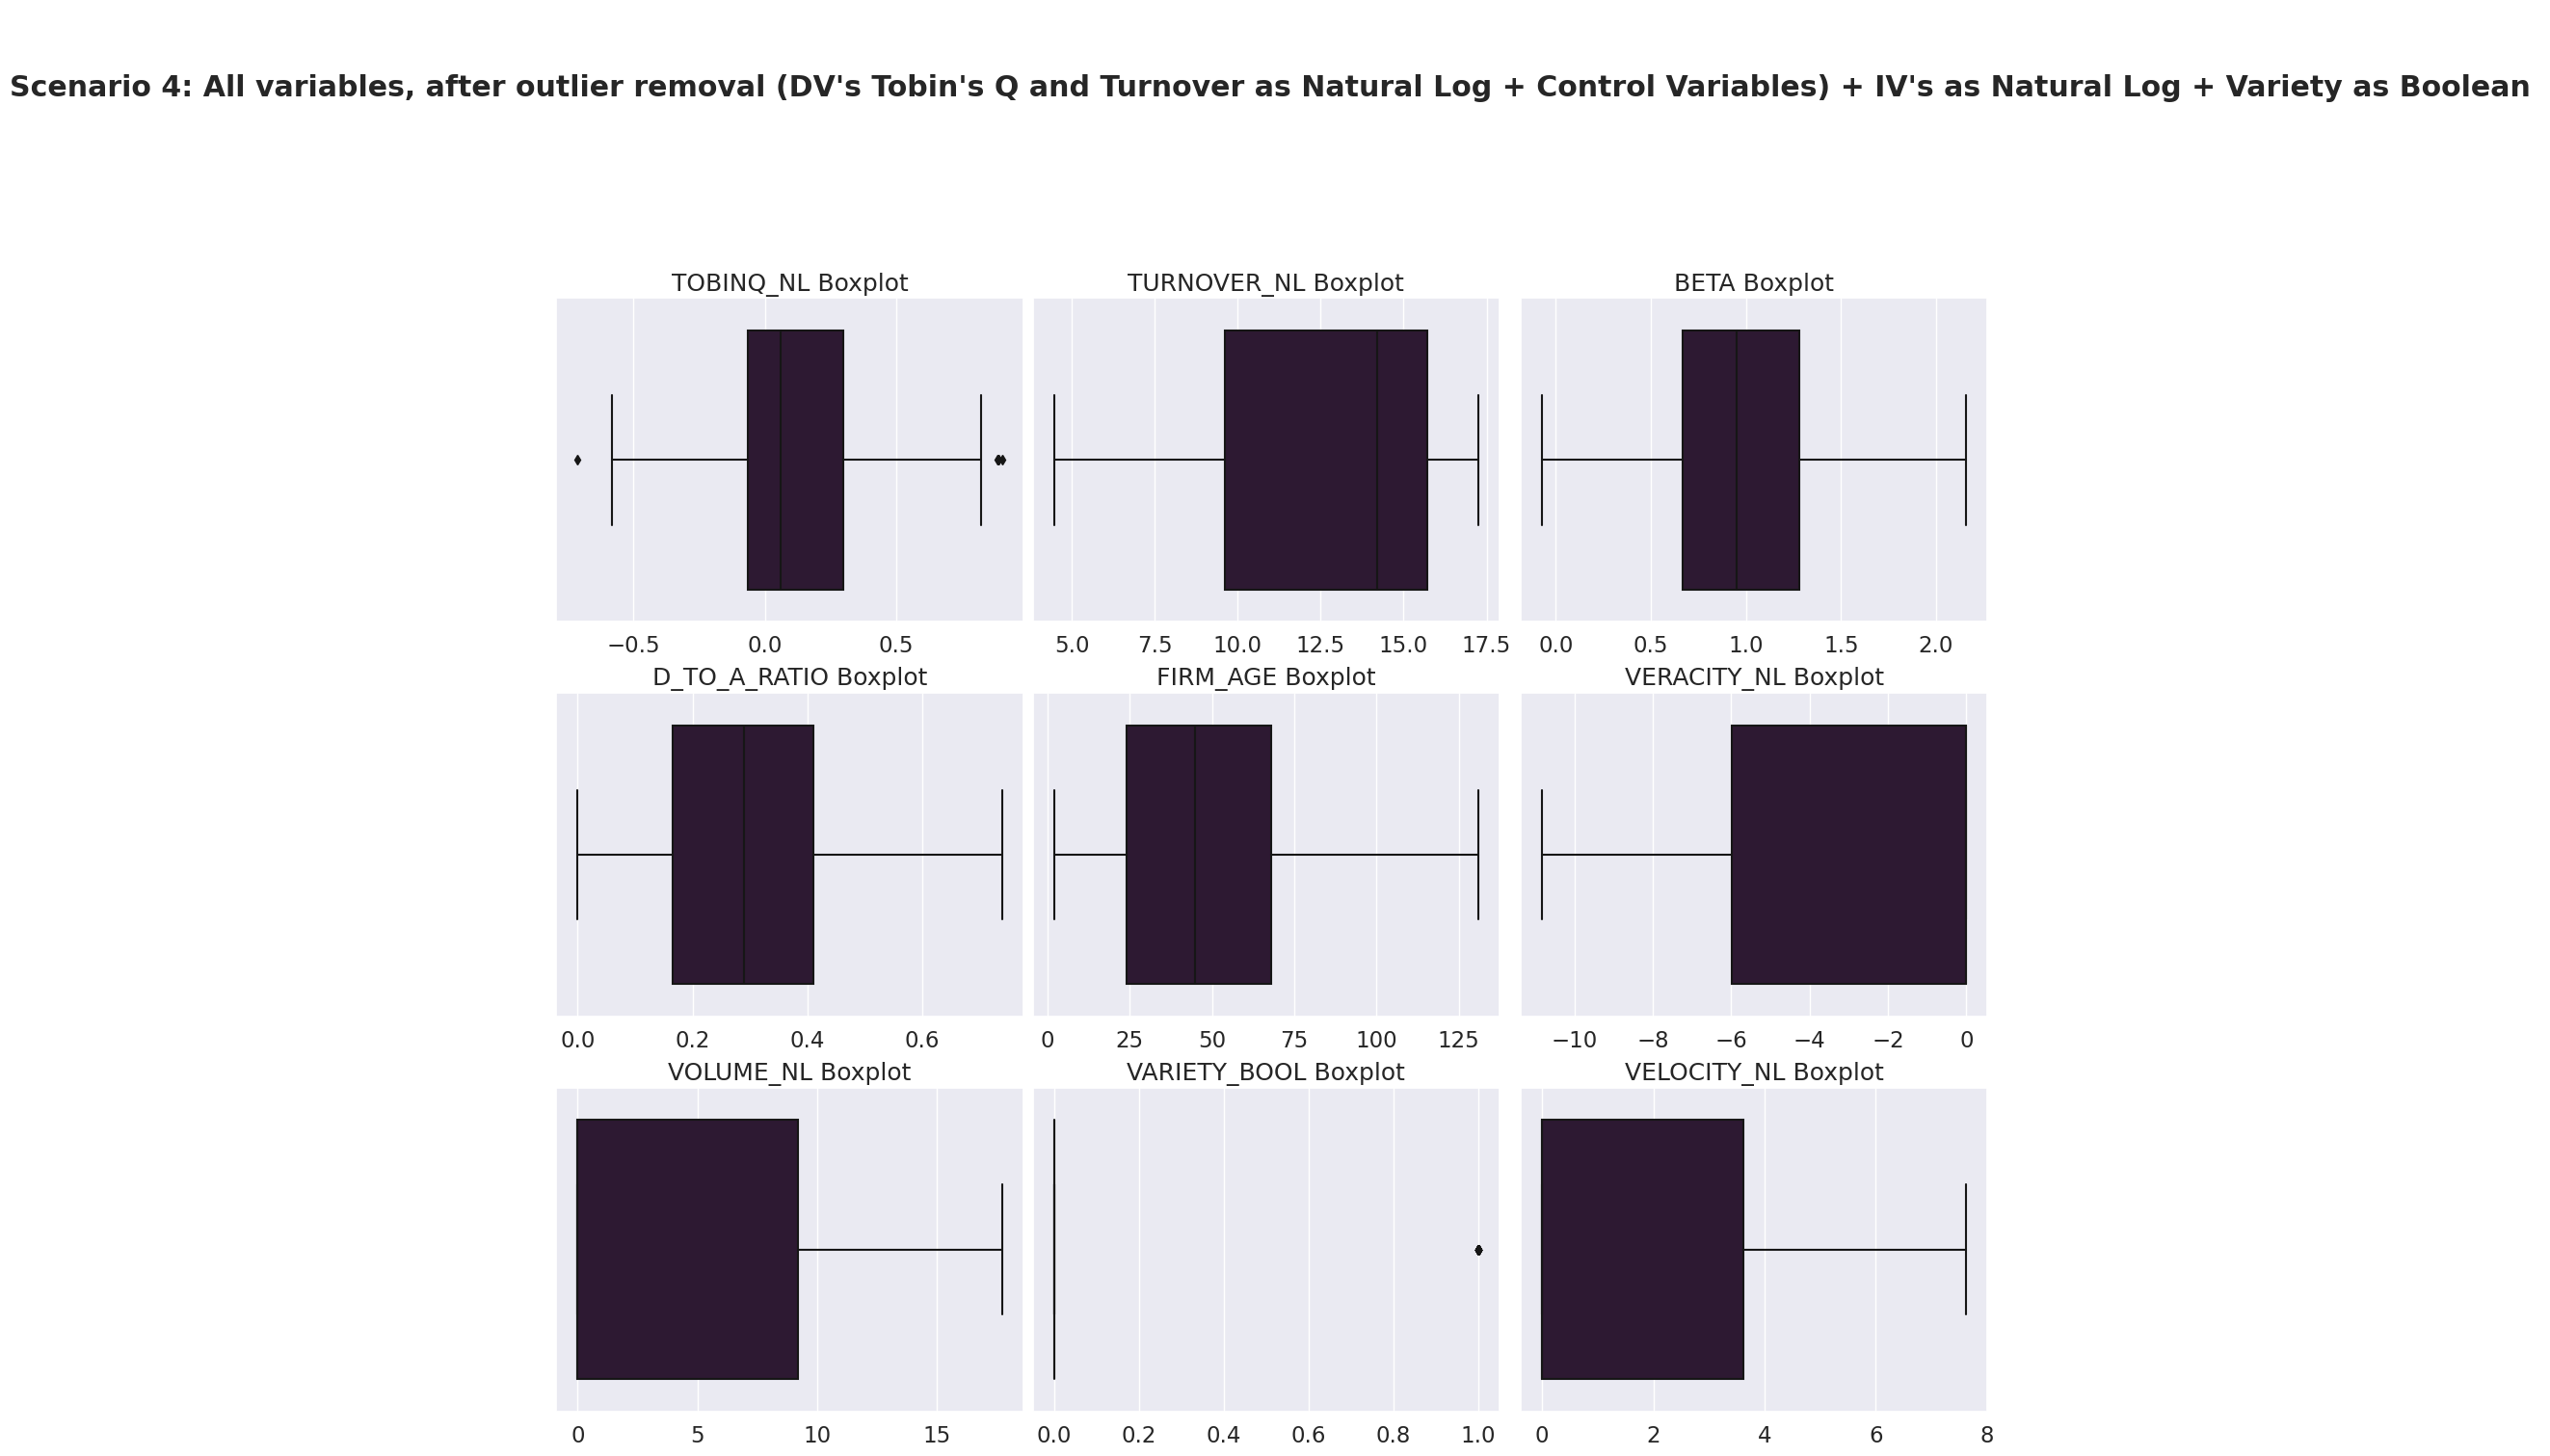

In [87]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(3,3, figsize=(15,15), constrained_layout=True)

# iterating from 0 to 8, 9 elements
for variable in range(0,9):
  variable_name = list_of_variables_to_generate_boxplot[variable]
  axes_row = axes_list[variable][0]
  axes_column = axes_list[variable][1]
  sns.boxplot(ax = axes[axes_row,axes_column], data=df_scenario4, x=variable_name, palette='twilight')
  axes[axes_row,axes_column].set_title("{} Boxplot".format(variable_name), loc='center')
  axes[axes_row,axes_column].set(ylabel=None)
  axes[axes_row,axes_column].set(xlabel=None)

plt.suptitle("\n\nScenario 4: All variables, after outlier removal (DV's Tobin's Q and Turnover as Natural Log + Control Variables) + IV's as Natural Log + Variety as Boolean \n\n\n\n\n", fontweight='bold')
plt.savefig('Scenario 4_after all transformations.png'
            #, transparent=True
            )

In [88]:
# exporting variables boxplot side by side, before and after treatment
export_images_side_by_side(["/content/Scenario 3_after IV natural log transformation.png",
                              "/content/Scenario 4_after all transformations.png"],
                              "Scenario 4 outliers removal + DV's and IV's log transformation results"
                              )

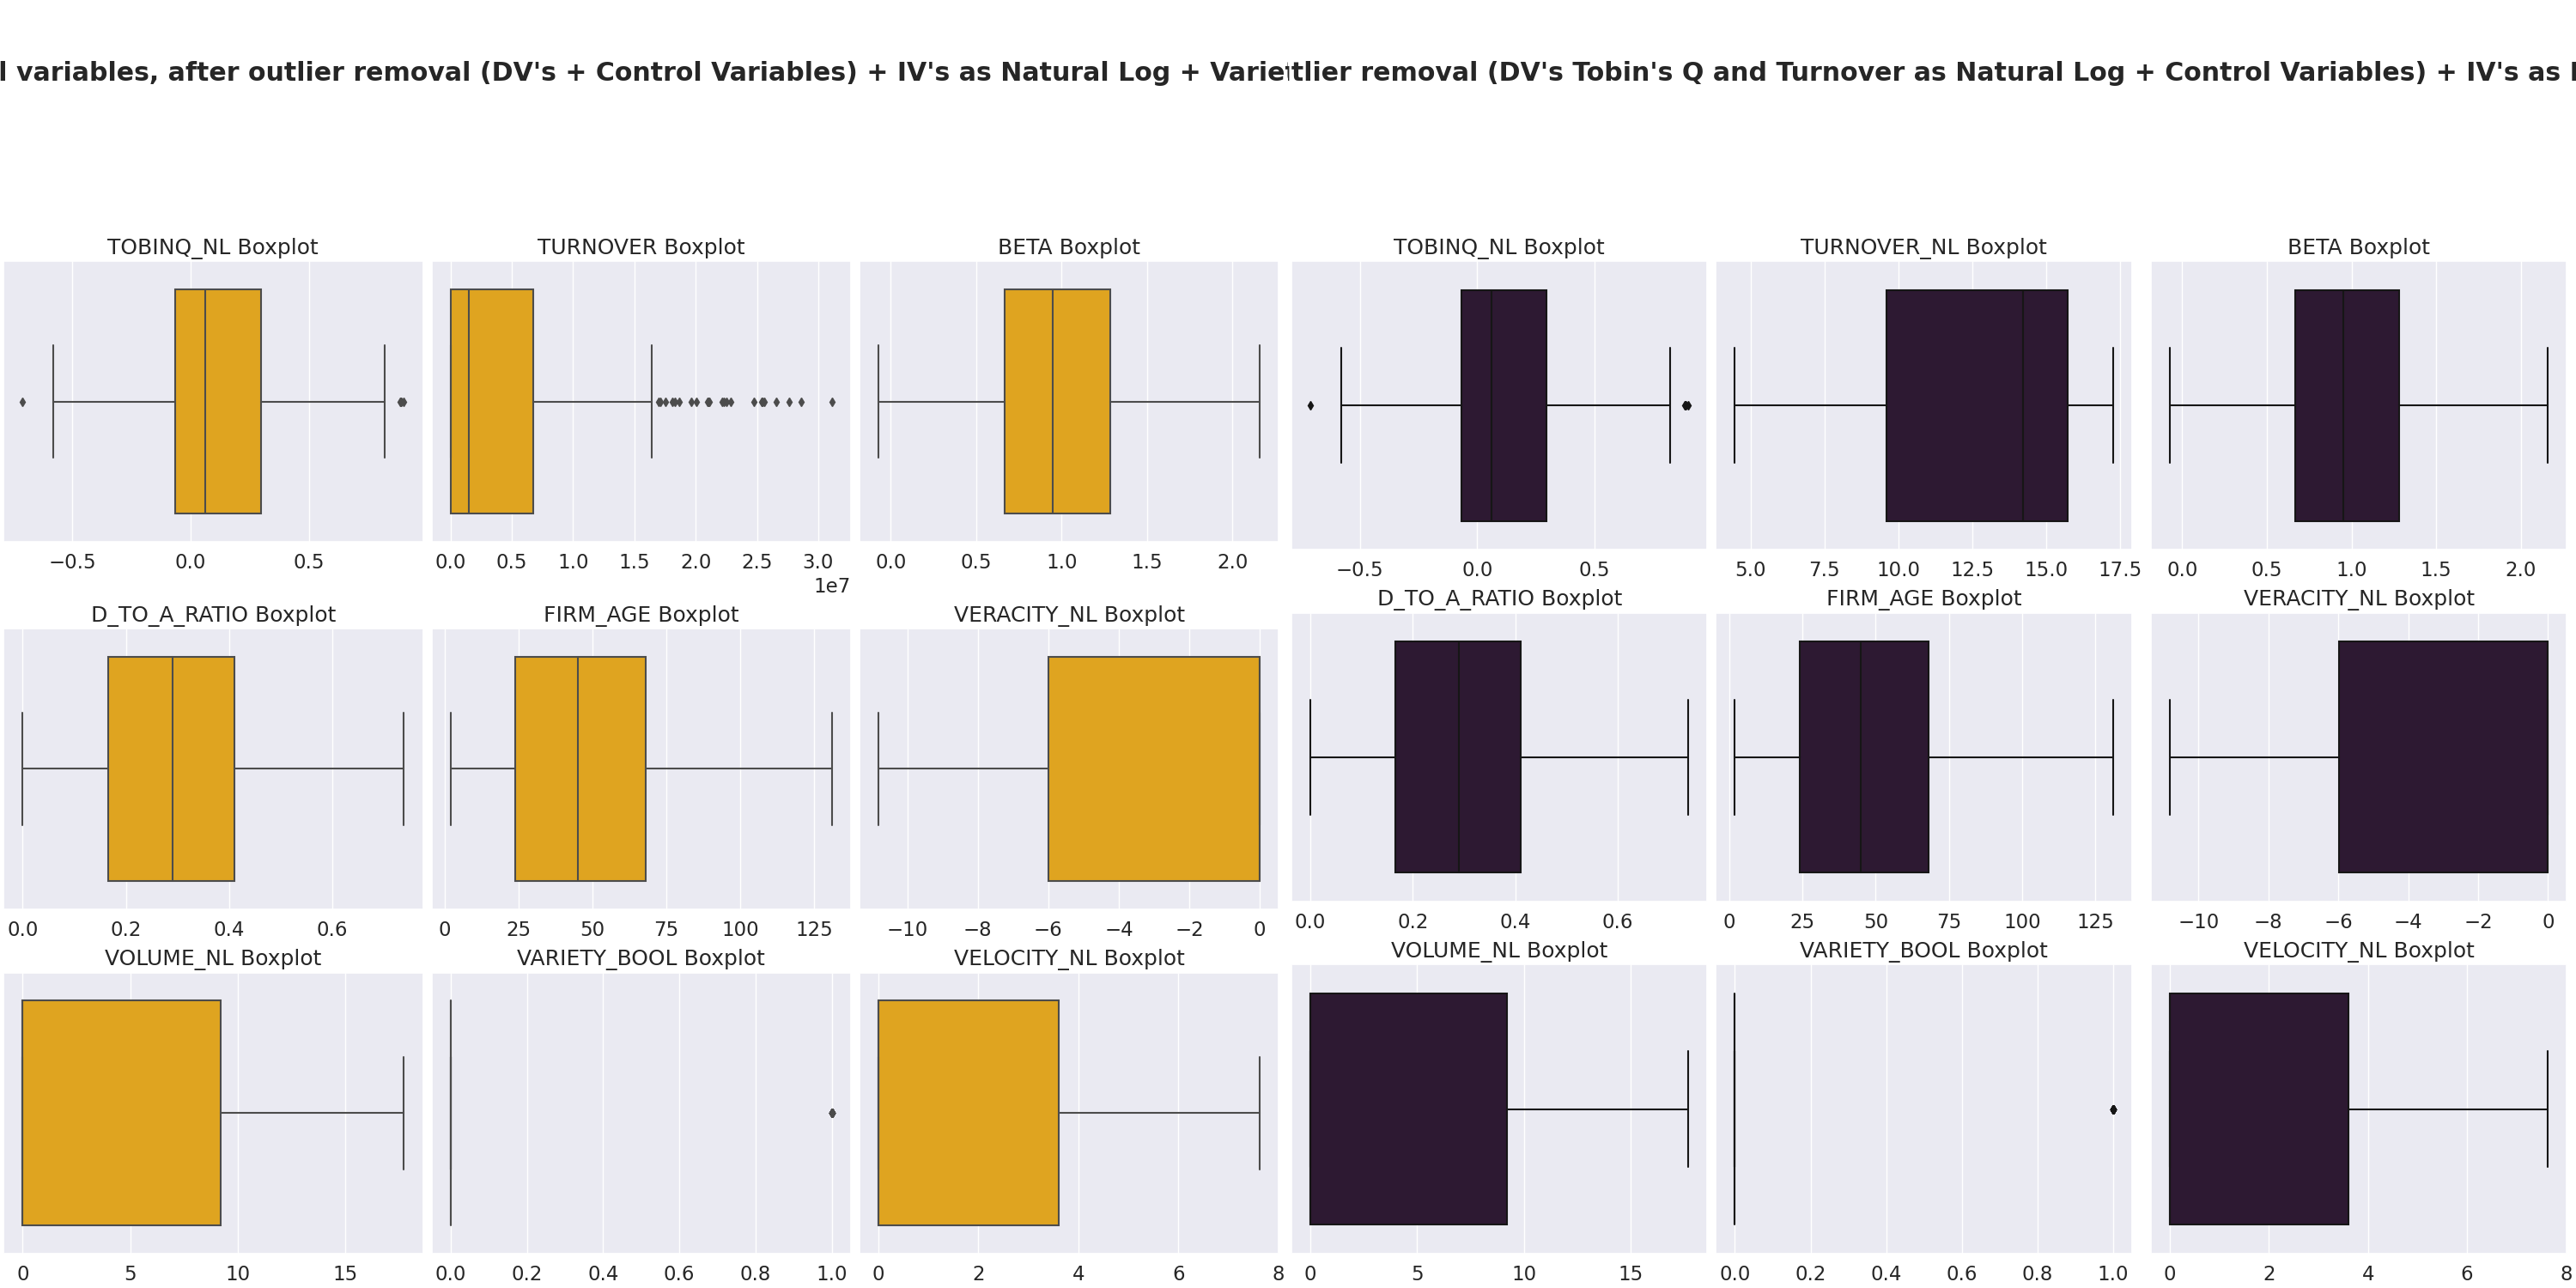

In [89]:
from IPython.display import Image
Image("/content/Scenario 4 outliers removal + DV's and IV's log transformation results.png")

## Actually running the scenarios

### Scenario 1

In [90]:
df_scenario1.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY',
       'VELOCITY'],
      dtype='object')

In [91]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario1,
             all_variables_in_the_model = ['TOBINQ', 'TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY'],
             dependent_variable = "TOBINQ",
             independent_variables = ['TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY'],
             scenario_specification = "SCENARIO 1"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


#### Plotting the OLS vs. RLM models comparison

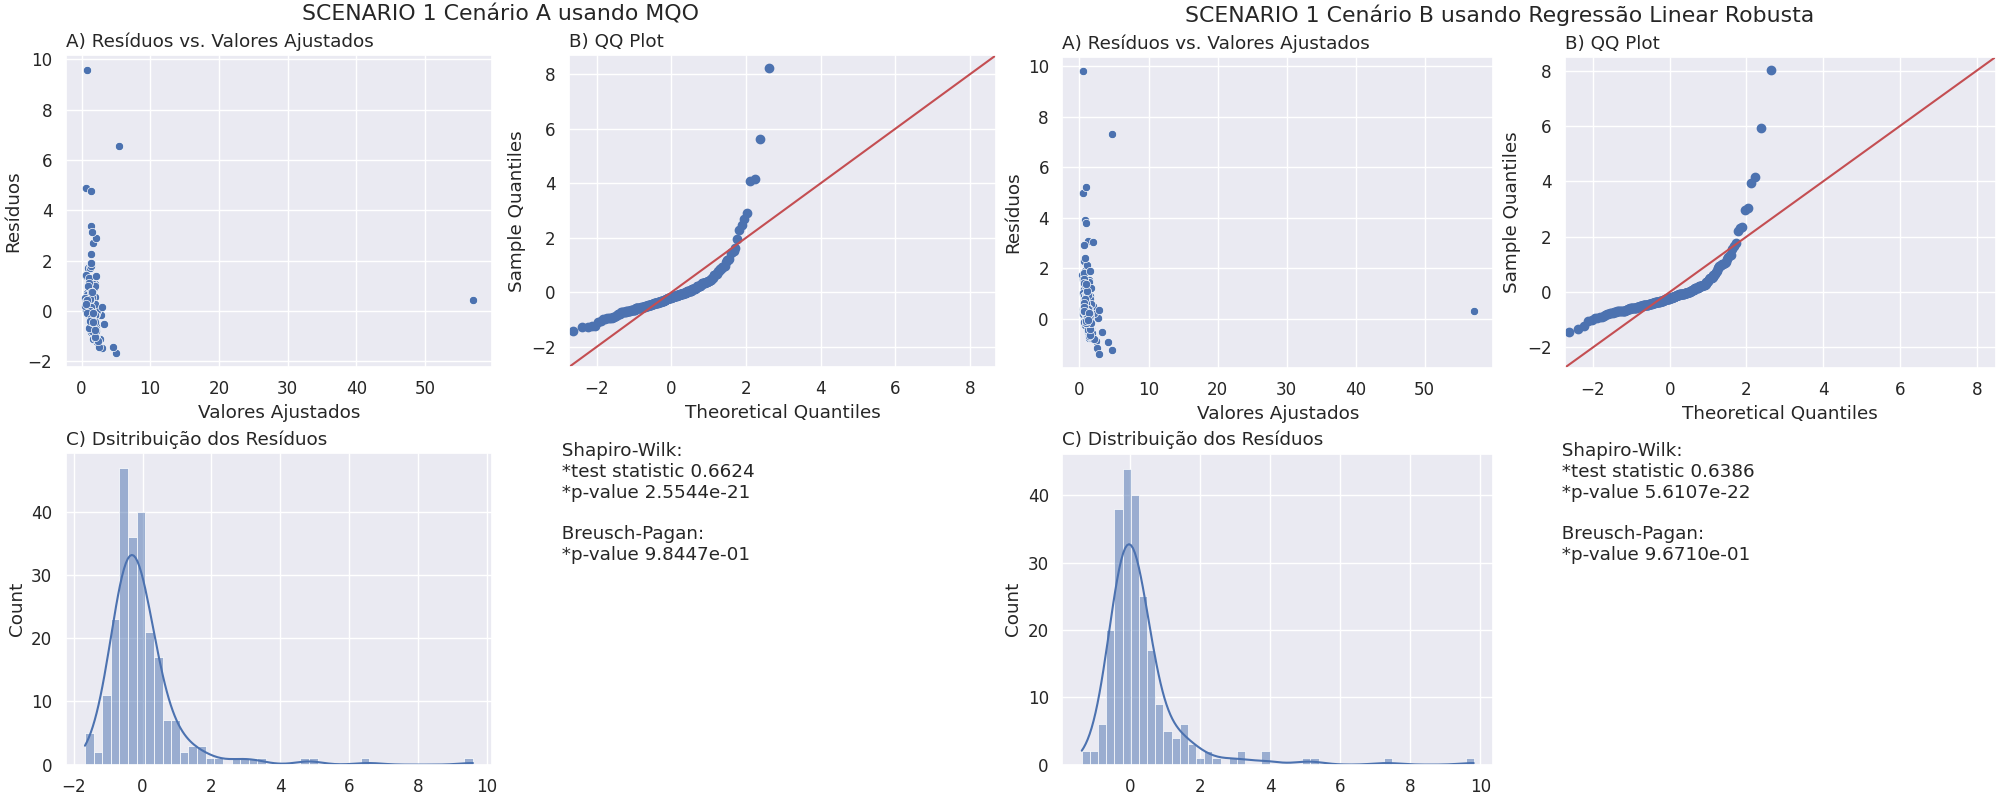

In [92]:
from IPython.display import Image
Image("/content/SCENARIO 1 Model A OLS vs. Model B RLM Charts Comparison.png")

#### Models Summaries

In [93]:
# Using readlines()
file1 = open('/content/SCENARIO 1.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

SCENARIO 1


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:                 TOBINQ   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                     277.4
Date:                Thu, 22 Jun 2023   Prob (F-statistic):          5.45e-112
Time:                        15:18:11   Log-Likelihood:                -368.37
No. Observations:                 234   AIC:                             754.7
Df Residuals:                     225   BIC:                             785.8
Df Model:                           8
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4644      0.246      5.956      0.000       0.980       1.949
TURNOVE

#### Models VIF

In [94]:
pd.read_excel("/content/SCENARIO 1 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  1.154163      TURNOVER
1  2.412731          BETA
2  1.057014  D_TO_A_RATIO
3  2.233588      FIRM_AGE
4  1.285965      VERACITY
5  1.437208        VOLUME
6  1.675709       VARIETY
7  1.239477      VELOCITY

In [95]:
pd.read_excel("/content/SCENARIO 1 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

1.5619820121153274

**Scenario 1 - Analysis**<br><br>
OLS Model returned a +90% in R-squared, but the charts shows that residuals normality is not being respected and there is presence of heteroskedacity. This high R-squared means nothing. There are strong numerical problems here, as expected. <br><br>

Despite the fact of residuals normality problem, VERACITY, VARIETY, and VELOCITY shows statistical significance to explain TOBIN's Q in the RLM model. Being VERACITY the Big Data proxy that positively contributes to the TOBIN's Q, as expected on previous researches. Again, as both models present a lot of violations for the OLS and RLM structures, I can't use this model to analyze anything.

### Scenario 2

In [96]:
df_scenario2_final.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY',
       'VELOCITY'],
      dtype='object')

In [97]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario2_final,
             all_variables_in_the_model = ['TOBINQ', 'TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY'],
             dependent_variable = "TOBINQ",
             independent_variables = ['TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY'],
             scenario_specification = "SCENARIO 2"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


#### Plotting the OLS vs. RLM models comparison

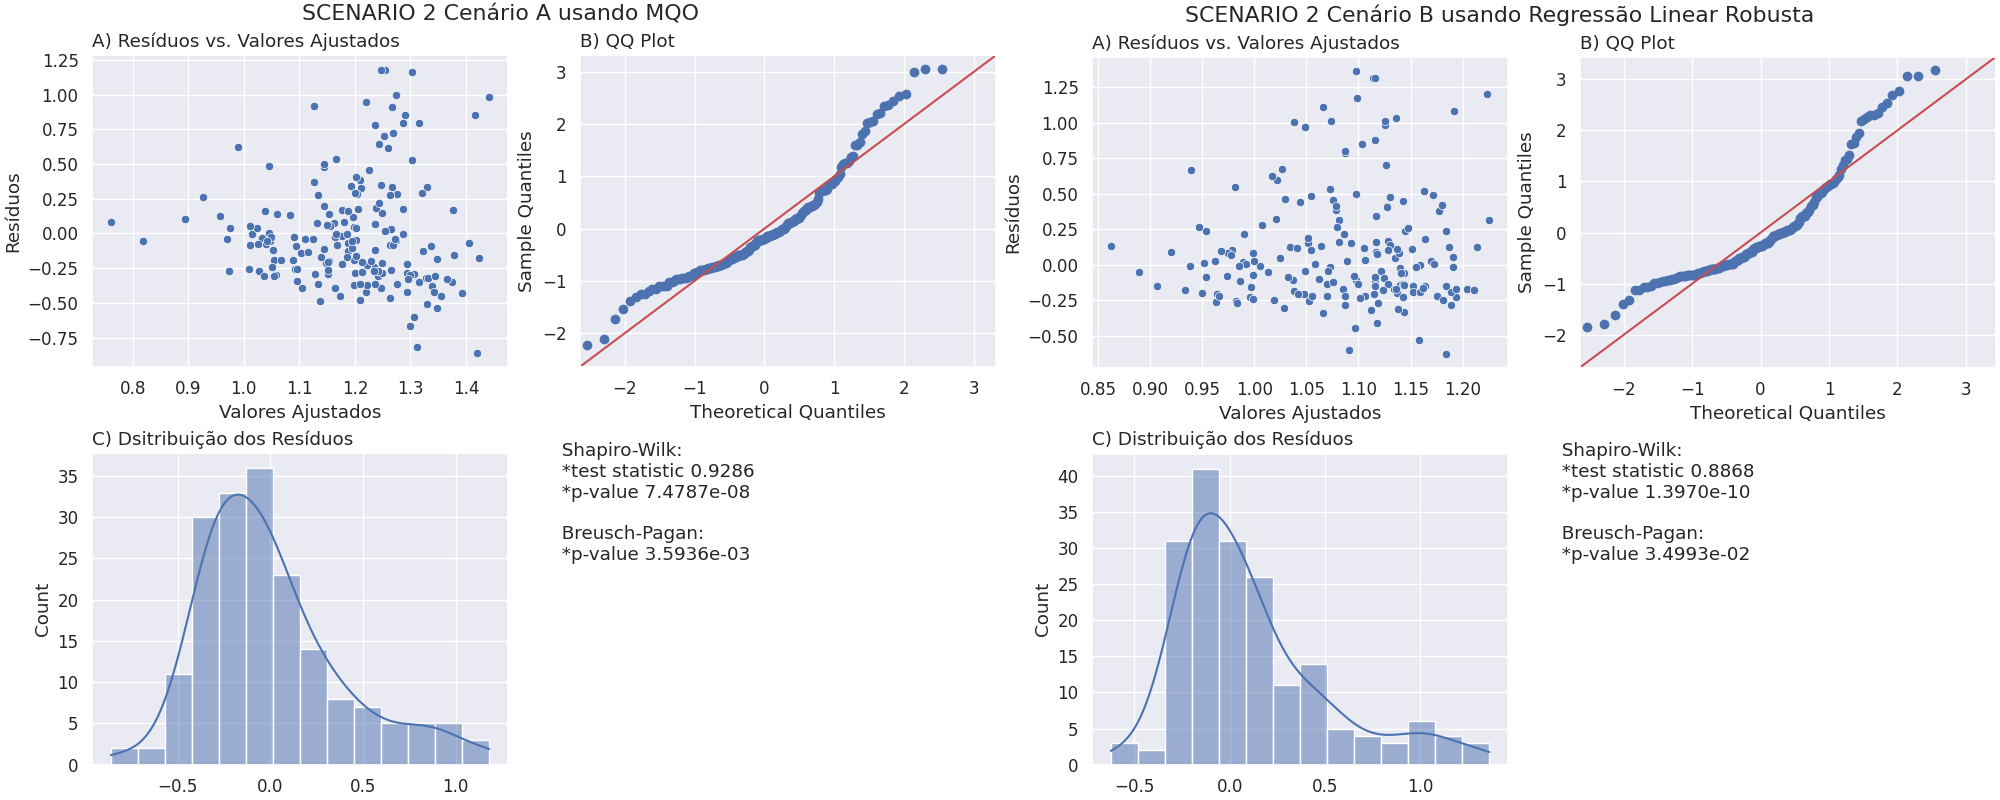

In [98]:
from IPython.display import Image
Image("/content/SCENARIO 2 Model A OLS vs. Model B RLM Charts Comparison.png")

#### Models Summaries

In [99]:
# Using readlines()
file1 = open('/content/SCENARIO 2.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

SCENARIO 2


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:                 TOBINQ   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     1.994
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0497
Time:                        15:18:14   Log-Likelihood:                -86.353
No. Observations:                 184   AIC:                             190.7
Df Residuals:                     175   BIC:                             219.6
Df Model:                           8
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4608      0.115     12.699      0.000       1.234       1.688
TURNOVE

#### Models VIF

In [100]:
pd.read_excel("/content/SCENARIO 2 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  1.573452      TURNOVER
1  3.268941          BETA
2  3.176245  D_TO_A_RATIO
3  2.410993      FIRM_AGE
4  1.491331      VERACITY
5  1.098951        VOLUME
6  1.409225       VARIETY
7  1.535346      VELOCITY

In [101]:
pd.read_excel("/content/SCENARIO 2 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

1.9955604953949968

**Scenario 2 - Analysis**<br><br>
After removing outliers OLS Model returned a 8.4% in R-squared, and the charts shows that residuals normality is not being respected but are much better in comparison with Scenario 1. There is NO presence of heteroskedacity in the residuals, both graphically and by the Breusch-Pagan test. It seems that the outliers removal did play a role by enhancing the model fit to the data. <br><br>

None of Big Data Proxies are statiscally significant to explaining Tobin's Q. Considering Resource-based View, many competitors seems to replace the benefits of a Big Data strategy in 2023. In doing so, Big Data now is not a sustainable competitive advantage anymore. It became business as usual, companies have to do this to break-even with comptetitors.<br><br>

Let's see how the Scenario 3 Model compares with that, because more numerical transformations were made: VOLUME is transformed using Natural Log. Also, VARIETY was changed to a boolean variable not a continuous one, to avoid removing this Big Data V when dealing with outliers.

### Scenario 3

In [102]:
df_scenario3.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL',
       'VARIETY_BOOL'],
      dtype='object')

In [103]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario3,
             all_variables_in_the_model = ['TOBINQ', 'TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME_NL', 'VARIETY_BOOL', 'VELOCITY'],
             dependent_variable = "TOBINQ",
             independent_variables = ['TURNOVER', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME_NL', 'VARIETY_BOOL', 'VELOCITY'],
             scenario_specification = "SCENARIO 3"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


#### Plotting the OLS vs. RLM models comparison

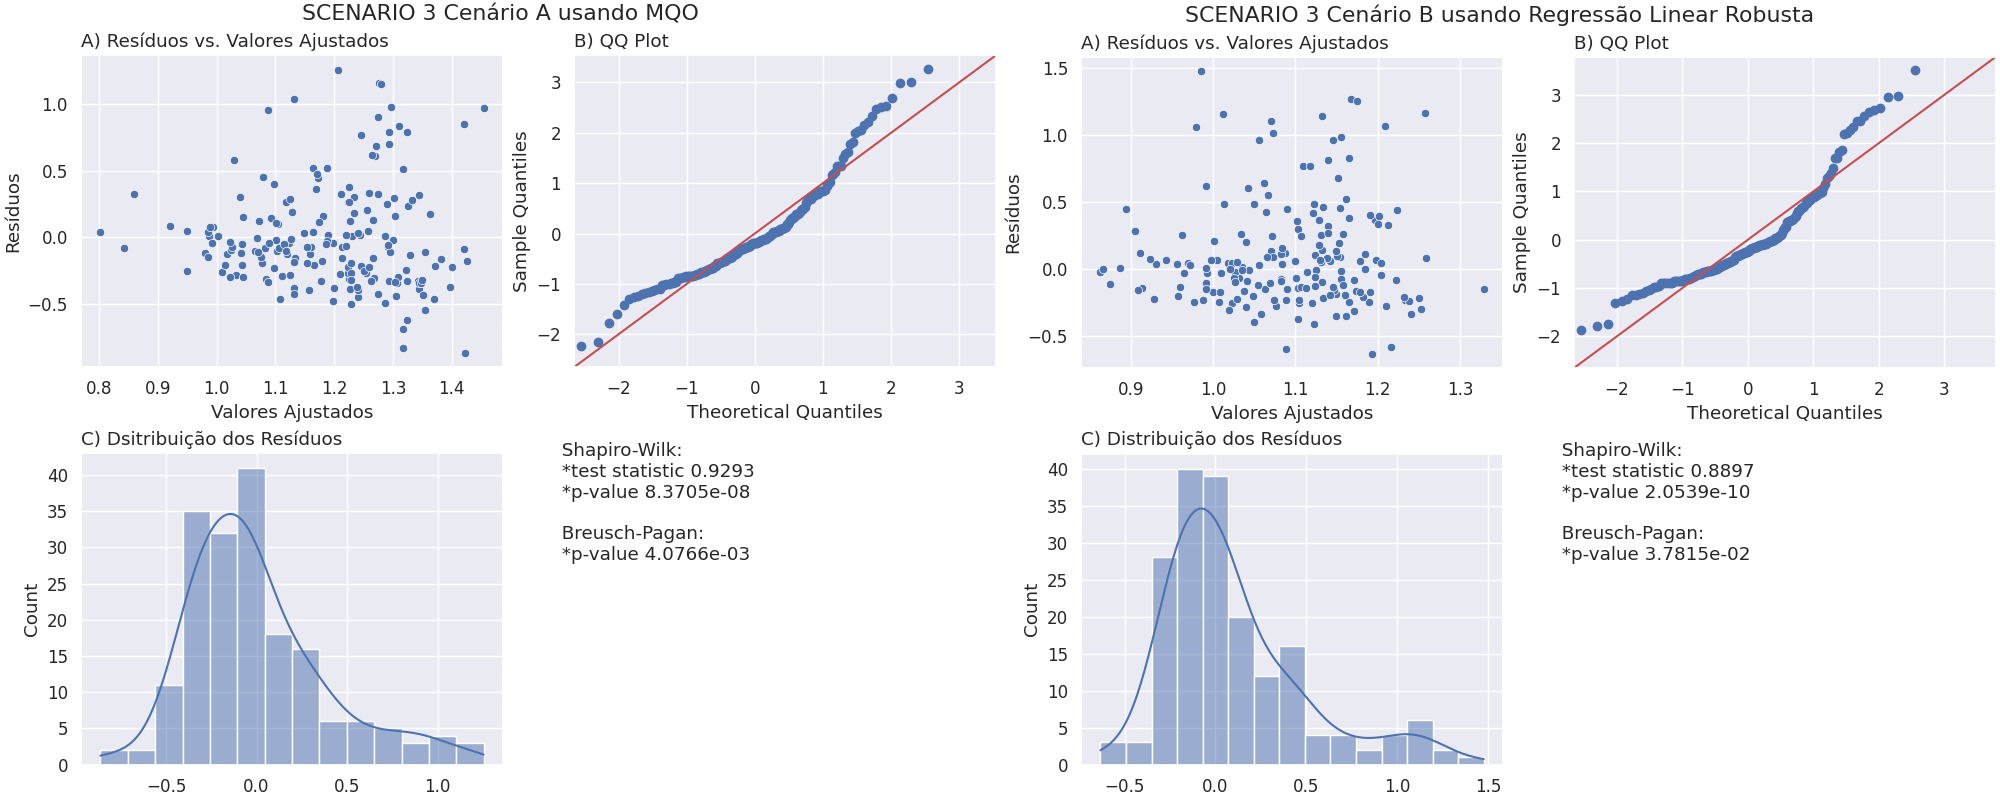

In [104]:
from IPython.display import Image
Image("/content/SCENARIO 3 Model A OLS vs. Model B RLM Charts Comparison.png")

#### Models Summaries

In [105]:
# Using readlines()
file1 = open('/content/SCENARIO 3.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

SCENARIO 3


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:                 TOBINQ   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.282
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0239
Time:                        15:18:16   Log-Likelihood:                -85.246
No. Observations:                 184   AIC:                             188.5
Df Residuals:                     175   BIC:                             217.4
Df Model:                           8
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.4588      0.114     12.824      0.000       1.234       1.683
TURNOVE

#### Models VIF

In [106]:
pd.read_excel("/content/SCENARIO 3 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  1.713561      TURNOVER
1  3.317106          BETA
2  3.232057  D_TO_A_RATIO
3  2.413203      FIRM_AGE
4  1.551132      VERACITY
5  4.157223     VOLUME_NL
6  2.858849  VARIETY_BOOL
7  1.638340      VELOCITY

In [107]:
pd.read_excel("/content/SCENARIO 3 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

2.6101839393202315

**Scenario 3 - Analysis**<br><br>
This scenario has a 9.4% r-squared value. It maintains the consistency in terms of residuals charts too. Residuals are not normal distributed, but almost. Since in finance achieving this kind of residuals normality is very unlikely, it seems that the transformations did good in terms of fitting the model to the data. <br><br>

In this model for the Scenario 3, if we look to the RLM summary, Big Data Volume is statistical significant and impacts negatively the Tobin's Q dependent variable. This was expected since the information obesity can cause a negative impact on firm performance due to lack of focus in a single value stream estrategy. Considering Resource-based View, many competitors seems to replace the benefits of a Big Data strategy in 2023. In doing so, Big Data now is not a sustainable competitive advantage anymore. It became business as usual, companies have to do this to achieving the mean in returns.<br><br>

Let's see how the Scenario 4 Model compares with that, because more numerical transformations were made: TOBIN'S Q and TURNOVER were transformed using Natural Log.

### Scenario 4

In [108]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [109]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario4,
             all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME_NL', 'VARIETY_BOOL', 'VELOCITY'],
             dependent_variable = "TOBINQ_NL",
             independent_variables = ['TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'VERACITY', 'VOLUME_NL', 'VARIETY_BOOL', 'VELOCITY'],
             scenario_specification = "SCENARIO 4"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


#### Plotting the OLS vs. RLM models comparison

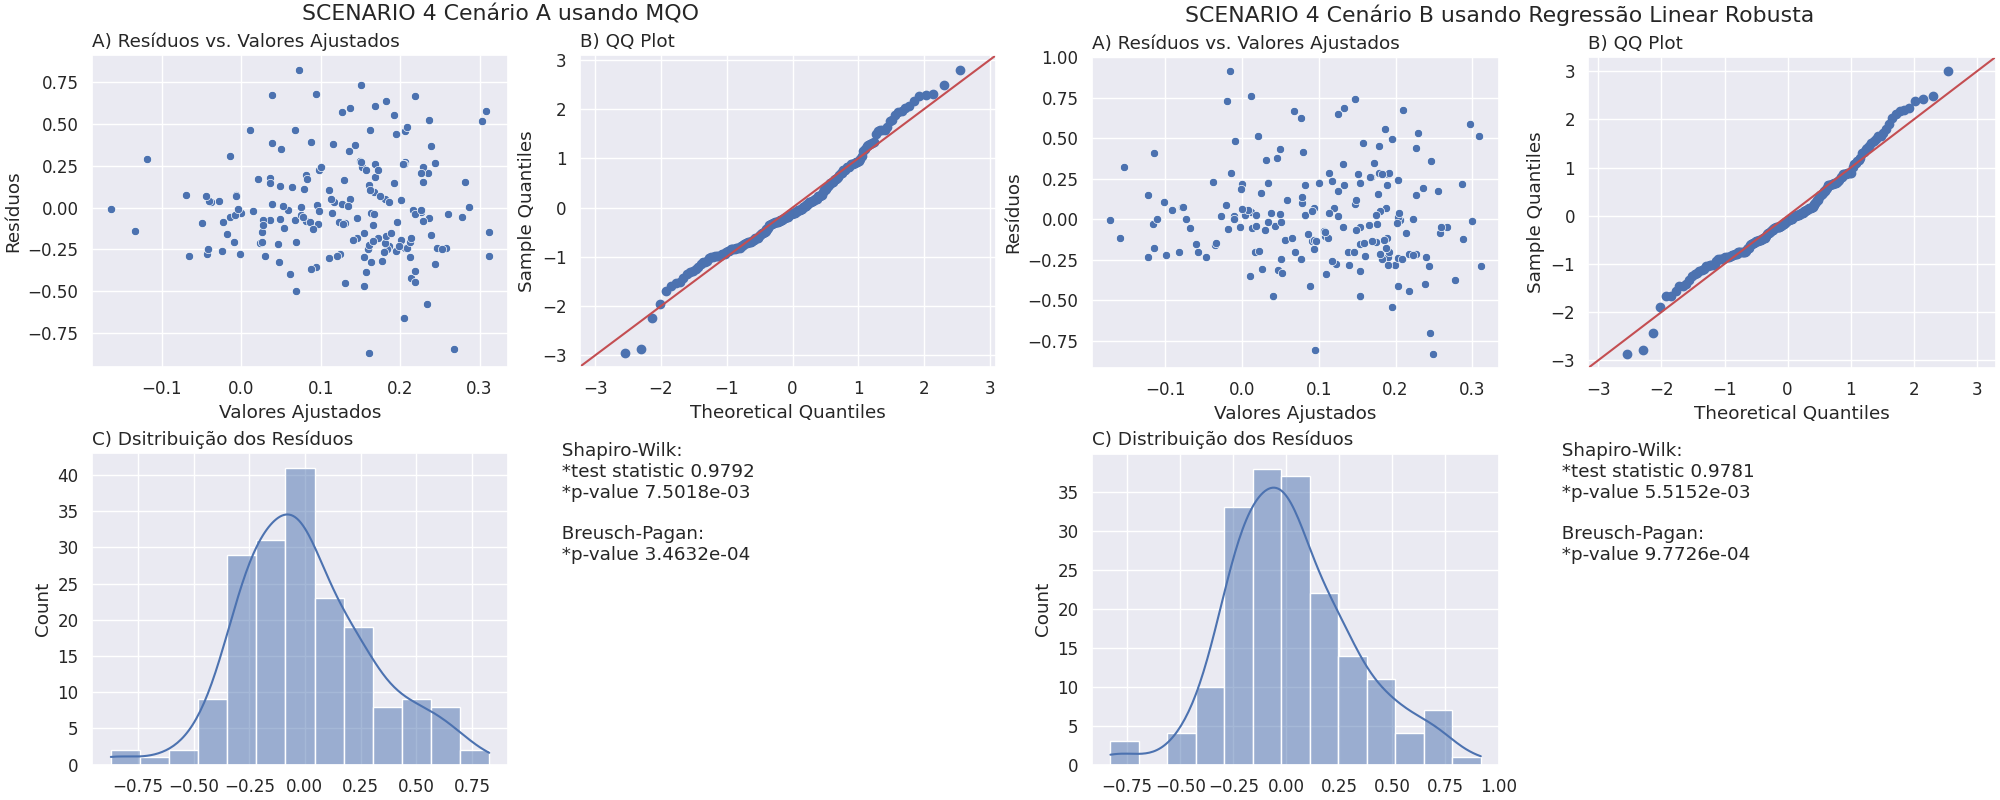

In [110]:
from IPython.display import Image
Image("/content/SCENARIO 4 Model A OLS vs. Model B RLM Charts Comparison.png")

#### Models Summaries

In [111]:
# Using readlines()
file1 = open('/content/SCENARIO 4.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

SCENARIO 4


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:              TOBINQ_NL   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.051
Method:                 Least Squares   F-statistic:                     2.229
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0275
Time:                        15:18:19   Log-Likelihood:                -36.743
No. Observations:                 184   AIC:                             91.49
Df Residuals:                     175   BIC:                             120.4
Df Model:                           8
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.2303      0.115      2.001      0.047       0.003       0.457
TURNOVE

#### Models VIF

In [112]:
pd.read_excel("/content/SCENARIO 4 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  9.661256   TURNOVER_NL
1  5.260775          BETA
2  3.843762  D_TO_A_RATIO
3  2.852582      FIRM_AGE
4  1.533935      VERACITY
5  4.122608     VOLUME_NL
6  2.852551  VARIETY_BOOL
7  1.605382      VELOCITY

In [113]:
pd.read_excel("/content/SCENARIO 4 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

3.966606489190922

Ok, every variable has an acceptable VIF (VIF<10)

### Research Scenarios



I will build 4 scenarios to include in my dissertation
*   Baseline: Tobin's Q + Control Variables + Sector
*   A) Baseline + VOLUME only
* B) Baseline + VARIETY only
* C) Baseline + VERACITY only
* D) Baseline + VELOCITY only
* E) Baseline + Interaction of Big Data V's (VOLUME * VARIETY * VERACIY * VELOCITY)



#### Baseline: Tobin's Q + Control Variables + Sector

In [114]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [115]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario4,
             all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'TRBC_ECONOMIC_SECTOR'],
             dependent_variable = "TOBINQ_NL",
             independent_variables = ['TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE'],
             scenario_specification = "MODELO BASE"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


In [116]:
# Using readlines()
file1 = open('/content/MODELO BASE.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

MODELO BASE


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:              TOBINQ_NL   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.972
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0226
Time:                        15:18:22   Log-Likelihood:                -31.746
No. Observations:                 184   AIC:                             93.49
Df Residuals:                     169   BIC:                             141.7
Df Model:                          14
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.

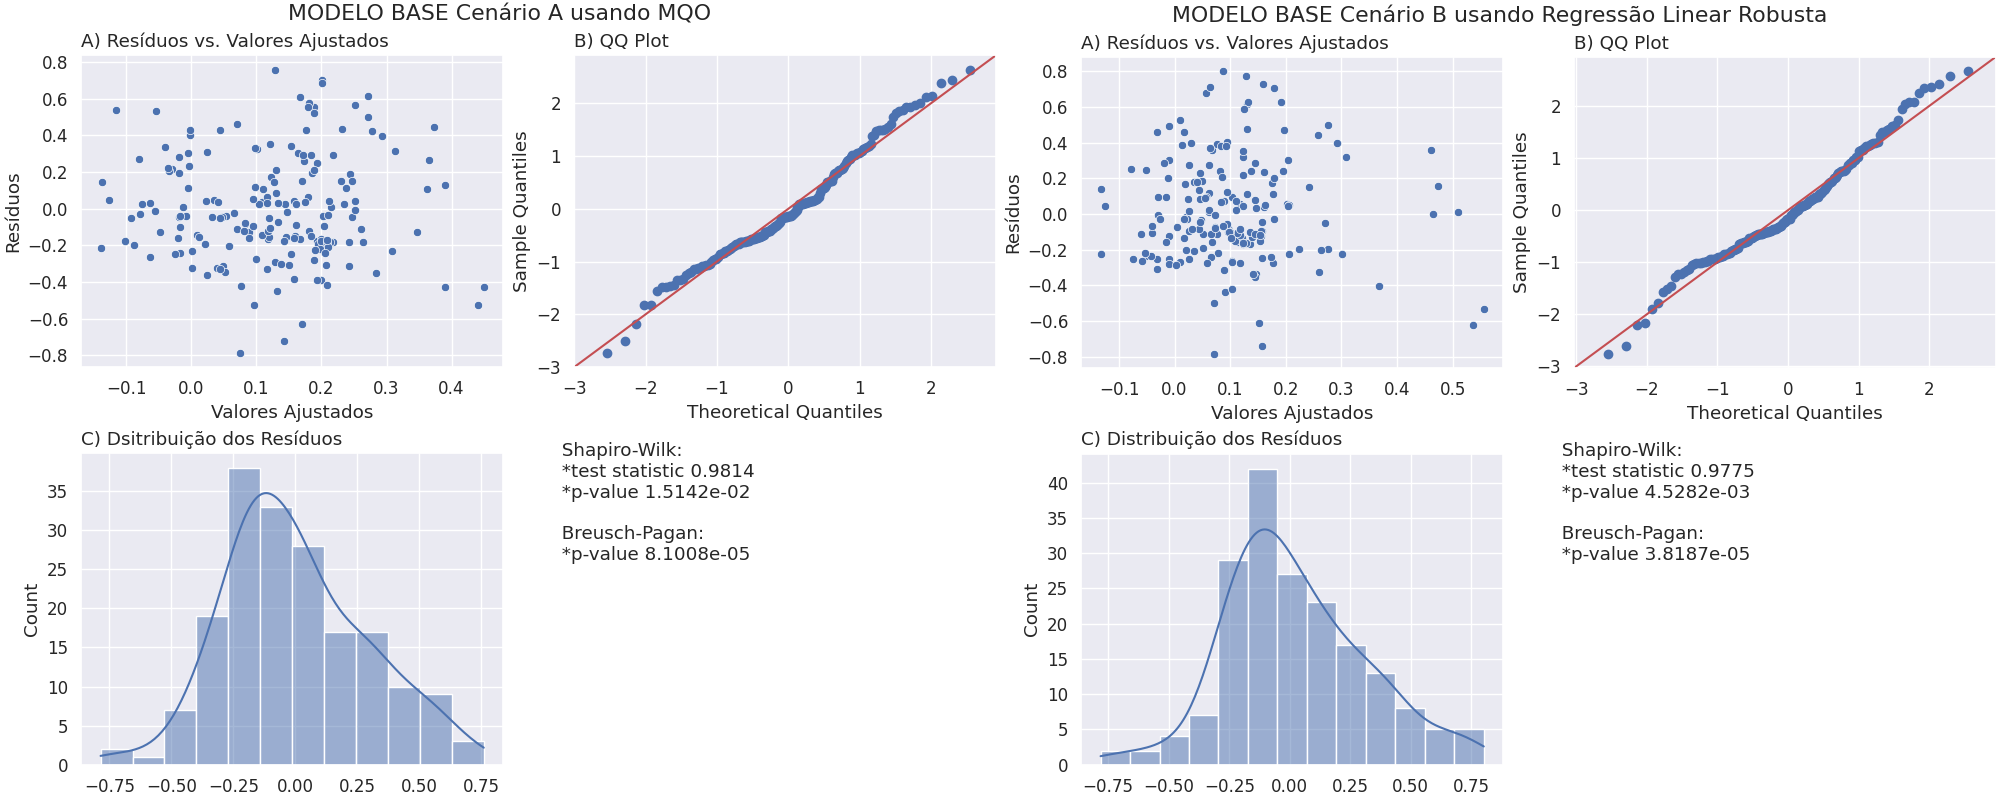

In [117]:
from IPython.display import Image
Image("/content/MODELO BASE Model A OLS vs. Model B RLM Charts Comparison.png")

In [118]:
pd.read_excel("/content/MODELO BASE VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  8.437077   TURNOVER_NL
1  5.188183          BETA
2  3.724086  D_TO_A_RATIO
3  2.732219      FIRM_AGE

In [119]:
pd.read_excel("/content/MODELO BASE VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

5.0203911055579695

#### Baseline + VOLUME only (H1)

In [120]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [121]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario4,
             all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'TRBC_ECONOMIC_SECTOR','VOLUME_NL'],
             dependent_variable = "TOBINQ_NL",
             independent_variables = ['TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE','VOLUME_NL'],
             scenario_specification = "MODELO H1"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


In [122]:
# Using readlines()
file1 = open('/content/MODELO H1.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

MODELO H1


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:              TOBINQ_NL   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     2.110
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0116
Time:                        15:18:25   Log-Likelihood:                -29.792
No. Observations:                 184   AIC:                             91.58
Df Residuals:                     168   BIC:                             143.0
Df Model:                          15
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.11

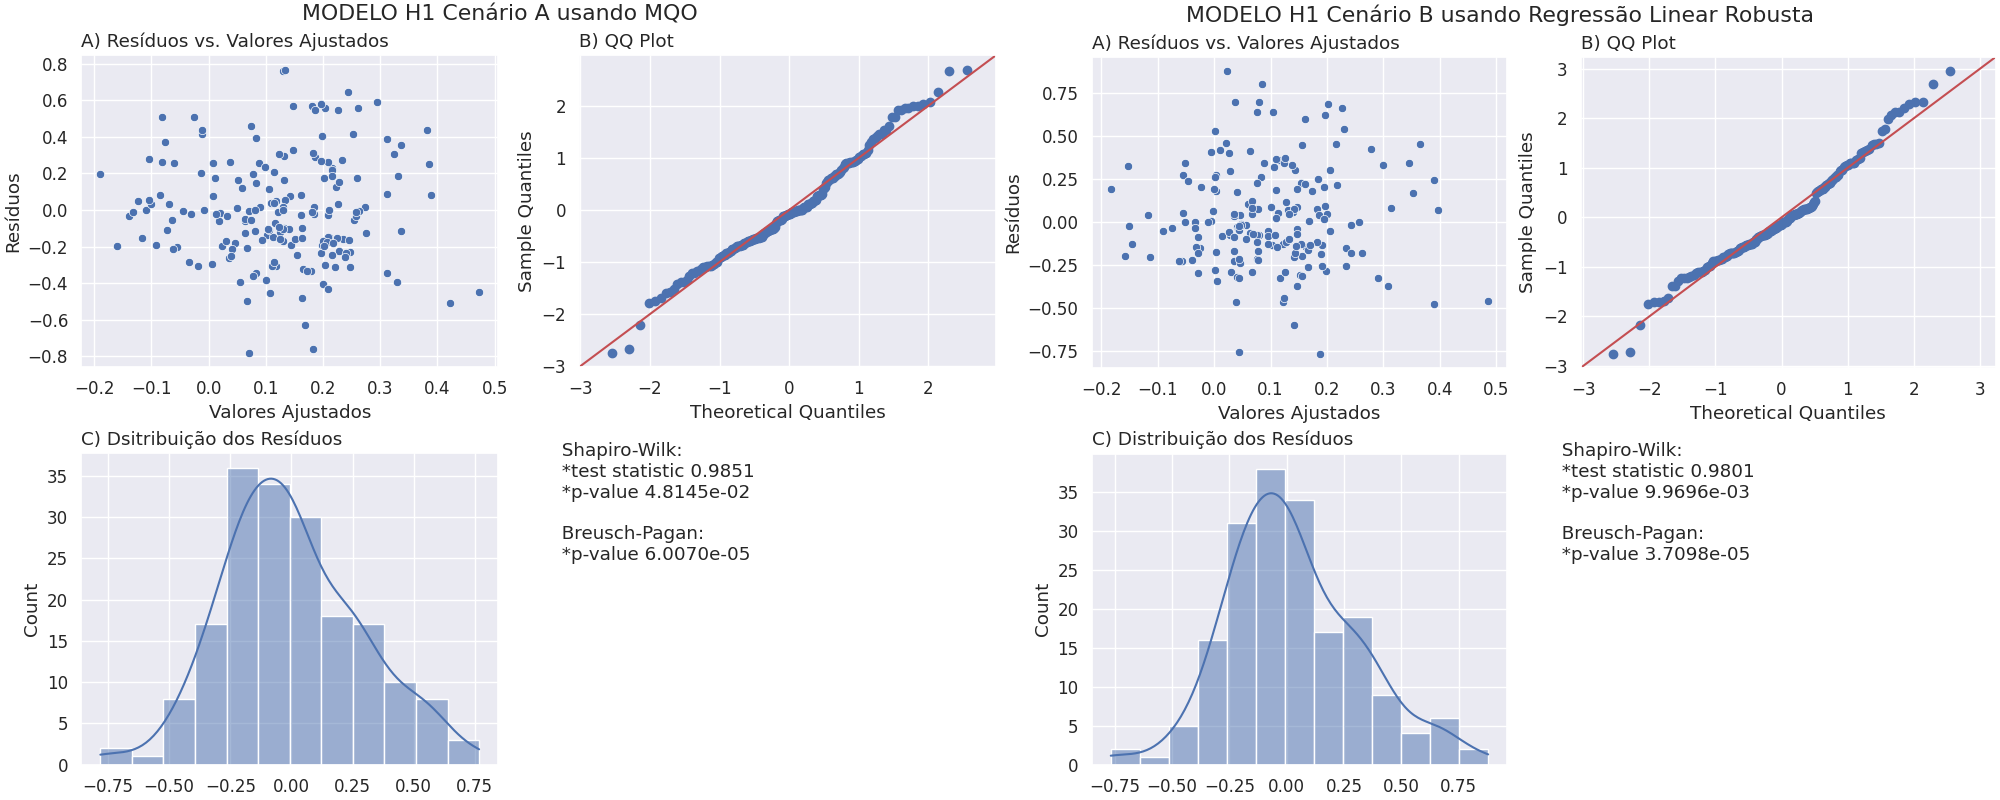

In [123]:
from IPython.display import Image
Image("/content/MODELO H1 Model A OLS vs. Model B RLM Charts Comparison.png")

In [124]:
pd.read_excel("/content/MODELO H1 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  9.318635   TURNOVER_NL
1  5.193765          BETA
2  3.758092  D_TO_A_RATIO
3  2.778164      FIRM_AGE
4  1.764077     VOLUME_NL

In [125]:
pd.read_excel("/content/MODELO H1 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

4.5625466478539325

#### Baseline + VARIETY only (H2)

In [126]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [127]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario4,
             all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'TRBC_ECONOMIC_SECTOR','VARIETY_NL'],
             dependent_variable = "TOBINQ_NL",
             independent_variables = ['TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE','VARIETY_NL'],
             scenario_specification = "MODELO H2"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


In [128]:
# Using readlines()
file1 = open('/content/MODELO H2.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

MODELO H2


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:              TOBINQ_NL   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     1.844
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0324
Time:                        15:18:27   Log-Likelihood:                -31.645
No. Observations:                 184   AIC:                             95.29
Df Residuals:                     168   BIC:                             146.7
Df Model:                          15
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.13

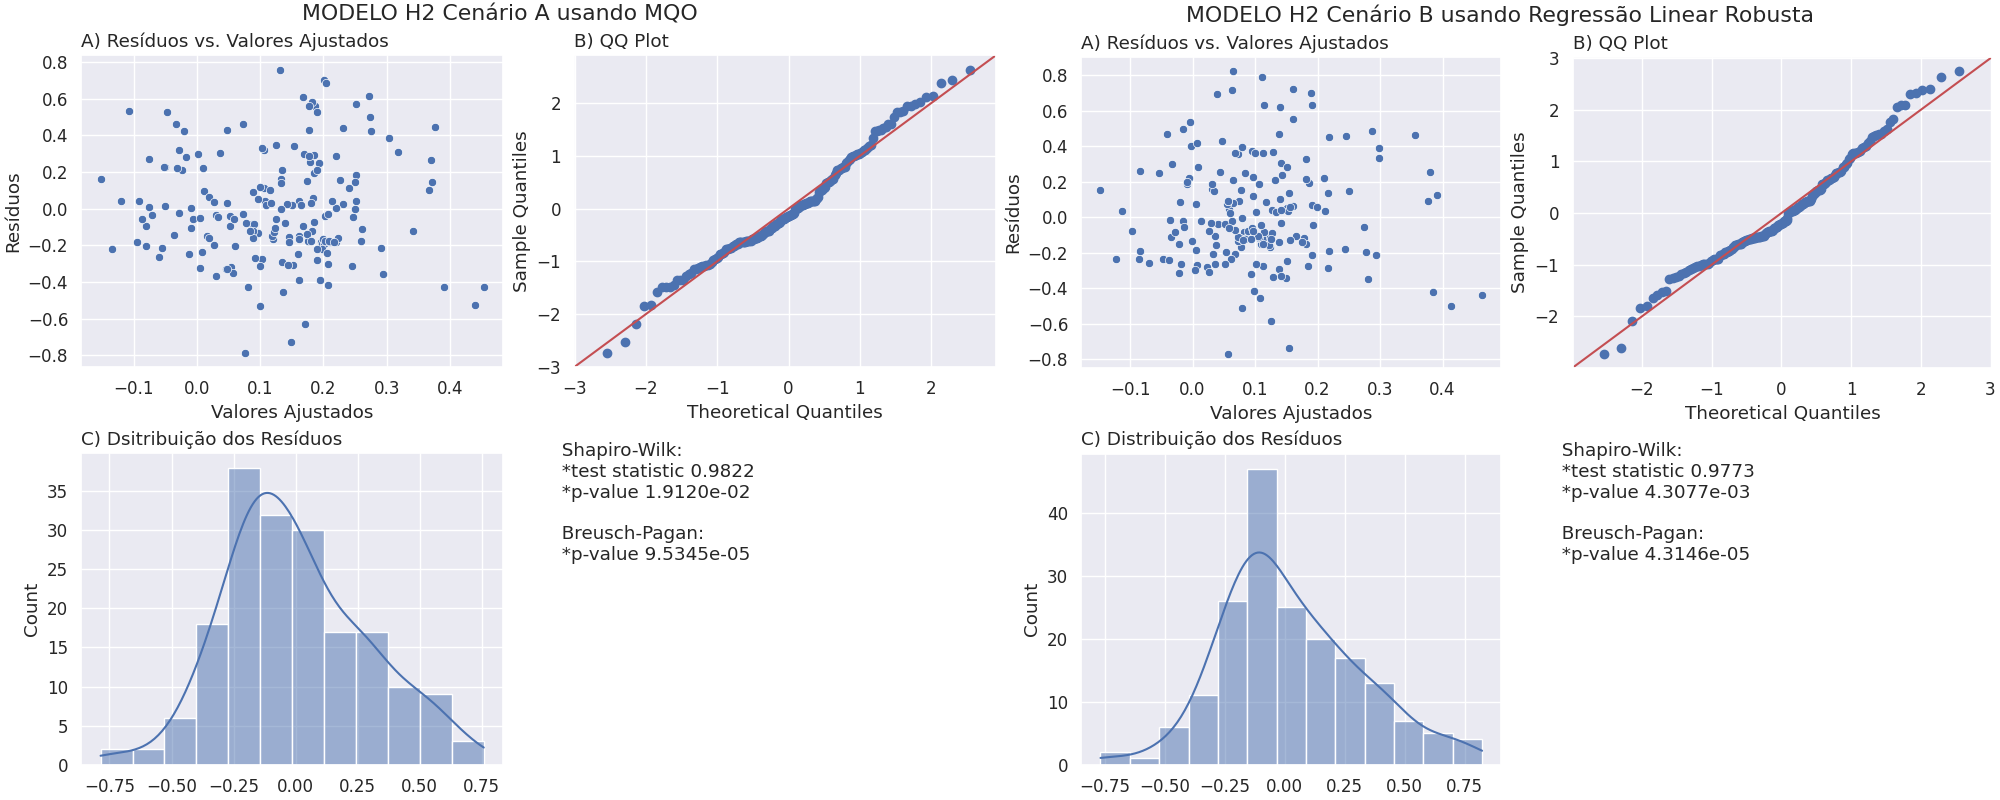

In [129]:
from IPython.display import Image
Image("/content/MODELO H2 Model A OLS vs. Model B RLM Charts Comparison.png")

In [130]:
pd.read_excel("/content/MODELO H2 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  8.548170   TURNOVER_NL
1  5.190424          BETA
2  3.764965  D_TO_A_RATIO
3  2.747342      FIRM_AGE
4  1.219363    VARIETY_NL

In [131]:
pd.read_excel("/content/MODELO H2 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

4.294053037418388

#### Baseline + VERACITY only

In [132]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [133]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario4,
             all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'TRBC_ECONOMIC_SECTOR','VERACITY_NL'],
             dependent_variable = "TOBINQ_NL",
             independent_variables = ['TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE','VERACITY_NL'],
             scenario_specification = "MODELO H3"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


In [134]:
# Using readlines()
file1 = open('/content/MODELO H3.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

MODELO H3


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:              TOBINQ_NL   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     1.940
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0225
Time:                        15:18:30   Log-Likelihood:                -30.972
No. Observations:                 184   AIC:                             93.94
Df Residuals:                     168   BIC:                             145.4
Df Model:                          15
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.13

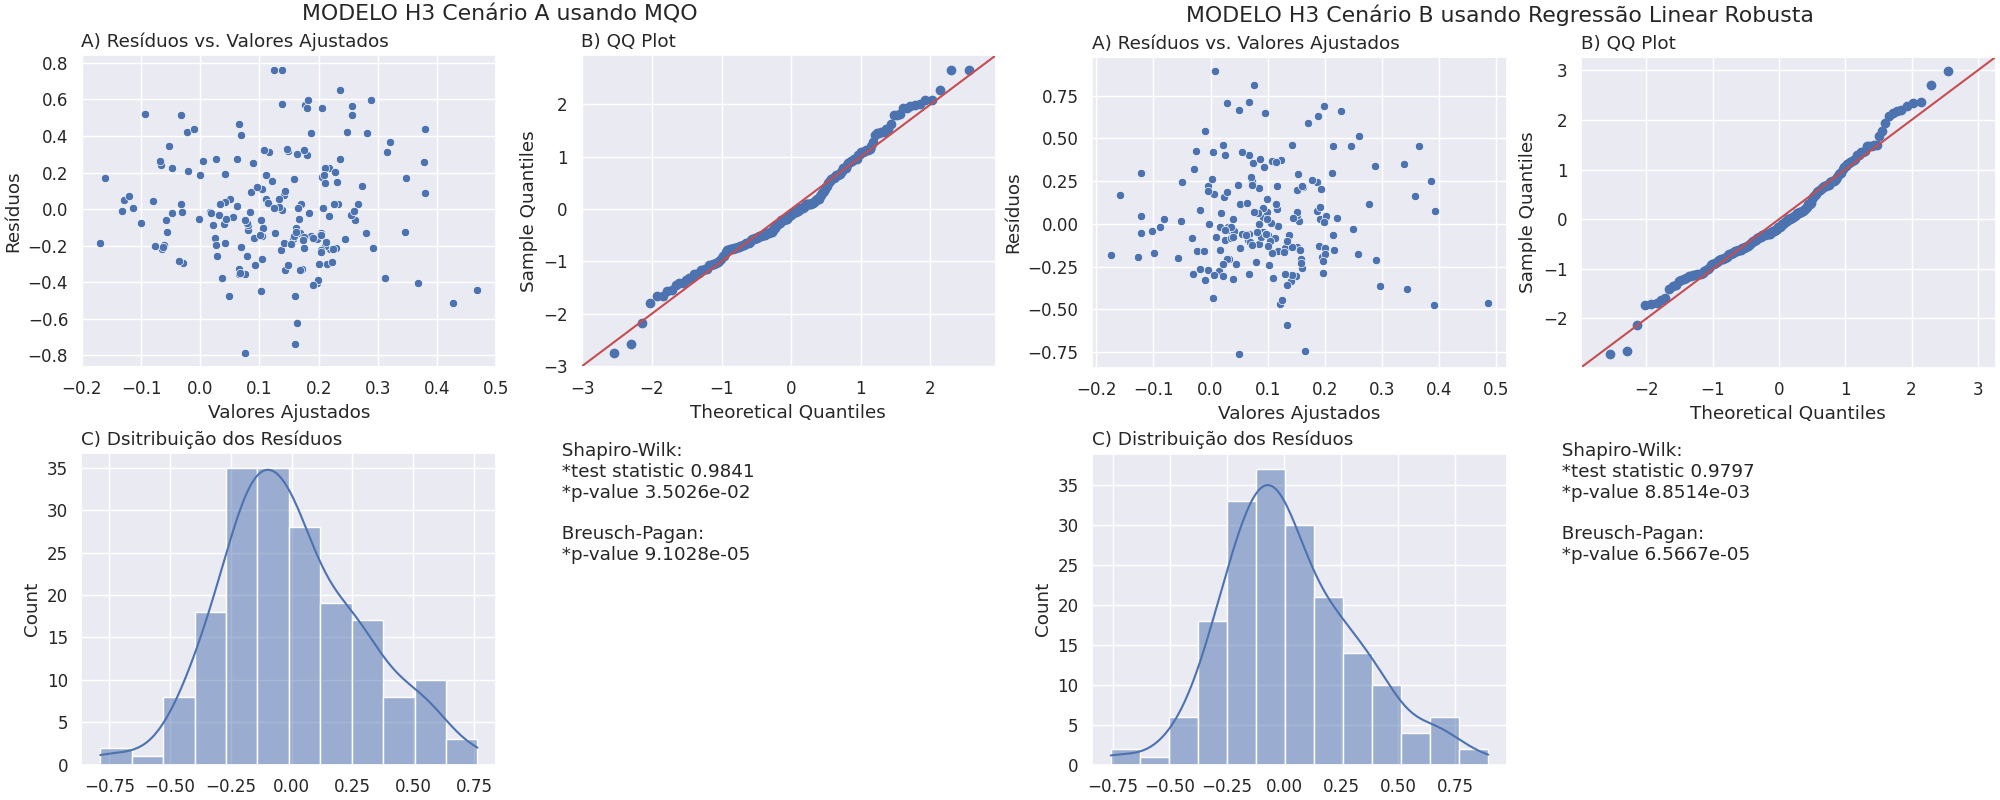

In [135]:
from IPython.display import Image
Image("/content/MODELO H3 Model A OLS vs. Model B RLM Charts Comparison.png")

In [136]:
pd.read_excel("/content/MODELO H3 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  9.702124   TURNOVER_NL
1  5.267869          BETA
2  3.815105  D_TO_A_RATIO
3  2.802683      FIRM_AGE
4  1.906691   VERACITY_NL

In [137]:
pd.read_excel("/content/MODELO H3 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

4.698894601559955

#### Baseline + VELOCITY only

In [138]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [139]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario4,
             all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'TRBC_ECONOMIC_SECTOR','VELOCITY_NL'],
             dependent_variable = "TOBINQ_NL",
             independent_variables = ['TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE','VELOCITY_NL'],
             scenario_specification = "MODELO H4"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


In [140]:
# Using readlines()
file1 = open('/content/MODELO H4.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

MODELO H4


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:              TOBINQ_NL   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.900
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0262
Time:                        15:18:33   Log-Likelihood:                -31.253
No. Observations:                 184   AIC:                             94.51
Df Residuals:                     168   BIC:                             145.9
Df Model:                          15
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          0.14

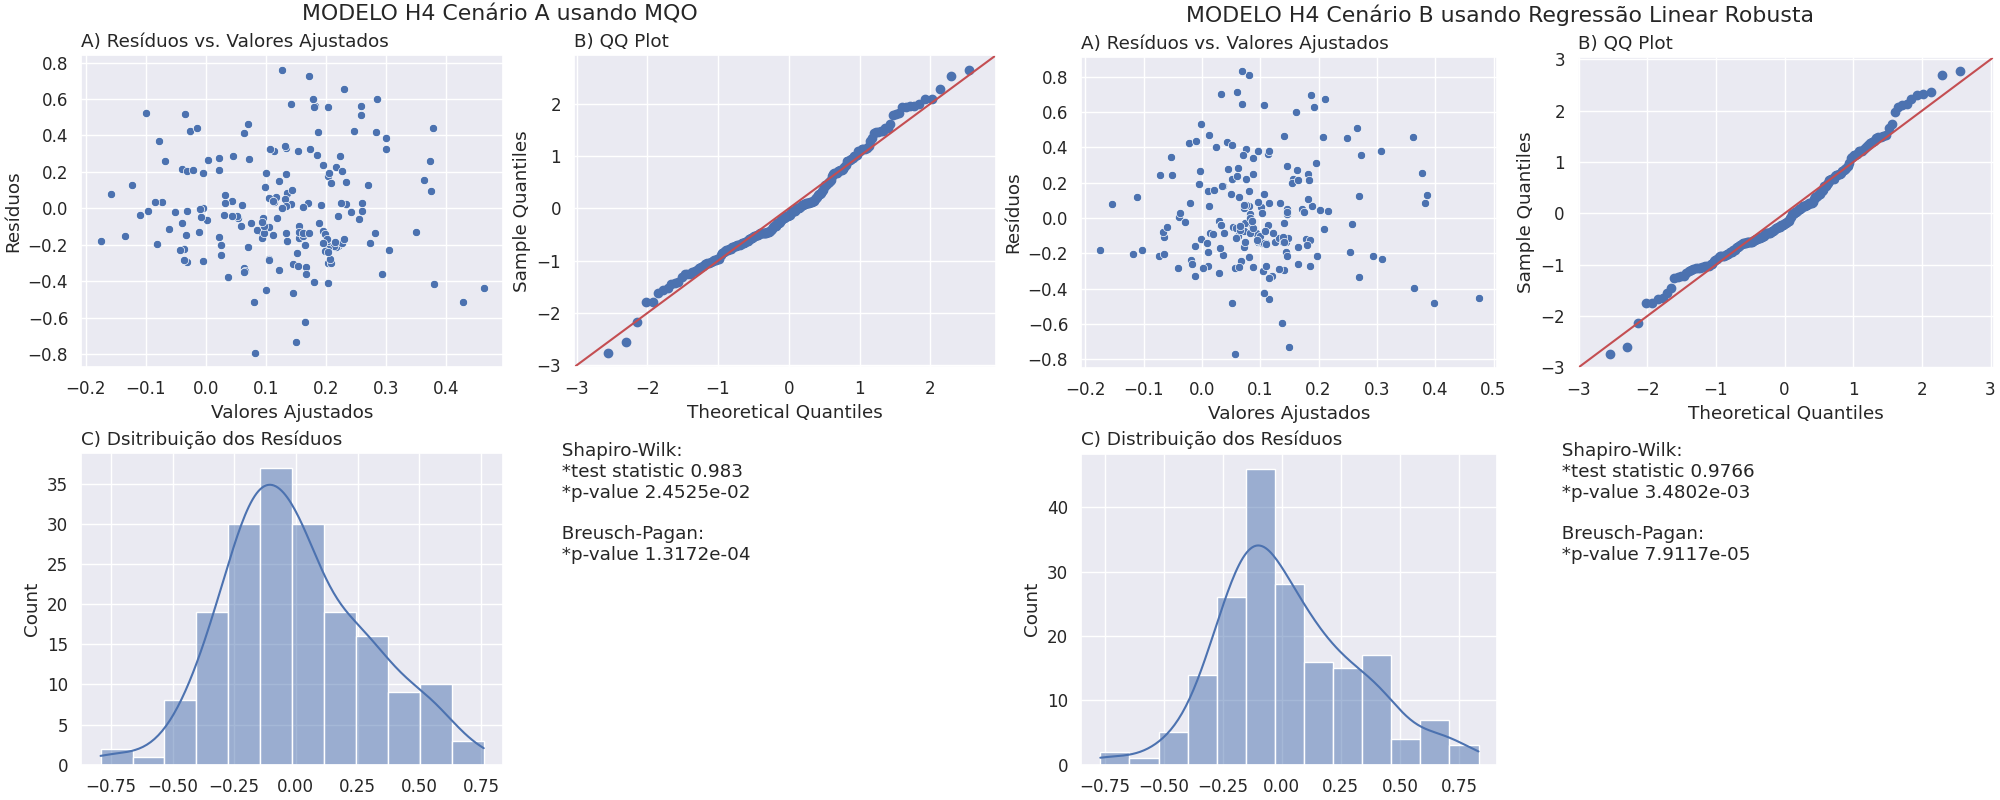

In [141]:
from IPython.display import Image
Image("/content/MODELO H4 Model A OLS vs. Model B RLM Charts Comparison.png")

In [142]:
pd.read_excel("/content/MODELO H4 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF Variable_name
0  9.597890   TURNOVER_NL
1  5.230419          BETA
2  3.812833  D_TO_A_RATIO
3  2.849684      FIRM_AGE
4  1.838698   VELOCITY_NL

In [143]:
pd.read_excel("/content/MODELO H4 VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

4.665904650423878

#### Baseline + Interaction of Big Data V's (VOLUME * VARIETY * VERACITY * VELOCITY)

In [144]:
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL'],
      dtype='object')

In [145]:
# creating interaction column
df_scenario4['VOLUME_NL_i_VARIETY_NL_i_VERACITY_NL_i_VELOCITY_NL'] = df_scenario4['VOLUME_NL'] * df_scenario4['VARIETY_NL'] * df_scenario4['VERACITY_NL'] * df_scenario4['VELOCITY_NL']

In [146]:
# Testing the tailored function
run_scenario(df_with_data = df_scenario4,
             all_variables_in_the_model = ['TOBINQ_NL', 'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE', 'TRBC_ECONOMIC_SECTOR','VOLUME_NL_i_VARIETY_NL_i_VERACITY_NL_i_VELOCITY_NL'],
             dependent_variable = "TOBINQ_NL",
             independent_variables = ['TURNOVER_NL', 'BETA', 'D_TO_A_RATIO','FIRM_AGE','VOLUME_NL_i_VARIETY_NL_i_VERACITY_NL_i_VELOCITY_NL'],
             scenario_specification = "MODELO INTERATIVO"
             )

[LOG] Generating model_formula...
[LOG] Building Model A - OLS specification...
[LOG] Building Model A - OLS .fit()...
[LOG] Building Model A - OLS main table layout...
[LOG] Building Model B - RLM specification...
[LOG] Building Model B - RLM .fit()...
[LOG] Building Model B - RLM main table layout...
[LOG] Exporting summaries comparions between Model A - OLS vs. Model B - RLM...
[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...
[LOG] Exporting Model A - OLS charts...
[LOG] Exporting Model B - RLM charts...
[LOG] Exporting Model A - OLS vs. Model B - RLM charts...
[LOG] Exporting VIF for the independent variables to verify multicollinearity...
[LOG] Exporting main tables comparisons between Model A - OLS vs. Model B - RLM...


<ipython-input-46-eed2e04382fe>:201: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  vif_info.loc['VIF_mean'] = vif_info.mean()


In [147]:
# Using readlines()
file1 = open('/content/MODELO INTERATIVO.txt', 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    print(line.strip())

MODELO INTERATIVO


Model A - OLS ---------------------------------------------------------------------------------------


OLS Regression Results
Dep. Variable:              TOBINQ_NL   R-squared:                       0.145
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1.898
Date:                Thu, 22 Jun 2023   Prob (F-statistic):             0.0264
Time:                        15:18:36   Log-Likelihood:                -31.264
No. Observations:                 184   AIC:                             94.53
Df Residuals:                     168   BIC:                             146.0
Df Model:                          15
Covariance Type:            nonrobust
coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                  

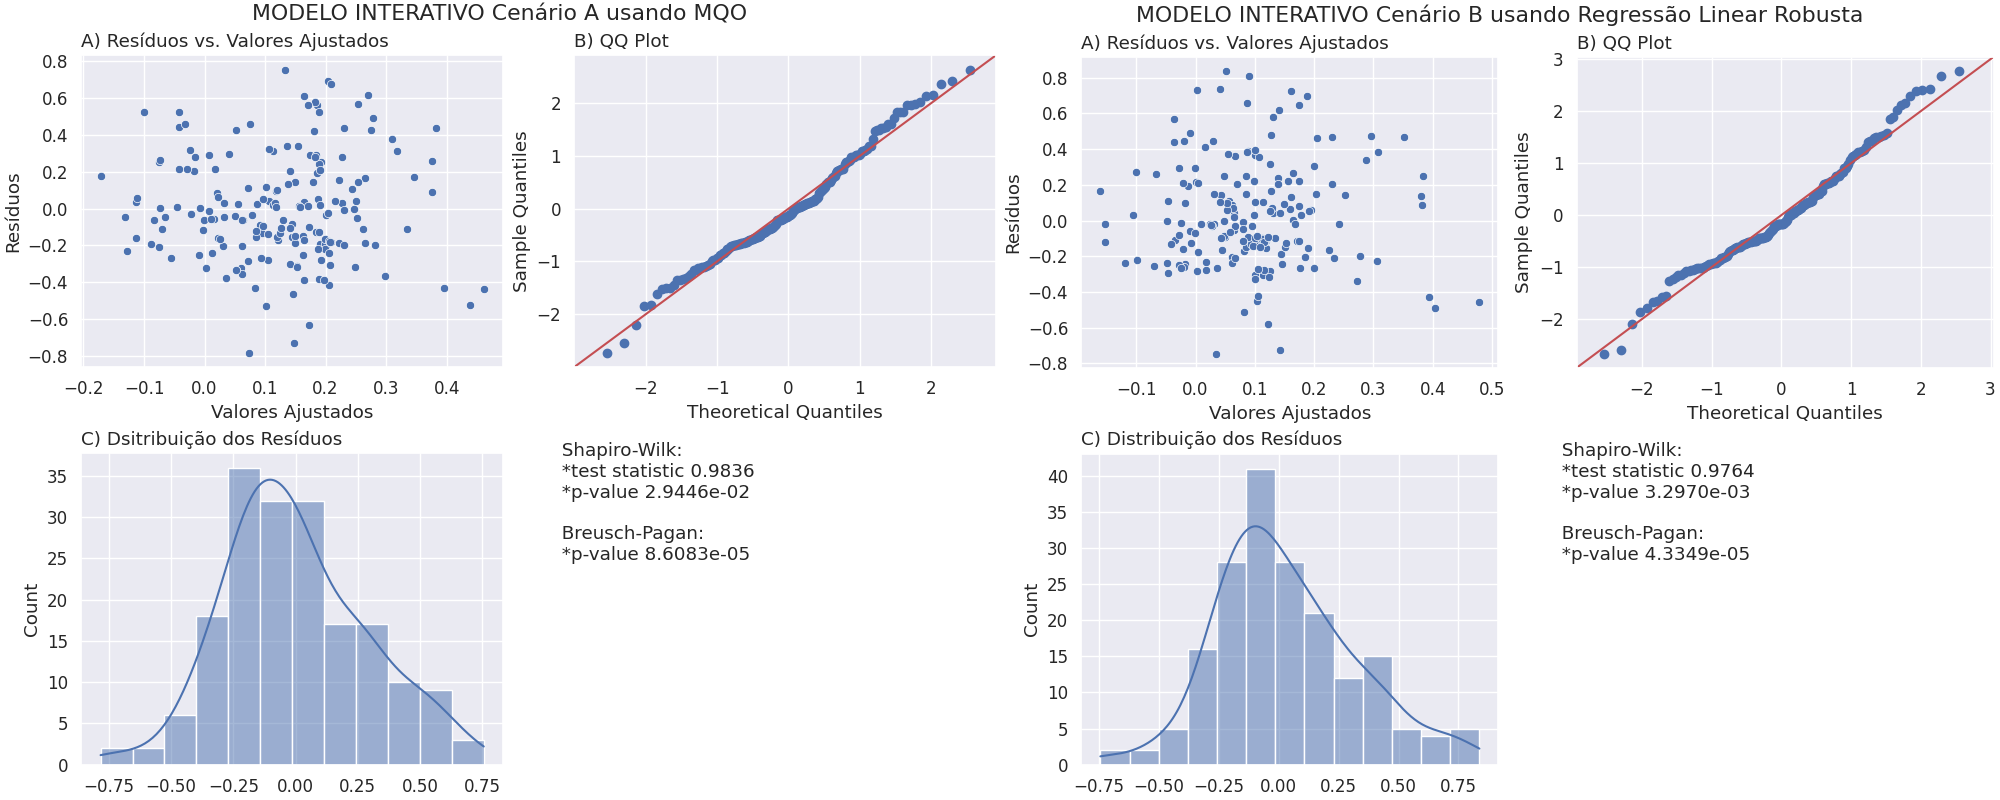

In [148]:
from IPython.display import Image
Image("/content/MODELO INTERATIVO Model A OLS vs. Model B RLM Charts Comparison.png")

In [149]:
pd.read_excel("/content/MODELO INTERATIVO VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')

VIF                                      Variable_name
0  8.576381                                        TURNOVER_NL
1  5.189161                                               BETA
2  3.769300                                       D_TO_A_RATIO
3  2.750007                                           FIRM_AGE
4  1.194907  VOLUME_NL_i_VARIETY_NL_i_VERACITY_NL_i_VELOCIT...

In [150]:
pd.read_excel("/content/MODELO INTERATIVO VIF Analysis.xlsx").query("Variable_name.isna()==False", engine='python')['VIF'].mean()

4.295951270361637

#### Building the combined results table

In [151]:
lists_of_combined_results_from_each_model = [
    '/content/MODELO BASE Main Table Combined.xlsx',
    '/content/MODELO H1 Main Table Combined.xlsx',
    '/content/MODELO H2 Main Table Combined.xlsx',
    '/content/MODELO H3 Main Table Combined.xlsx',
    '/content/MODELO H4 Main Table Combined.xlsx',
    '/content/MODELO INTERATIVO Main Table Combined.xlsx',
]

In [152]:
lists_of_dfs_results = []
for table_of_results in lists_of_combined_results_from_each_model:
  lists_of_dfs_results.append(pd.read_excel(table_of_results))

In [153]:
combined_results_h1_to_h4 = pd.concat(lists_of_dfs_results)

In [154]:
combined_results_h1_to_h4['result_description'].unique()

array(['Intercept', 'TRBC_ECONOMIC_SECTOR[T.Basic Materials]',
       'TRBC_ECONOMIC_SECTOR[T.Consumer Cyclicals]',
       'TRBC_ECONOMIC_SECTOR[T.Consumer Non-Cyclicals]',
       'TRBC_ECONOMIC_SECTOR[T.Energy]',
       'TRBC_ECONOMIC_SECTOR[T.Financials]',
       'TRBC_ECONOMIC_SECTOR[T.Healthcare]',
       'TRBC_ECONOMIC_SECTOR[T.Industrials]',
       'TRBC_ECONOMIC_SECTOR[T.Real Estate]',
       'TRBC_ECONOMIC_SECTOR[T.Technology]',
       'TRBC_ECONOMIC_SECTOR[T.Utilities]', 'TURNOVER_NL', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'No. Observations', 'Rsquared',
       'Breusch-Pagan', 'Shapiro-Wilk p-value', 'Model Type', 'VOLUME_NL',
       'VARIETY_NL', 'VERACITY_NL', 'VELOCITY_NL',
       'VOLUME_NL_i_VARIETY_NL_i_VERACITY_NL_i_VELOCITY_NL'], dtype=object)

In [155]:
combined_results_h1_to_h4.to_excel("combined_results_h1_to_h4.xlsx")

# Performing tests to assess H5 and H6

* **H5->** Firms that implemented Big Data first (early adopters) performed better
* **H6->** In TRBC Economic Sectors where the use of Big Data is greater, the impact on performance is smaller

## **H5->** Firms that implemented Big Data first (early adopters) performed better (better Tobin's Q)

In [156]:
# Reimporting the h5 and h6 dataset
df_model_raw_h5_with_launch_info = pd.read_excel('/content/drive/MyDrive/Mestrado - UFG/Dissertação/Model/ivan_mello_big_data_final_parsed_data_for_tests.xlsx',sheet_name="h5_to_h6")

# Demonstrating TOTVS use case
df_model_raw_h5_with_launch_info.query("identifier_ric=='TOTS3.SA'")[['identifier_ric','year','total_assets','app_launch_info_year','qty']]

# Exporting data to plot into a table on the Word document as an example
df_model_raw_h5_with_launch_info.query("identifier_ric=='TOTS3.SA'")[['identifier_ric','year','total_assets','app_launch_info_year','qty']].to_excel(
    "h5_use_case.xlsx", index=False
)

In [157]:
df_model_raw_h5_with_launch_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2897 entries, 0 to 2896
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   identifier_ric                            2897 non-null   object 
 1   qty_of_years                              2897 non-null   int64  
 2   company_name                              2897 non-null   object 
 3   country_of_exchange                       2897 non-null   object 
 4   trbc_economic_sector_name_x               2897 non-null   object 
 5   organization_website                      2897 non-null   object 
 6   organization_founded_year                 2897 non-null   int64  
 7   organization_email_domain                 2897 non-null   object 
 8   organization_founded_month                2897 non-null   int64  
 9   organization_founded_day                  2897 non-null   int64  
 10  organization_status_code            

From the app launch date in Play store and beyond (2017 onwards), TOTVS has the column qty set to 1, not null. This same behaviour was replicated to the entire dataset.

In [158]:
print("Big Data Early Adopters in IBOV: ")
print(list(df_model_raw_h5_with_launch_info.query("a_b_test_classification=='treatment: first in sector'")['company_name'].unique()))

Big Data Early Adopters in IBOV: 
['Energisa SA', 'Iguatemi SA', 'Telefonica Brasil SA', 'Lojas Renner SA', 'Odontoprev SA', 'Itau Unibanco Holding SA', 'Anima Holding SA', 'Cielo SA', 'Ultrapar Participacoes SA', 'Dexco SA', 'Natura & Co Holding SA']


In [159]:
# Connecting to BigQuery to retrieve parsed data
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


In [160]:
# extracting from Google BigQuery Database a SQL Query that demonstrates all the Big Data Early adopters by TRBC Economic Sector
%%bigquery df_early_adopters --project mello-dissertation-database
SELECT  identifier_ric,
        company_name,
        trbc_economic_sector_name,
        app_launch_info
FROM `mello-dissertation-database.final_parsed_model_data.n0_first_advantages_h5_h6`
WHERE trbc_sector_launch_order = 1
ORDER BY 4

Query is running:   0%|          |

Downloading:   0%|          |

In [161]:
df_early_adopters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   identifier_ric             11 non-null     object             
 1   company_name               11 non-null     object             
 2   trbc_economic_sector_name  11 non-null     object             
 3   app_launch_info            11 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 480.0+ bytes


In [162]:
df_early_adopters['app_launch_info'] = df_early_adopters['app_launch_info'].dt.tz_localize(None)

In [163]:
df_early_adopters.to_excel("h5_big_data_early_adoptes.xlsx", index=False)

In [164]:
# calculating turnover log
df_model_raw_h5_with_launch_info['natural_log_turnover'] = np.log(df_model_raw_h5_with_launch_info['turnover'])

In [165]:
# calculating total_debts to total_assets ratio
df_model_raw_h5_with_launch_info['total_debts_to_total_assets_ratio'] = (df_model_raw_h5_with_launch_info['total_debts']/df_model_raw_h5_with_launch_info['total_assets'])

In [166]:
# calculating firm age
df_model_raw_h5_with_launch_info['firm_age'] = df_model_raw_h5_with_launch_info['year'].astype(float) - df_model_raw_h5_with_launch_info['organization_founded_year']

In [167]:
# calculating Tobin's Q and then it's natural log
df_model_raw_h5_with_launch_info['tobin_q'] = ((df_model_raw_h5_with_launch_info['total_assets'] + df_model_raw_h5_with_launch_info['mcap'] - df_model_raw_h5_with_launch_info['pl_equity'])/df_model_raw_h5_with_launch_info['total_assets'])
df_model_raw_h5_with_launch_info['tobin_q_natural_log'] = np.log(df_model_raw_h5_with_launch_info['tobin_q'])

In [168]:
# keeping only companies that are repeating 13 times (from 2010 to 2022)
df_model_raw_h5_with_launch_info = df_model_raw_h5_with_launch_info.query("qty_of_years==13")

In [169]:
# putting control + no_apps in the same group
df_model_raw_h5_with_launch_info['groups'] = np.where(
                                                        (df_model_raw_h5_with_launch_info['a_b_test_classification']=='treatment: first in sector')==True,
                                                        "Yes, Big Data Early Adopter",
                                                        "No, not a Big Data Early Adopter"
)

<ipython-input-169-0ea6d9404b00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model_raw_h5_with_launch_info['groups'] = np.where(


In [170]:
print("Comparing Early Adopters vs. Non-early adopters Tobin's Q Natural Log Mean")
pd.crosstab(df_model_raw_h5_with_launch_info.year,
            df_model_raw_h5_with_launch_info.groups,
            values=df_model_raw_h5_with_launch_info.tobin_q_natural_log,
            aggfunc='mean',
            margins=True)

Comparing Early Adopters vs. Non-early adopters Tobin's Q Natural Log Mean


groups  No, not a Big Data Early Adopter  Yes, Big Data Early Adopter  \
year                                                                    
2010                            0.451017                     0.856885   
2011                            0.254982                     0.710576   
2012                            0.276405                     0.803439   
2013                            0.225243                     0.694843   
2014                            0.144702                     0.604695   
2015                            0.004450                     0.451366   
2016                            0.198560                     0.565685   
2017                            0.268161                     0.612928   
2018                            0.226511                     0.509777   
2019                            0.450197                     0.631764   
2020                            0.360580                     0.512135   
2021                            0.350332                     0.260225   
2022                            0.286316                     0.175985   
All                             0.269035                     0.568485   

groups       All  
year              
2010    0.471938  
2011    0.278466  
2012    0.303572  
2013    0.249449  
2014    0.168413  
2015    0.027486  
2016    0.217484  
2017    0.285933  
2018    0.241113  
2019    0.459556  
2020    0.368392  
2021    0.345687  
2022    0.280628  
All     0.284471

In [171]:
pd.crosstab(df_model_raw_h5_with_launch_info.year,
            df_model_raw_h5_with_launch_info.groups,
            margins=True)

groups  No, not a Big Data Early Adopter  Yes, Big Data Early Adopter   All
year                                                                       
2010                                 184                           10   194
2011                                 184                           10   194
2012                                 184                           10   194
2013                                 184                           10   194
2014                                 184                           10   194
2015                                 184                           10   194
2016                                 184                           10   194
2017                                 184                           10   194
2018                                 184                           10   194
2019                                 184                           10   194
2020                                 184                           10   194
2021                                 184                           10   194
2022                                 184                           10   194
All                                 2392                          130  2522

<Axes: xlabel='tobin_q_natural_log', ylabel='Count'>

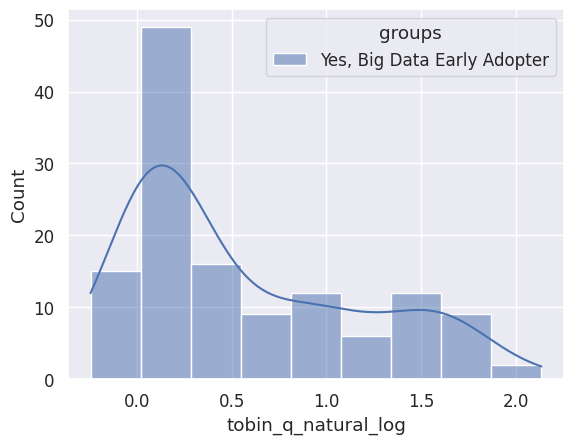

In [172]:
sns.histplot(data = df_model_raw_h5_with_launch_info.query("groups=='Yes, Big Data Early Adopter'"), x="tobin_q_natural_log", hue="groups", kde=True)

<Axes: xlabel='tobin_q_natural_log', ylabel='Count'>

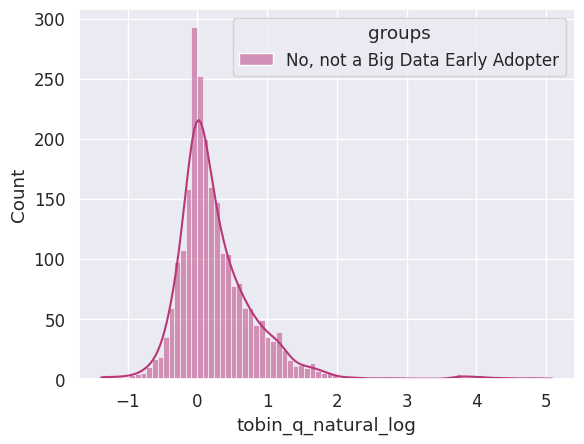

In [173]:
sns.histplot(data = df_model_raw_h5_with_launch_info.query("groups=='No, not a Big Data Early Adopter'"), x="tobin_q_natural_log", hue="groups", palette="magma", kde=True)

Difference in Population Means equation:

$$\frac{Best\ Estimate - Hypothesized\ Estimate}{Standard\ Error\ of\ Estimate}$$

**Research Question**<br>
Considering Brazilian publicly listed companies in IBOV that were operational on every year from 2010 to 2022, do Big Data Early adopters have a significantly higher mean Tobin's Q Natural Log than Non-early adopters?

**Population**: Brazilian publicly listed companies in IBOV that were operational on every year from 2010 to 2022.
**Parameter of Interest**: $\mu_1 - \mu_2$, Tobin's Q Natural Log.
**Null Hypothesis:** $\mu_1 = \mu_2$
**Alternative Hypothesis:** $\mu_1 \neq \mu_2$

In [174]:
df_non_early_adopters = df_model_raw_h5_with_launch_info.query("groups=='No, not a Big Data Early Adopter'")
df_early_adopters = df_model_raw_h5_with_launch_info.query("groups=='Yes, Big Data Early Adopter'")

In [175]:
n1 = len(df_non_early_adopters)
mu1 = df_non_early_adopters["tobin_q_natural_log"].mean()
sd1 = df_non_early_adopters["tobin_q_natural_log"].std()

(n1, mu1, sd1)

(2392, 0.2690349712381821, 0.6070848896767255)

In [176]:
n2 = len(df_early_adopters)
mu2 = df_early_adopters["tobin_q_natural_log"].mean()
sd2 = df_early_adopters["tobin_q_natural_log"].std()

(n2, mu2, sd2)

(130, 0.5684848457912902, 0.6075774701579935)

In [177]:
sm.stats.ztest(df_non_early_adopters["tobin_q_natural_log"].dropna(), df_early_adopters["tobin_q_natural_log"].dropna())

(-5.4769199028642435, 4.3279299925962004e-08)

In [178]:
sm.stats.ttest_ind(df_non_early_adopters["tobin_q_natural_log"].dropna(), df_early_adopters["tobin_q_natural_log"].dropna())

(-5.4769199028642435, 4.756401897436252e-08, 2520.0)

Since n>30, I will use ztest and not ttest, but run both just to confirm the results were similar.

Now I will run a ztest for each year comparing early adopters to non-early adopter Tobin's Q Natural Log Mean.

In [179]:
year_list = []
test_statistic_list = []
p_value_list = []
tobin_q_nl_adopters_mean_list = []
tobin_q_nl_nonadopters_mean_list = []

for year in range(2010,2022+1):
  ztest_results = sm.stats.ztest(df_non_early_adopters.query("year==" + str(year))["tobin_q_natural_log"].dropna(), df_early_adopters.query("year==" + str(year))["tobin_q_natural_log"].dropna())
  year_list.append(year)
  test_statistic_list.append(ztest_results[0])
  p_value_list.append(ztest_results[1])
  tobin_q_nl_adopters_mean_list.append(df_early_adopters.query("year==" + str(year))["tobin_q_natural_log"].dropna().mean())
  tobin_q_nl_nonadopters_mean_list.append(df_non_early_adopters.query("year==" + str(year))["tobin_q_natural_log"].dropna().mean())

In [180]:
df_h5_results_dataframe = pd.DataFrame(columns=['year','tobin_q_nl_adopters_mean','tobin_q_nl_nonadopters_mean','test_statistic','p_value'])
df_h5_results_dataframe

Empty DataFrame
Columns: [year, tobin_q_nl_adopters_mean, tobin_q_nl_nonadopters_mean, test_statistic, p_value]
Index: []

In [181]:
df_h5_results_dataframe['tobin_q_nl_nonadopters_mean'] = tobin_q_nl_nonadopters_mean_list
df_h5_results_dataframe['tobin_q_nl_adopters_mean'] = tobin_q_nl_adopters_mean_list
df_h5_results_dataframe['year'] = year_list
df_h5_results_dataframe['test_statistic'] = test_statistic_list
df_h5_results_dataframe['p_value'] = p_value_list

In [182]:
# creating columns that evaluates p_value at 0.05 and 0.10
df_h5_results_dataframe['p_value<=0.05'] = df_h5_results_dataframe['p_value']<=0.05
df_h5_results_dataframe['p_value<=0.10'] = df_h5_results_dataframe['p_value']<=0.10

In [183]:
df_h5_results_final = df_h5_results_dataframe.merge(
                                df_model_raw_h5_with_launch_info.groupby(by=['year'], as_index=False)['qty'].sum(),
                                how='left',
                                on='year'
)

In [184]:
df_h5_results_final.columns

Index(['year', 'tobin_q_nl_adopters_mean', 'tobin_q_nl_nonadopters_mean',
       'test_statistic', 'p_value', 'p_value<=0.05', 'p_value<=0.10', 'qty'],
      dtype='object')

In [185]:
df_h5_results_final.columns = ['year', 'tobin_q_nl_adopters_mean', 'tobin_q_nl_nonadopters_mean',
       'test_statistic', 'p_value', 'p_value<=0.05', 'p_value<=0.10', 'qty_of_big_data_adopters_at_least_1_app_in_playstore']

In [186]:
df_h5_results_final

year  tobin_q_nl_adopters_mean  tobin_q_nl_nonadopters_mean  \
0   2010                  0.856885                     0.451017   
1   2011                  0.710576                     0.254982   
2   2012                  0.803439                     0.276405   
3   2013                  0.694843                     0.225243   
4   2014                  0.604695                     0.144702   
5   2015                  0.451366                     0.004450   
6   2016                  0.565685                     0.198560   
7   2017                  0.612928                     0.268161   
8   2018                  0.509777                     0.226511   
9   2019                  0.631764                     0.450197   
10  2020                  0.512135                     0.360580   
11  2021                  0.260225                     0.350332   
12  2022                  0.175985                     0.286316   

    test_statistic   p_value  p_value<=0.05  p_value<=0.10  \
0        -1.947862  0.051432          False           True   
1        -2.289591  0.022045           True           True   
2        -2.661684  0.007775           True           True   
3        -2.204822  0.027467           True           True   
4        -2.302452  0.021310           True           True   
5        -2.084234  0.037139           True           True   
6        -1.764740  0.077607          False           True   
7        -1.870505  0.061414          False           True   
8        -1.653800  0.098168          False           True   
9        -1.020952  0.307277          False          False   
10       -0.829479  0.406833          False          False   
11        0.495098  0.620531          False          False   
12        0.620316  0.535050          False          False   

    qty_of_big_data_adopters_at_least_1_app_in_playstore  
0                                                 2.0     
1                                                 5.0     
2                                                 9.0     
3                                                14.0     
4                                                20.0     
5                                                27.0     
6                                                33.0     
7                                                41.0     
8                                                52.0     
9                                                66.0     
10                                               72.0     
11                                               77.0     
12                                               85.0

In [187]:
df_h5_results_final.to_excel("h5_resultados_finais.xlsx", index=False)

In [188]:
df_h5_results_final['p_value<=0.10'].unique()

array([ True, False])

In [189]:
# creating a column to plot chart with PT-BR parameters
df_h5_results_final['p_valor<=0.10'] = np.where(
                                                  df_h5_results_final['p_value<=0.10']==True,
                                                  'Sim',
                                                  'Não'
)

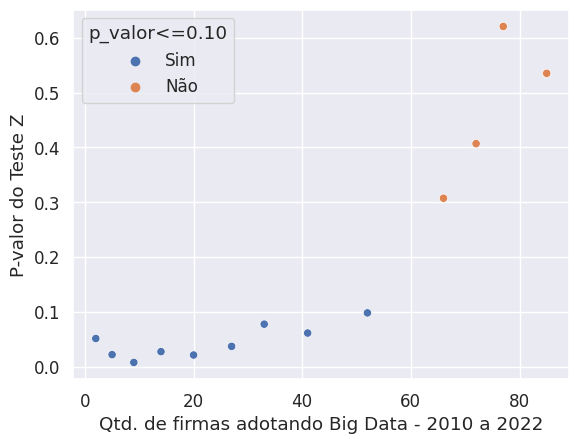

In [190]:
chart = sns.scatterplot(data = df_h5_results_final, x="qty_of_big_data_adopters_at_least_1_app_in_playstore", y="p_value", hue="p_valor<=0.10")
chart.set_xlabel("Qtd. de firmas adotando Big Data - 2010 a 2022")
chart.set_ylabel("P-valor do Teste Z")
plt.savefig("H5_p-value_vs.bigdata_adoption.png"
              #, transparent=True
              )

**H5 Conclusion:**<br><br>
As we can see after the ztest analysis, the difference between the Tobin's Q Natural Log mean comparing Early Adopters and Non-early Adopters groups is statistically significant.<br>
When we plot a scatterplot showing the evolution of the ztest p-value related to the increasing adoption of Big Data (proxied by apps launching on Play Store), it's a linear relation.<br>
It totally matches the Resource-based view Theory. As soon as Big Data adoption became a "commodity" and competitors could substitute the benefits or even copy the benefits of this strategy, it became less effective in generating sustainable competitive advantage (more market value than booked value - Tobin's Q).<br>
This fact also corroborates the results obtained before while testing H1 to H5, when only VOLUME of the Big Data V's was statistically significant as an Independent Variable to explain Tobin's Q Natural Log for 2023, as this strategy was broadly replicated on almost every TRBC Economic Sector  throughout the years of 2010 to 2022.

**H5->** Firms that implemented Big Data first (early adopters) performed better [CONFIRMED]

## **H6->** In TRBC Economic Sectors where the use of Big Data is greater, the impact on performance is smaller

### Pre-processing

I will need to use TRBC Economic Sector as the individual (the same I did with companies TICKERS), and calculate the mean of the Dependent Variable (TOBIN'S Q NATURAL LOG), the Control Variables, and the Independent Variable which will be the quantity of companies adopting Big Data (using apps avaiable in Play Store as proxy) divided by the total amount of companies in the sector for the year.

In [237]:
# starting by locating the variables from df_scenario4 I used before
df_scenario4.columns

Index(['TICKER', 'NAME', 'IS_IBOV_BOOL', 'TRBC_ECONOMIC_SECTOR',
       'HAS_APP_BOOL', 'TOBINQ', 'TOBINQ_NL', 'TURNOVER', 'BETA',
       'D_TO_A_RATIO', 'FIRM_AGE', 'VERACITY', 'VOLUME', 'VARIETY', 'VELOCITY',
       'VOLUME_NL', 'VERACITY_NL', 'VARIETY_NL', 'VELOCITY_NL', 'VARIETY_BOOL',
       'TURNOVER_NL', 'VOLUME_NL_i_VARIETY_NL_i_VERACITY_NL_i_VELOCITY_NL'],
      dtype='object')

In [238]:
# now I will select the same variables from the panel data dataframe used to answer H5, which is already balanced accounting for the companies that appeared 13 times (2010 to 2022)
df_model_raw_h5_with_launch_info.columns

Index(['identifier_ric', 'qty_of_years', 'company_name', 'country_of_exchange',
       'trbc_economic_sector_name_x', 'organization_website',
       'organization_founded_year', 'organization_email_domain',
       'organization_founded_month', 'organization_founded_day',
       'organization_status_code', 'beta_5_year', 'year', 'beta',
       'employees_as_csr_reported', 'employees_fulltime', 'mcap',
       'net_income_before_taxes', 'pl_equity', 'revenue', 'roa', 'roe',
       'total_assets', 'total_debts', 'turnover', 'trbc_sector_launch_order',
       'a_b_test_classification', 'trbc_sector_big_data_adoption_percentage',
       'app_launch_info_year', 'qty', 'app_maturity_in_years',
       'natural_log_turnover', 'total_debts_to_total_assets_ratio', 'firm_age',
       'tobin_q', 'tobin_q_natural_log', 'groups'],
      dtype='object')

In [239]:
df_model_raw_h6 = df_model_raw_h5_with_launch_info[[
                                                      # Selecting the "ID's" variables which will help to model
                                                      'trbc_economic_sector_name_x','identifier_ric','year',

                                                      # Selecting the "Dependent Variable" - both forms with and without natural log
                                                      'tobin_q', 'tobin_q_natural_log',

                                                      # Selecting the "Control Variables"
                                                      'natural_log_turnover','beta','total_debts_to_total_assets_ratio','firm_age',

                                                      # Selecting the necessary columns to calculate "Independent Variable" -
                                                      ## TICKERS adopting Big Data in TRBC SECTOR / TOTAL TICKERS in TRBC SECTOR
                                                      'qty','app_maturity_in_years'
                                                    ]].copy()

# Changing names to more concise ones
df_model_raw_h6.columns = ['TRBC_ECONOMIC_SECTOR','TICKER','YEAR','TOBINQ','TOBINQ_NL','TURNOVER_NL','BETA','D_TO_A_RATIO','FIRM_AGE',
                           'QTY_OF_APPS','APP_MATURITY']

In [240]:
df_model_raw_h6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2522 entries, 0 to 2896
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TRBC_ECONOMIC_SECTOR  2522 non-null   object 
 1   TICKER                2522 non-null   object 
 2   YEAR                  2522 non-null   int64  
 3   TOBINQ                2522 non-null   float64
 4   TOBINQ_NL             2522 non-null   float64
 5   TURNOVER_NL           2522 non-null   float64
 6   BETA                  1535 non-null   float64
 7   D_TO_A_RATIO          2522 non-null   float64
 8   FIRM_AGE              2522 non-null   float64
 9   QTY_OF_APPS           503 non-null    float64
 10  APP_MATURITY          503 non-null    float64
dtypes: float64(8), int64(1), object(2)
memory usage: 236.4+ KB


In [241]:
df_model_raw_h6.groupby(by=['TICKER'], as_index=False)['YEAR'].count()

TICKER  YEAR
0    ABCB4.SA    13
1    ABEV3.SA    13
2    AFLT3.SA    13
3    AGRO3.SA    13
4    ALPA4.SA    13
..        ...   ...
189  VULC3.SA    13
190  WEGE3.SA    13
191  WHRL4.SA    13
192  WLMM4.SA    13
193  YDUQ3.SA    13

[194 rows x 2 columns]

From the above table I can identify a lot of null values in the BETA column, let's process a little bit more...

In [242]:
# I will drop null rows based on the ID's + Control Variables columns
df_model_raw_h6_after_null_removal = df_model_raw_h6.dropna(subset=['TRBC_ECONOMIC_SECTOR','TICKER','YEAR','TOBINQ','TOBINQ_NL','TURNOVER_NL','BETA','D_TO_A_RATIO','FIRM_AGE']).reset_index(drop=True)

In [243]:
df_model_raw_h6_after_null_removal

TRBC_ECONOMIC_SECTOR    TICKER  YEAR    TOBINQ  TOBINQ_NL  \
0                     Energy  RPMG3.SA  2015  4.989132   1.607262   
1                     Energy  RPMG3.SA  2016  6.872080   1.927467   
2                     Energy  RPMG3.SA  2017  5.156353   1.640229   
3                     Energy  RPMG3.SA  2018  3.164801   1.152090   
4                     Energy  RPMG3.SA  2019  2.605192   0.957506   
...                      ...       ...   ...       ...        ...   
1530  Consumer Non-Cyclicals  PNVL3.SA  2018  1.779416   0.576285   
1531  Consumer Non-Cyclicals  PNVL3.SA  2019  3.038793   1.111460   
1532  Consumer Non-Cyclicals  PNVL3.SA  2020  2.382026   0.867951   
1533  Consumer Non-Cyclicals  PNVL3.SA  2021  1.390422   0.329607   
1534  Consumer Non-Cyclicals  PNVL3.SA  2022  1.235460   0.211443   

      TURNOVER_NL      BETA  D_TO_A_RATIO  FIRM_AGE  QTY_OF_APPS  APP_MATURITY  
0       11.510252  0.142185      0.133031      69.0          NaN           NaN  
1        7.859082  0.367258      0.124714      70.0          NaN           NaN  
2       11.653153  0.303098      0.074168      71.0          NaN           NaN  
3       10.216303  0.455615      0.035047      72.0          NaN           NaN  
4       10.923165  0.422823      0.006611      73.0          NaN           NaN  
...           ...       ...           ...       ...          ...           ...  
1530    12.163273  0.162662      0.166676      98.0          NaN           NaN  
1531     9.585966  0.274126      0.140796      99.0          NaN           NaN  
1532    15.644662  0.312804      0.346099     100.0          NaN           NaN  
1533    14.021875  0.442733      0.297576     101.0          NaN           NaN  
1534    13.225475  0.708260      0.290176     102.0          NaN           NaN  

[1535 rows x 11 columns]

Now I need to rebalance the dataframe once more time, to keep companies that are present 13 times (2010 to 2022).

In [244]:
df_model_raw_h6_after_null_removal.groupby(by='TICKER', as_index=False)['YEAR'].count()['YEAR'].unique()

array([8, 3, 6])

In [245]:
df_model_raw_h6_after_null_removal.groupby(by='TICKER', as_index=False)['YEAR'].count()\
                        .groupby(by="YEAR")['TICKER'].count()

YEAR
3      3
6      1
8    190
Name: TICKER, dtype: int64

In [246]:
len(list(df_model_raw_h6_after_null_removal.groupby(by='TICKER', as_index=False)['YEAR'].count().query("YEAR==8")['TICKER'].unique()))

190

I have 190 companies that are present for 8 years, and 3 for 3 years and 1 for 6 years.

In [247]:
list_of_companies_that_appear_in_8_years = list(df_model_raw_h6_after_null_removal.groupby(by='TICKER', as_index=False)['YEAR'].count().query("YEAR==8")['TICKER'].unique())

Let's check one use-case...

In [248]:
df_model_raw_h6_after_null_removal.groupby(by='TICKER', as_index=False)['YEAR'].count().query("YEAR==8").head(1)

TICKER  YEAR
0  ABCB4.SA     8

In [249]:
df_model_raw_h6_after_null_removal.query("TICKER=='ABCB4.SA'")

TRBC_ECONOMIC_SECTOR    TICKER  YEAR    TOBINQ  TOBINQ_NL  TURNOVER_NL  \
1236           Financials  ABCB4.SA  2015  0.925948  -0.076937    13.714365   
1237           Financials  ABCB4.SA  2016  0.936396  -0.065717    14.168580   
1238           Financials  ABCB4.SA  2017  0.944001  -0.057628    14.809939   
1239           Financials  ABCB4.SA  2018  0.941899  -0.059858    14.560471   
1240           Financials  ABCB4.SA  2019  0.950259  -0.051020    15.117951   
1241           Financials  ABCB4.SA  2020  0.940846  -0.060976    14.717181   
1242           Financials  ABCB4.SA  2021  0.941855  -0.059904    15.113018   
1243           Financials  ABCB4.SA  2022  0.947864  -0.053544    14.852147   

          BETA  D_TO_A_RATIO  FIRM_AGE  QTY_OF_APPS  APP_MATURITY  
1236  1.035879      0.553715      32.0          NaN           NaN  
1237  1.054244      0.540243      33.0          NaN           NaN  
1238  1.110744      0.537833      34.0          NaN           NaN  
1239  1.163864      0.535429      35.0          1.0           0.0  
1240  1.279269      0.546995      36.0          1.0           1.0  
1241  1.135392      0.523162      37.0          1.0           2.0  
1242  1.021563      0.549405      38.0          1.0           3.0  
1243  0.952341      0.549093      39.0          1.0           4.0

In [250]:
[x for x in range(2015,2023)]

[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

In [251]:
# after removing nulls I will have to work with companies from 2015 to 2022
df_model_raw_h6_after_null_removal_balanced = df_model_raw_h6_after_null_removal[(df_model_raw_h6_after_null_removal['YEAR'].isin([x for x in range(2015,2023)])) & \
                                              (df_model_raw_h6_after_null_removal['TICKER'].isin(list_of_companies_that_appear_in_8_years))
                                              ].reset_index(drop=True)

In [252]:
df_model_raw_h6_after_null_removal_balanced.shape

(1520, 11)

I ended up with 1520 observations for 190 companies across 8 years. Dataset is now balanced.

In [253]:
190 * 8

1520

Now I will build the same dataframe by sector, by year.<br>
I will aggregate by mean on every variable, excluding 'QTY_OF_APPS' which I will be aggregating by sum.

In [254]:
df_model_raw_h6_after_null_removal_balanced.groupby(by=['YEAR','TRBC_ECONOMIC_SECTOR'], as_index=False)\
                                           .agg({
                                              'TICKER':'count',
                                              'TOBINQ':'mean',
                                              'TOBINQ_NL':'mean',
                                              'TURNOVER_NL':'mean',
                                              'BETA':'mean',
                                              'D_TO_A_RATIO':'mean',
                                              'FIRM_AGE':'mean',
                                              'QTY_OF_APPS':'count'
                                           }).sort_values(by=['TRBC_ECONOMIC_SECTOR','YEAR'])

YEAR             TRBC_ECONOMIC_SECTOR  TICKER    TOBINQ  TOBINQ_NL  \
0   2015  Academic & Educational Services       3  0.865760  -0.202681   
11  2016  Academic & Educational Services       3  1.458417   0.290195   
22  2017  Academic & Educational Services       3  2.289435   0.811665   
33  2018  Academic & Educational Services       3  1.515176   0.354802   
44  2019  Academic & Educational Services       3  2.552274   0.808453   
..   ...                              ...     ...       ...        ...   
43  2018                        Utilities      24  1.235934   0.167899   
54  2019                        Utilities      24  1.631183   0.412617   
65  2020                        Utilities      24  1.489037   0.315942   
76  2021                        Utilities      24  1.417194   0.268550   
87  2022                        Utilities      24  1.435072   0.283486   

    TURNOVER_NL      BETA  D_TO_A_RATIO   FIRM_AGE  QTY_OF_APPS  
0     12.087733  0.606790      0.076164  26.666667            0  
11    13.413205  0.502240      0.096911  27.666667            0  
22    13.966603  0.670755      0.092609  28.666667            0  
33    14.485152  0.793604      0.053013  29.666667            0  
44    14.835415  0.869256      0.146801  30.666667            2  
..          ...       ...           ...        ...          ...  
43    13.009299  0.704605      0.303207  42.375000            8  
54    13.291292  0.746835      0.323991  43.375000           10  
65    13.753043  0.693238      0.313510  44.375000           10  
76    12.799321  0.735749      0.308848  45.375000           11  
87    12.870517  0.702694      0.306423  46.375000           12  

[88 rows x 10 columns]

In [255]:
# assigning to a new variable
df_model_h6_balanced_by_sector = \
df_model_raw_h6_after_null_removal_balanced.groupby(by=['YEAR','TRBC_ECONOMIC_SECTOR'], as_index=False)\
                                           .agg({
                                              'TICKER':'count',
                                              'TOBINQ':'mean',
                                              'TOBINQ_NL':'mean',
                                              'TURNOVER_NL':'mean',
                                              'BETA':'mean',
                                              'D_TO_A_RATIO':'mean',
                                              'FIRM_AGE':'mean',
                                              'QTY_OF_APPS':'count'
                                           }).sort_values(by=['TRBC_ECONOMIC_SECTOR','YEAR']).reset_index(drop=True)

# Renaming
df_model_h6_balanced_by_sector.columns = ['YEAR', 'TRBC_ECONOMIC_SECTOR', 'QTY_OF_COMPANIES', 'TOBINQ', 'TOBINQ_NL',
                                          'TURNOVER_NL', 'BETA', 'D_TO_A_RATIO', 'FIRM_AGE', 'QTY_OF_APPS']

In [256]:
# creating the TOTAL_APPS_TO_TOTAL_COMPANIES_RATIO == TA_TO_TC_RATIO
df_model_h6_balanced_by_sector['TA_TO_TC_RATIO'] = df_model_h6_balanced_by_sector['QTY_OF_APPS'] / df_model_h6_balanced_by_sector['QTY_OF_COMPANIES']

In [257]:
df_model_h6_balanced_by_sector

YEAR             TRBC_ECONOMIC_SECTOR  QTY_OF_COMPANIES    TOBINQ  \
0   2015  Academic & Educational Services                 3  0.865760   
1   2016  Academic & Educational Services                 3  1.458417   
2   2017  Academic & Educational Services                 3  2.289435   
3   2018  Academic & Educational Services                 3  1.515176   
4   2019  Academic & Educational Services                 3  2.552274   
..   ...                              ...               ...       ...   
83  2018                        Utilities                24  1.235934   
84  2019                        Utilities                24  1.631183   
85  2020                        Utilities                24  1.489037   
86  2021                        Utilities                24  1.417194   
87  2022                        Utilities                24  1.435072   

    TOBINQ_NL  TURNOVER_NL      BETA  D_TO_A_RATIO   FIRM_AGE  QTY_OF_APPS  \
0   -0.202681    12.087733  0.606790      0.076164  26.666667            0   
1    0.290195    13.413205  0.502240      0.096911  27.666667            0   
2    0.811665    13.966603  0.670755      0.092609  28.666667            0   
3    0.354802    14.485152  0.793604      0.053013  29.666667            0   
4    0.808453    14.835415  0.869256      0.146801  30.666667            2   
..        ...          ...       ...           ...        ...          ...   
83   0.167899    13.009299  0.704605      0.303207  42.375000            8   
84   0.412617    13.291292  0.746835      0.323991  43.375000           10   
85   0.315942    13.753043  0.693238      0.313510  44.375000           10   
86   0.268550    12.799321  0.735749      0.308848  45.375000           11   
87   0.283486    12.870517  0.702694      0.306423  46.375000           12   

    TA_TO_TC_RATIO  
0         0.000000  
1         0.000000  
2         0.000000  
3         0.000000  
4         0.666667  
..             ...  
83        0.333333  
84        0.416667  
85        0.416667  
86        0.458333  
87        0.500000  

[88 rows x 11 columns]

In [258]:
df_model_h6_balanced_by_sector['YEAR_CLASSIFICATION'] = np.where(
                                                                     (df_model_h6_balanced_by_sector['YEAR']==2015),
                                                                     '2015',
                                                                      None
)

df_model_h6_balanced_by_sector['YEAR_CLASSIFICATION'] = np.where(
                                                                     (df_model_h6_balanced_by_sector['YEAR']==2022),
                                                                     '2022',
                                                                      df_model_h6_balanced_by_sector['YEAR_CLASSIFICATION']
)

df_model_h6_balanced_by_sector['YEAR_CLASSIFICATION'] = df_model_h6_balanced_by_sector['YEAR_CLASSIFICATION'].fillna("Interim")

In [259]:
df_model_h6_balanced_by_sector['YEAR_CLASSIFICATION'].unique()

array(['2015', 'Interim', '2022'], dtype=object)

### H6 Scenario 1: full model

#### assigning ID & TIME Indexes (TRBC_ECONOMIC_SECTOR & YEAR columns)

In [260]:
df_model_h6_balanced_by_sector_indexes_fix = df_model_h6_balanced_by_sector.set_index(['TRBC_ECONOMIC_SECTOR','YEAR'])

#### Checking the results

In [261]:
df_model_h6_balanced_by_sector_indexes_fix

QTY_OF_COMPANIES    TOBINQ  TOBINQ_NL  \
TRBC_ECONOMIC_SECTOR            YEAR                                          
Academic & Educational Services 2015                 3  0.865760  -0.202681   
                                2016                 3  1.458417   0.290195   
                                2017                 3  2.289435   0.811665   
                                2018                 3  1.515176   0.354802   
                                2019                 3  2.552274   0.808453   
...                                                ...       ...        ...   
Utilities                       2018                24  1.235934   0.167899   
                                2019                24  1.631183   0.412617   
                                2020                24  1.489037   0.315942   
                                2021                24  1.417194   0.268550   
                                2022                24  1.435072   0.283486   

                                      TURNOVER_NL      BETA  D_TO_A_RATIO  \
TRBC_ECONOMIC_SECTOR            YEAR                                        
Academic & Educational Services 2015    12.087733  0.606790      0.076164   
                                2016    13.413205  0.502240      0.096911   
                                2017    13.966603  0.670755      0.092609   
                                2018    14.485152  0.793604      0.053013   
                                2019    14.835415  0.869256      0.146801   
...                                           ...       ...           ...   
Utilities                       2018    13.009299  0.704605      0.303207   
                                2019    13.291292  0.746835      0.323991   
                                2020    13.753043  0.693238      0.313510   
                                2021    12.799321  0.735749      0.308848   
                                2022    12.870517  0.702694      0.306423   

                                       FIRM_AGE  QTY_OF_APPS  TA_TO_TC_RATIO  \
TRBC_ECONOMIC_SECTOR            YEAR                                           
Academic & Educational Services 2015  26.666667            0        0.000000   
                                2016  27.666667            0        0.000000   
                                2017  28.666667            0        0.000000   
                                2018  29.666667            0        0.000000   
                                2019  30.666667            2        0.666667   
...                                         ...          ...             ...   
Utilities                       2018  42.375000            8        0.333333   
                                2019  43.375000           10        0.416667   
                                2020  44.375000           10        0.416667   
                                2021  45.375000           11        0.458333   
                                2022  46.375000           12        0.500000   

                                     YEAR_CLASSIFICATION  
TRBC_ECONOMIC_SECTOR            YEAR                      
Academic & Educational Services 2015                2015  
                                2016             Interim  
                                2017             Interim  
                                2018             Interim  
                                2019             Interim  
...                                                  ...  
Utilities                       2018             Interim  
                                2019             Interim  
                                2020             Interim  
                                2021             Interim  
                                2022                2022  

[88 rows x 10 columns]

Ok, seems we have what was needed!

In [262]:
list_of_sectors_to_generate_scatterplot = list(df_model_h6_balanced_by_sector['TRBC_ECONOMIC_SECTOR'].unique())

In [263]:
len(list_of_sectors_to_generate_scatterplot)

11

In [264]:
# creating the list of axes
axes_list = []
for row in (range(0,4)):
  for column in (range(0,3)):
    axes_list.append(  (row,column)  )

print(axes_list)
print(len(axes_list))

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2), (3, 0), (3, 1), (3, 2)]
12


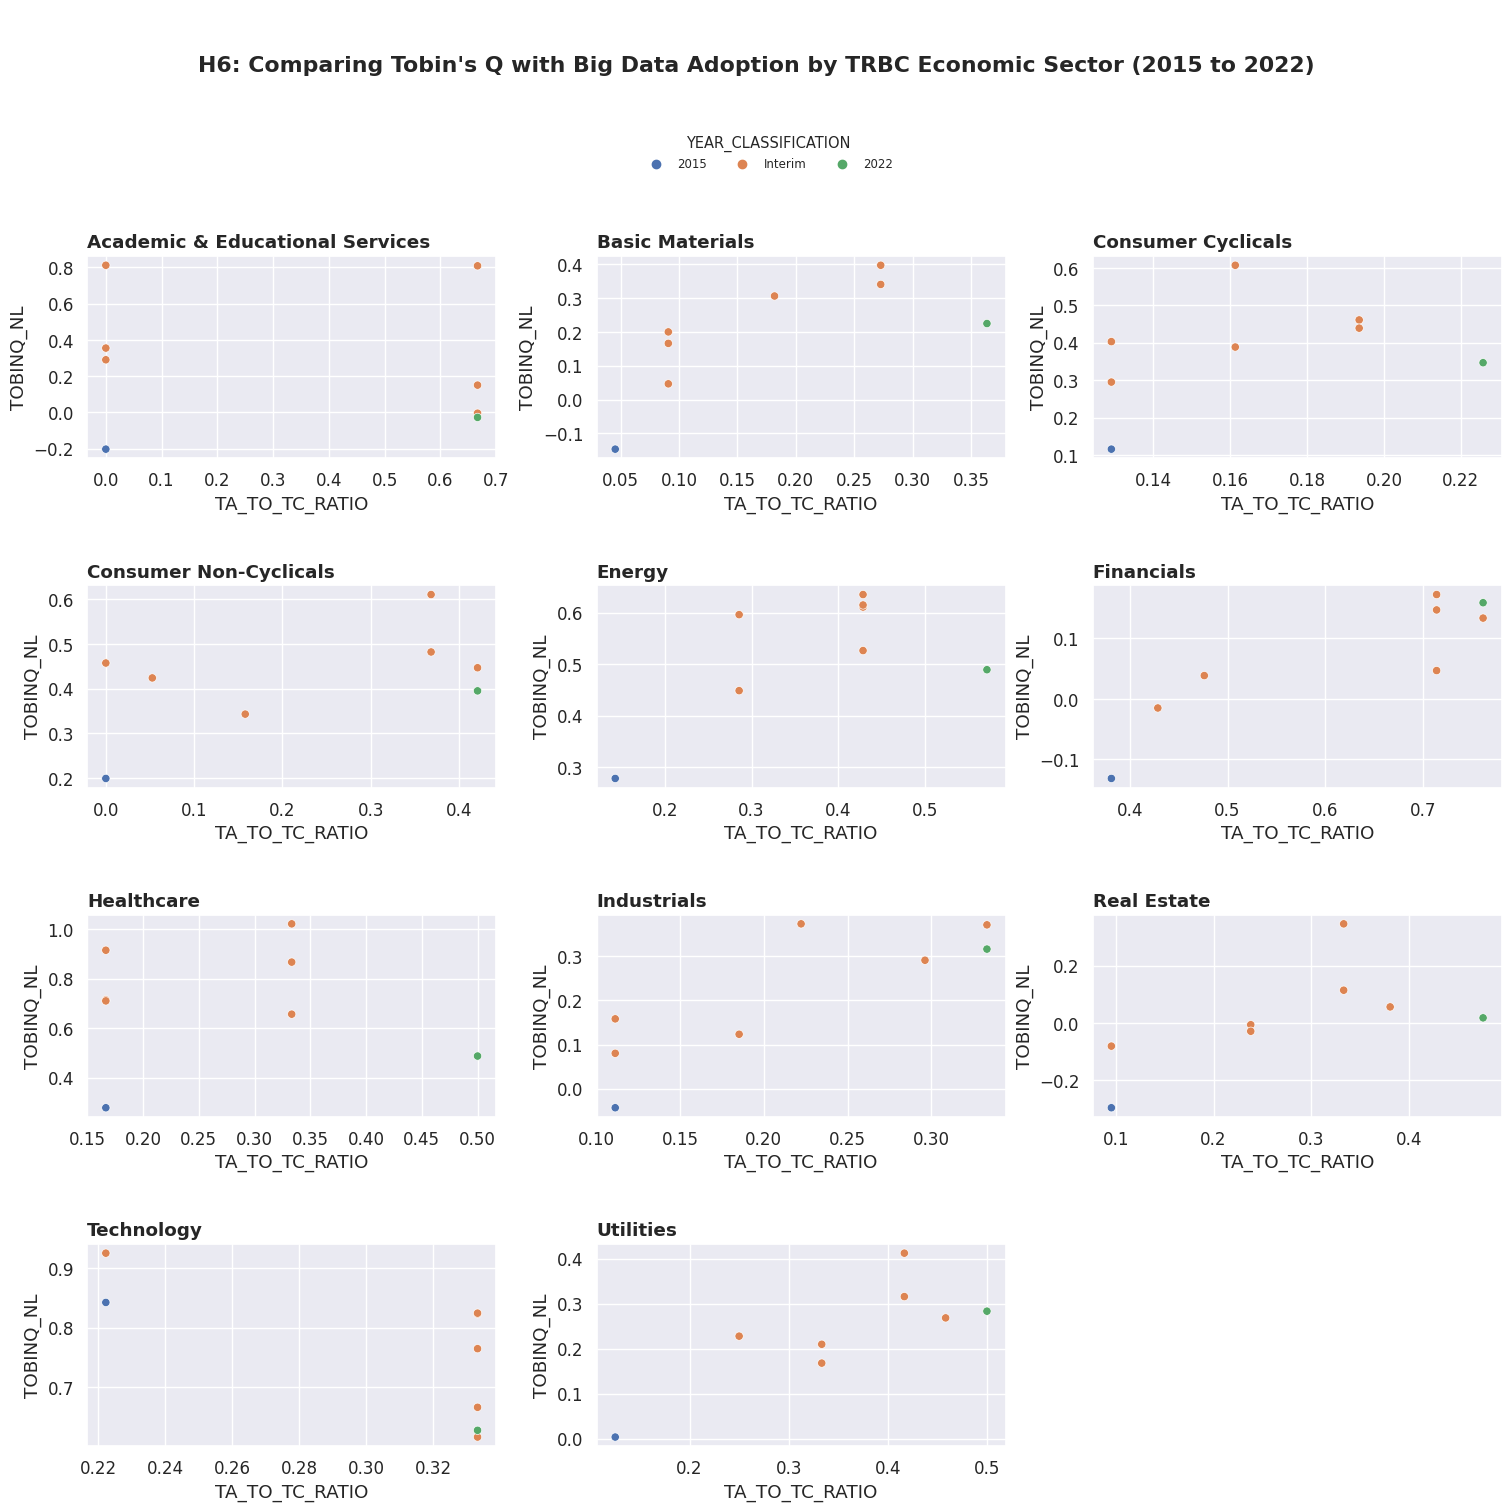

In [265]:
# Generating a single chart with all of them together
fig, axes = plt.subplots(4,3, figsize=(15,15), constrained_layout=True)
fig.delaxes(axes[3,2])
# iterating from 0 to 13, 12 elements
for variable in range(0,12):
  if variable < 11:
    variable_name = list_of_sectors_to_generate_scatterplot[variable]
    axes_row = axes_list[variable][0]
    axes_column = axes_list[variable][1]
    c = sns.scatterplot(  ax = axes[axes_row,axes_column],
                      data=df_model_h6_balanced_by_sector.query("TRBC_ECONOMIC_SECTOR == '" + variable_name + "'"),
                      x="TA_TO_TC_RATIO",
                      y="TOBINQ_NL",
                      hue="YEAR_CLASSIFICATION")
    if (axes_row==0) & (axes_column==1):
      sns.move_legend(c, "upper right", frameon=False, fontsize="8.5", bbox_to_anchor=(0.75,1.65), ncol=3, title_fontsize='10.5')
      axes[axes_row,axes_column].set_title("\n\n{}".format(variable_name), loc='left', fontweight='bold')
    else:
      c.get_legend().remove()
      axes[axes_row,axes_column].set_title("\n\n{}".format(variable_name), loc='left', fontweight='bold')
  else:
    continue
plt.suptitle("\n\nH6: Comparing Tobin's Q with Big Data Adoption by TRBC Economic Sector (2015 to 2022)\n\n", fontweight='bold')
plt.savefig("H6 Comparing Tobin's Q NL with Big Data Adoption by TRBC Economic Sector.png"
            #, transparent=True
            )

#### Plotting the model

In [266]:
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
from linearmodels import PanelOLS

In [268]:
model = PanelOLS.from_formula('TOBINQ_NL ~ 1 + TURNOVER_NL + BETA + D_TO_A_RATIO + FIRM_AGE + TA_TO_TC_RATIO'
                                , data=df_model_h6_balanced_by_sector_indexes_fix)
res = model.fit(cov_type="clustered", cluster_entity=True)

print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              TOBINQ_NL   R-squared:                        0.4088
Estimator:                   PanelOLS   R-squared (Between):              0.5436
No. Observations:                  88   R-squared (Within):               0.1659
Date:                Thu, Jun 22 2023   R-squared (Overall):              0.4088
Time:                        15:43:05   Log-likelihood                    7.7746
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      11.341
Entities:                          11   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                    F(5,82)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             20.289
                            

#### Assessing Model Fit

In [269]:
# Calculating Shapiro-Wilk normality test accounting for the residuals normality on both models
print("[LOG] Calculating Shapiro-Wilk test for residuals normality...")
model_shapiro_wilk = shapiro(res.resids)

# Calculating Breusch-Pagan test accounting for the presence of heteroskedacity in the residuals on both models
# MODEL A - OLS
print("[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...")
X = df_model_h6_balanced_by_sector_indexes_fix[['TURNOVER_NL', 'BETA' , 'D_TO_A_RATIO' , 'FIRM_AGE' , 'TA_TO_TC_RATIO']]
X = sm.add_constant(X)

model_breusch_pagan_step1 = het_breuschpagan(res.resids, X)
model_breusch_pagan = model_breusch_pagan_step1[1]

[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...


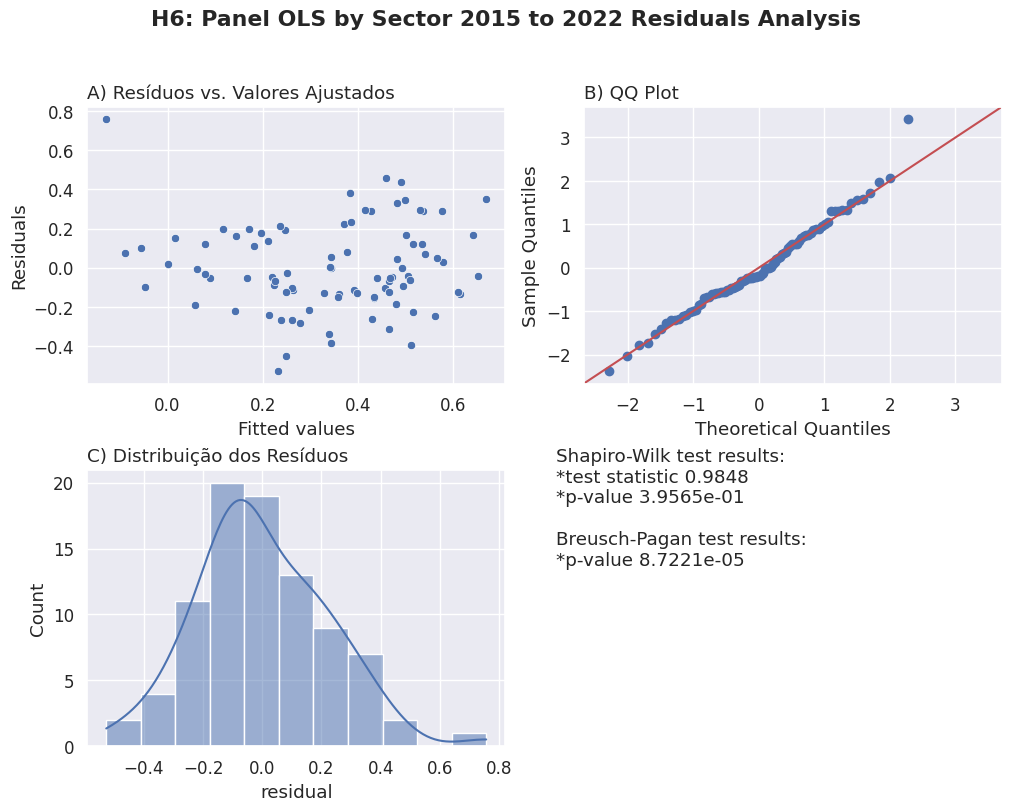

In [270]:

model_results_to_plot = res
model_shapiro_wilk_results = model_shapiro_wilk
model_breuschpagan_results = model_breusch_pagan

# Generating a single chart with all of them together
fig, axes = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)
fig.delaxes(axes[1,1])



# A) Residuals vs. Fitted Values
a = sns.scatterplot(ax = axes[0,0], x = model_results_to_plot.predict().fitted_values, y = model_results_to_plot.resids)
axes[0,0].set_xlabel("Fitted values")
axes[0,0].set_ylabel("Residuals")
axes[0,0].set_title("A) Resíduos vs. Valores Ajustados", loc='left',
                    #weight='bold'
                    )


# B) QQ Plot
b = sm.qqplot(model_results_to_plot.resids, line='45', ax = axes[0,1], fit=True);
axes[0,1].set_title("B) QQ Plot", loc='left',
                    #weight='bold'
                    )


# C) QQ Plot
c = sns.histplot(model_results_to_plot.resids, kde=True, ax = axes[1,0])
axes[1,0].set_title("C) Distribuição dos Resíduos", loc='left',
                    #weight='bold'
                    )


plt.gcf().text(0.55, 0.3, '''
Shapiro-Wilk test results:
*test statistic {:0.4}
*p-value {:0.4e}

Breusch-Pagan test results:
*p-value {:0.4e}'''.format(
                  model_shapiro_wilk_results.statistic,
                  model_shapiro_wilk_results.pvalue,
                  model_breuschpagan_results
              ))

plt.suptitle("H6: Panel OLS by Sector 2015 to 2022 Residuals Analysis\n\n", fontweight='bold')

plt.savefig("H6: Panel OLS by Sector 2015 to 2022 Residuals Analysis.png")

It seems a good fit!

#### Assessing VIF

In [271]:
# Calculating VIF
X = df_model_h6_balanced_by_sector_indexes_fix[['TURNOVER_NL', 'BETA' , 'D_TO_A_RATIO' , 'FIRM_AGE' , 'TA_TO_TC_RATIO']]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.to_numpy(dtype=float, na_value=0), i) for i in range(X.shape[1])]
vif_info['Variable_name'] = X.columns
vif_info.sort_values('VIF', ascending=False)
vif_info.to_excel("H6 VIF analysis.xlsx", index=False)

In [272]:
vif_info.sort_values(by="VIF")

VIF   Variable_name
2   3.575902    D_TO_A_RATIO
4   4.414643  TA_TO_TC_RATIO
1  12.552609            BETA
3  17.189152        FIRM_AGE
0  21.580913     TURNOVER_NL

In [273]:
vif_info['VIF'].mean()

11.86264372438674

Opsy! BETA, FIRM AGE and TURNOVER_NL presented a huge VIF. Let's remove one by one.

### H6 Scenario 2: removing TURNOVER_NL due to high VIF

#### assigning ID & TIME Indexes (TRBC_ECONOMIC_SECTOR & YEAR columns)

In [274]:
df_model_h6_balanced_by_sector_indexes_fix = df_model_h6_balanced_by_sector.set_index(['TRBC_ECONOMIC_SECTOR','YEAR'])

#### Checking the results

In [275]:
df_model_h6_balanced_by_sector_indexes_fix

QTY_OF_COMPANIES    TOBINQ  TOBINQ_NL  \
TRBC_ECONOMIC_SECTOR            YEAR                                          
Academic & Educational Services 2015                 3  0.865760  -0.202681   
                                2016                 3  1.458417   0.290195   
                                2017                 3  2.289435   0.811665   
                                2018                 3  1.515176   0.354802   
                                2019                 3  2.552274   0.808453   
...                                                ...       ...        ...   
Utilities                       2018                24  1.235934   0.167899   
                                2019                24  1.631183   0.412617   
                                2020                24  1.489037   0.315942   
                                2021                24  1.417194   0.268550   
                                2022                24  1.435072   0.283486   

                                      TURNOVER_NL      BETA  D_TO_A_RATIO  \
TRBC_ECONOMIC_SECTOR            YEAR                                        
Academic & Educational Services 2015    12.087733  0.606790      0.076164   
                                2016    13.413205  0.502240      0.096911   
                                2017    13.966603  0.670755      0.092609   
                                2018    14.485152  0.793604      0.053013   
                                2019    14.835415  0.869256      0.146801   
...                                           ...       ...           ...   
Utilities                       2018    13.009299  0.704605      0.303207   
                                2019    13.291292  0.746835      0.323991   
                                2020    13.753043  0.693238      0.313510   
                                2021    12.799321  0.735749      0.308848   
                                2022    12.870517  0.702694      0.306423   

                                       FIRM_AGE  QTY_OF_APPS  TA_TO_TC_RATIO  \
TRBC_ECONOMIC_SECTOR            YEAR                                           
Academic & Educational Services 2015  26.666667            0        0.000000   
                                2016  27.666667            0        0.000000   
                                2017  28.666667            0        0.000000   
                                2018  29.666667            0        0.000000   
                                2019  30.666667            2        0.666667   
...                                         ...          ...             ...   
Utilities                       2018  42.375000            8        0.333333   
                                2019  43.375000           10        0.416667   
                                2020  44.375000           10        0.416667   
                                2021  45.375000           11        0.458333   
                                2022  46.375000           12        0.500000   

                                     YEAR_CLASSIFICATION  
TRBC_ECONOMIC_SECTOR            YEAR                      
Academic & Educational Services 2015                2015  
                                2016             Interim  
                                2017             Interim  
                                2018             Interim  
                                2019             Interim  
...                                                  ...  
Utilities                       2018             Interim  
                                2019             Interim  
                                2020             Interim  
                                2021             Interim  
                                2022                2022  

[88 rows x 10 columns]

Ok, seems we have what was needed!

#### Plotting the model

In [276]:
model = PanelOLS.from_formula('TOBINQ_NL ~ 1 + BETA + D_TO_A_RATIO + FIRM_AGE + TA_TO_TC_RATIO'
                                , data=df_model_h6_balanced_by_sector_indexes_fix)
res = model.fit(cov_type="clustered", cluster_entity=True)

print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              TOBINQ_NL   R-squared:                        0.2135
Estimator:                   PanelOLS   R-squared (Between):              0.4733
No. Observations:                  88   R-squared (Within):              -0.2549
Date:                Thu, Jun 22 2023   R-squared (Overall):              0.2135
Time:                        15:43:07   Log-likelihood                   -4.7872
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.6319
Entities:                          11   P-value                           0.0005
Avg Obs:                       8.0000   Distribution:                    F(4,83)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             3.1003
                            

#### Assessing Model Fit

In [277]:
# Calculating Shapiro-Wilk normality test accounting for the residuals normality on both models
print("[LOG] Calculating Shapiro-Wilk test for residuals normality...")
model_shapiro_wilk = shapiro(res.resids)

# Calculating Breusch-Pagan test accounting for the presence of heteroskedacity in the residuals on both models
# MODEL A - OLS
print("[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...")
X = df_model_h6_balanced_by_sector_indexes_fix[['TURNOVER_NL', 'BETA' , 'D_TO_A_RATIO' , 'FIRM_AGE' , 'TA_TO_TC_RATIO']]
X = sm.add_constant(X)

model_breusch_pagan_step1 = het_breuschpagan(res.resids, X)
model_breusch_pagan = model_breusch_pagan_step1[1]

[LOG] Calculating Shapiro-Wilk test for residuals normality...
[LOG] Calculating Breusch-Pagan test for residuals heteroskedacity...


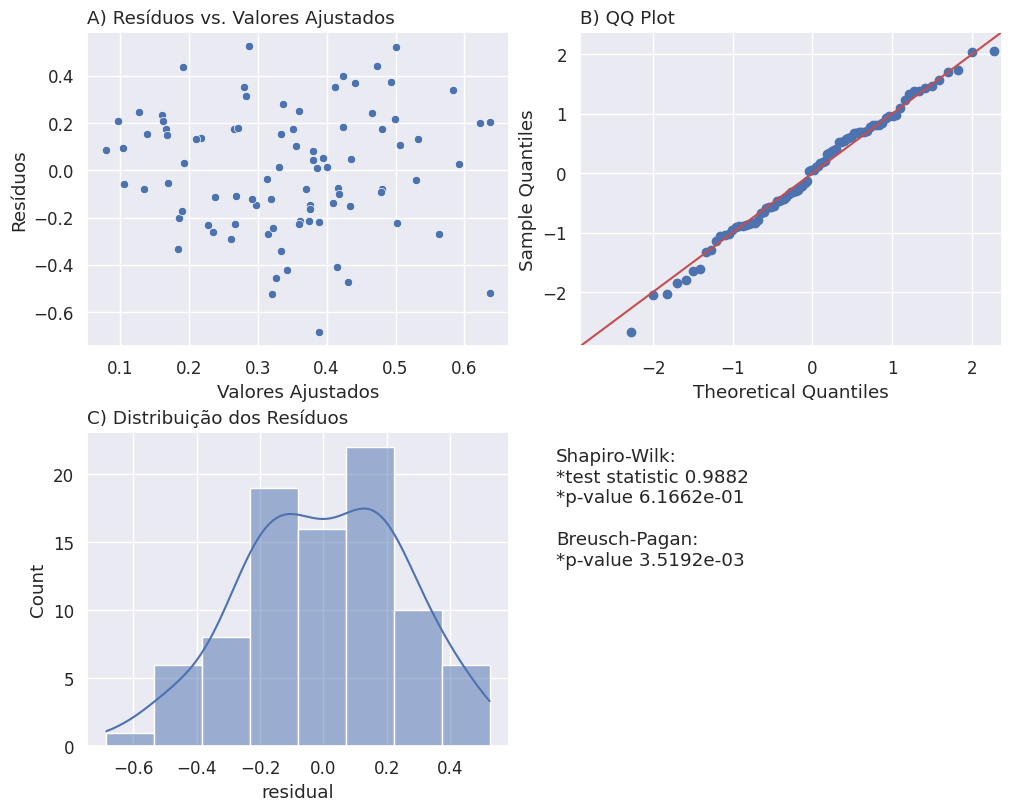

In [278]:

model_results_to_plot = res
model_shapiro_wilk_results = model_shapiro_wilk
model_breuschpagan_results = model_breusch_pagan

# Generating a single chart with all of them together
fig, axes = plt.subplots(2,2, figsize=(10,8), constrained_layout=True)
fig.delaxes(axes[1,1])



# A) Residuals vs. Fitted Values
a = sns.scatterplot(ax = axes[0,0], x = model_results_to_plot.predict().fitted_values, y = model_results_to_plot.resids)
axes[0,0].set_xlabel("Valores Ajustados")
axes[0,0].set_ylabel("Resíduos")
axes[0,0].set_title("A) Resíduos vs. Valores Ajustados", loc='left',
                    #weight='bold'
                    )


# B) QQ Plot
b = sm.qqplot(model_results_to_plot.resids, line='45', ax = axes[0,1], fit=True);
axes[0,1].set_title("B) QQ Plot", loc='left',
                    #weight='bold'
                    )


# C) QQ Plot
c = sns.histplot(model_results_to_plot.resids, kde=True, ax = axes[1,0])
axes[1,0].set_title("C) Distribuição dos Resíduos", loc='left',
                    #weight='bold'
                    )


plt.gcf().text(0.55, 0.3, '''
Shapiro-Wilk:
*test statistic {:0.4}
*p-value {:0.4e}

Breusch-Pagan:
*p-value {:0.4e}'''.format(
                  model_shapiro_wilk_results.statistic,
                  model_shapiro_wilk_results.pvalue,
                  model_breuschpagan_results
              ))

#plt.suptitle("H6: Panel OLS by Sector 2015 to 2022 Residuals Analysis\n\n", fontweight='bold')

plt.savefig("H6: Panel OLS by Sector 2015 to 2022 Residuals Analysis.png")

It seems a good fit!

#### Assessing VIF

In [279]:
# Calculating VIF
X = df_model_h6_balanced_by_sector_indexes_fix[['BETA' , 'D_TO_A_RATIO' , 'FIRM_AGE' , 'TA_TO_TC_RATIO']]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.to_numpy(dtype=float, na_value=0), i) for i in range(X.shape[1])]
vif_info['Variable_name'] = X.columns
vif_info.sort_values('VIF', ascending=False)
vif_info.to_excel("H6 VIF analysis.xlsx", index=False)

In [280]:
vif_info.sort_values(by="VIF")

VIF   Variable_name
1  3.397245    D_TO_A_RATIO
3  4.364679  TA_TO_TC_RATIO
0  8.791806            BETA
2  9.157517        FIRM_AGE

In [281]:
vif_info['VIF'].mean()

6.427811421307461

All VIF's are below 10, I will analyze this model since the goodness of fit remained the same as in the scenario 1.

#### H6 Final Analysis

In [282]:
model = PanelOLS.from_formula('TOBINQ_NL ~ 1 + BETA + D_TO_A_RATIO + FIRM_AGE + TA_TO_TC_RATIO'
                                , data=df_model_h6_balanced_by_sector_indexes_fix)
res = model.fit(cov_type="clustered", cluster_entity=True)

print(res)

                          PanelOLS Estimation Summary                           
Dep. Variable:              TOBINQ_NL   R-squared:                        0.2135
Estimator:                   PanelOLS   R-squared (Between):              0.4733
No. Observations:                  88   R-squared (Within):              -0.2549
Date:                Thu, Jun 22 2023   R-squared (Overall):              0.2135
Time:                        15:43:09   Log-likelihood                   -4.7872
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.6319
Entities:                          11   P-value                           0.0005
Avg Obs:                       8.0000   Distribution:                    F(4,83)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):             3.1003
                            

Using Resource-based view Theory lens, a resource that generates sustainable competitive advantage is heterogeneously available in a given market (Peteraf, 1993). Firms with non-rare resources can only reach the break-even point, since there is no sustainable competitive advantage over their competitors. In this sense, it is important to evaluate the impact of the rarity of Big Data application on the performance of firms, as a generator of competitive advantage.

To test H6 a Panel Data Analysis using OLS Model was estimated. At first sight, due to a very high VIF, I've excluded the TURNOVER_NL control variable. Using the second model, VIF mean was below 10, and the fit seems ok.<br>

This second model resulted in the rejection of the H6, as the independent variable, Total Companies with Apps to Total Companies in the Sector ratio **(TA_TO_TC_RATIO)**, was statistically significant, but POSITIVELY affecting the TOBIN's Q mean of the TRBC Economic Sector.<br>

In other words, ceterius-paribus, a unit increase in Big Data adoption in a sector seems to increase the market performance of this sector measured by Tobin's Q, since **(TA_TO_TC_RATIO)** p_value was 0.0829 < 0.10.

H6: In TRBC Economic Sectors where the use of Big Data is greater, the impact on performance is smaller [REJECTED]